In [28]:
import numpy as np
import scipy.misc
import keras
from keras_preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from keras import backend as K
import cv2
import os

In [6]:
np.random.seed(1)
names = ["Apple Scab", "Apple Black Rot", "Apple Cedar Apple Rust", "Apple Healthy", "Blueberry Healthy",
         "Cherry Powdery Mildew", "Cherry Healthy", "Corn Cercospora Gray Leaf Spot", "Corn Common Rust",
         "Corn Northern Leaf Blight", "Corn Healthy", "Grape Black Rot", "Grape Esca", "Grape Leaf Blight",
         "Grape Healthy", "Orange Haunglongbing", "Peach Bacterial Spot", "Peach Healthy", "Bell Pepper Bacterial Spot",
         "Bell Pepper Healthy", "Potato Early Blight", "Potato Late Blight", "Potato Healthy", "Raspberry Healthy",
         "Soybean Healthy", "Squash Powdery Mildew", "Strawberry Leaf Scorch", "Strawberry Healthy",
         "Tomato Bacterial Spot", "Tomato Early Blight", "Tomato Late Blight", "Tomato Leaf Mold",
         "Tomato Septoria Leaf Spot", "Tomato Spider Mites", "Tomato Target Spot", "Tomato Yellow Leaf Curl Virus",
         "Tomato Mosaic Virus", "Tomato Healthy"]


In [11]:
base = "E:\\PycharmProjects\\Chameleon\\data\\color\\"


In [15]:
images = []
labels = []
i = 0
for filename1 in os.listdir(base):
    count = 0
    for filename in os.listdir(base + filename1):
        img1 = cv2.imread(base + filename1 + "\\" + filename)
        img1 = img1.transpose((-1, 0, 1))
        if img1 is not None:
            labels.append(i)
            images.append(img1)
            count = count + 1
        if count == 256:
            break
    if i % 5 == 0:
        print(i)
    i = i + 1


0


5


10


15


20


25


30


35


In [16]:
X_train = np.array(images)
y_train = np.array(labels)
y_train = y_train.reshape(np.shape(X_train)[0], 1)
p = np.random.permutation(np.shape(X_train)[0])
X_train = X_train[p]
y_train = y_train[p]
y_train = np_utils.to_categorical(y_train)

In [18]:
print(np.shape(X_train))
print(y_train[0])

(9624, 3, 256, 256)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
num_classes = 38
K.set_image_dim_ordering('th')


def train():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 256, 256), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), input_shape=(3, 256, 256)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model


trained_model = train()


In [31]:
trained_model.fit(
    X_train, y_train,
    epochs=50, batch_size=64)
trained_model.save_weights('first_try.h5')


Epoch 1/50


  64/9624 [..............................] - ETA: 3:12 - loss: 16.1181 - acc: 0.0000e+00

 128/9624 [..............................] - ETA: 3:09 - loss: 16.1181 - acc: 0.0000e+00

 192/9624 [..............................] - ETA: 3:04 - loss: 16.0341 - acc: 0.0052    

 256/9624 [..............................] - ETA: 3:01 - loss: 15.8033 - acc: 0.0195

 320/9624 [..............................] - ETA: 2:59 - loss: 15.8663 - acc: 0.0156

 384/9624 [>.............................] - ETA: 2:57 - loss: 15.9082 - acc: 0.0130

 448/9624 [>.............................] - ETA: 2:54 - loss: 15.8663 - acc: 0.0156

 512/9624 [>.............................] - ETA: 2:53 - loss: 15.8348 - acc: 0.0176

 576/9624 [>.............................] - ETA: 2:51 - loss: 15.8663 - acc: 0.0156

 640/9624 [>.............................] - ETA: 2:50 - loss: 15.8411 - acc: 0.0172

 704/9624 [=>............................] - ETA: 2:49 - loss: 15.8434 - acc: 0.0170

 768/9624 [=>............................] - ETA: 2:47 - loss: 15.8453 - acc: 0.0169

 832/9624 [=>............................] - ETA: 2:46 - loss: 15.8081 - acc: 0.0192

 896/9624 [=>............................] - ETA: 2:44 - loss: 15.7943 - acc: 0.0201

 960/9624 [=>............................] - ETA: 2:43 - loss: 15.7823 - acc: 0.0208

1024/9624 [==>...........................] - ETA: 2:42 - loss: 15.7561 - acc: 0.0225

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.7625 - acc: 0.0221

1152/9624 [==>...........................] - ETA: 2:39 - loss: 15.7263 - acc: 0.0243

1216/9624 [==>...........................] - ETA: 2:38 - loss: 15.7337 - acc: 0.0238

1280/9624 [==>...........................] - ETA: 2:37 - loss: 15.7277 - acc: 0.0242

1344/9624 [===>..........................] - ETA: 2:36 - loss: 15.7103 - acc: 0.0253

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.7216 - acc: 0.0241

1472/9624 [===>..........................] - ETA: 2:33 - loss: 15.7060 - acc: 0.0251

1536/9624 [===>..........................] - ETA: 2:32 - loss: 15.7231 - acc: 0.0241

1600/9624 [===>..........................] - ETA: 2:31 - loss: 15.7289 - acc: 0.0238

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.7438 - acc: 0.0228

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.7484 - acc: 0.0226

1792/9624 [====>.........................] - ETA: 2:27 - loss: 15.7526 - acc: 0.0223

1856/9624 [====>.........................] - ETA: 2:26 - loss: 15.7478 - acc: 0.0226

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.7518 - acc: 0.0224

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.7636 - acc: 0.0217

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.7668 - acc: 0.0215

2112/9624 [=====>........................] - ETA: 2:21 - loss: 15.7698 - acc: 0.0213

2176/9624 [=====>........................] - ETA: 2:20 - loss: 15.7652 - acc: 0.0216

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.7609 - acc: 0.0219

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.7639 - acc: 0.0217

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.7462 - acc: 0.0228

2432/9624 [======>.......................] - ETA: 2:15 - loss: 15.7494 - acc: 0.0226

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7394 - acc: 0.0232

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.7489 - acc: 0.0227

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.7456 - acc: 0.0229

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.7485 - acc: 0.0227

2752/9624 [=======>......................] - ETA: 2:09 - loss: 15.7512 - acc: 0.0225

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7539 - acc: 0.0224

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.7564 - acc: 0.0222

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.7642 - acc: 0.0217

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.7610 - acc: 0.0219

3072/9624 [========>.....................] - ETA: 2:03 - loss: 15.7632 - acc: 0.0218

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7602 - acc: 0.0220

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.7673 - acc: 0.0216

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.7545 - acc: 0.0224

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.7518 - acc: 0.0225

3392/9624 [=========>....................] - ETA: 1:57 - loss: 15.7444 - acc: 0.0230

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7513 - acc: 0.0226

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.7534 - acc: 0.0224

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.7420 - acc: 0.0232

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.7397 - acc: 0.0233

3712/9624 [==========>...................] - ETA: 1:51 - loss: 15.7376 - acc: 0.0234

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.7397 - acc: 0.0233

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.7377 - acc: 0.0234

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.7439 - acc: 0.0231

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.7499 - acc: 0.0227

4032/9624 [===========>..................] - ETA: 1:45 - loss: 15.7358 - acc: 0.0236

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.7221 - acc: 0.0244

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.7088 - acc: 0.0252

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.7074 - acc: 0.0253

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.7097 - acc: 0.0252

4352/9624 [============>.................] - ETA: 1:39 - loss: 15.7083 - acc: 0.0253

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7106 - acc: 0.0251

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7093 - acc: 0.0252

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.7079 - acc: 0.0253

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.7068 - acc: 0.0254

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7055 - acc: 0.0255

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.7111 - acc: 0.0251

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7165 - acc: 0.0248

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.7085 - acc: 0.0253

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.7106 - acc: 0.0252

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7094 - acc: 0.0252

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.7113 - acc: 0.0251

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.7070 - acc: 0.0254

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.7058 - acc: 0.0255

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.7016 - acc: 0.0257

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7067 - acc: 0.0254

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7056 - acc: 0.0255

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7045 - acc: 0.0256

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.7034 - acc: 0.0256

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.7024 - acc: 0.0257

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7043 - acc: 0.0256

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7089 - acc: 0.0253

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7079 - acc: 0.0253

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7124 - acc: 0.0251

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.7113 - acc: 0.0251

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7103 - acc: 0.0252

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7066 - acc: 0.0254

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7030 - acc: 0.0257

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7047 - acc: 0.0256

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.7063 - acc: 0.0255

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7054 - acc: 0.0255

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7070 - acc: 0.0254

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.7036 - acc: 0.0256

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6977 - acc: 0.0260 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.7018 - acc: 0.0257

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6985 - acc: 0.0259

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6929 - acc: 0.0263

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6969 - acc: 0.0260

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6961 - acc: 0.0261

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6954 - acc: 0.0261

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6993 - acc: 0.0259

6976/9624 [====================>.........] - ETA: 49s - loss: 15.7031 - acc: 0.0257

7040/9624 [====================>.........] - ETA: 48s - loss: 15.7046 - acc: 0.0256

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7015 - acc: 0.0258

7168/9624 [=====================>........] - ETA: 46s - loss: 15.7008 - acc: 0.0258

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6978 - acc: 0.0260

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7015 - acc: 0.0258

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7029 - acc: 0.0257

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7000 - acc: 0.0259

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6992 - acc: 0.0259

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6985 - acc: 0.0260

7616/9624 [======================>.......] - ETA: 37s - loss: 15.7020 - acc: 0.0257

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6992 - acc: 0.0259

7744/9624 [=======================>......] - ETA: 35s - loss: 15.7027 - acc: 0.0257

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6978 - acc: 0.0260

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6992 - acc: 0.0259

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6985 - acc: 0.0260

8000/9624 [=======================>......] - ETA: 30s - loss: 15.7019 - acc: 0.0257

8064/9624 [========================>.....] - ETA: 29s - loss: 15.7052 - acc: 0.0255

8128/9624 [========================>.....] - ETA: 28s - loss: 15.7084 - acc: 0.0253

8192/9624 [========================>.....] - ETA: 26s - loss: 15.7077 - acc: 0.0254

8256/9624 [========================>.....] - ETA: 25s - loss: 15.7031 - acc: 0.0257

8320/9624 [========================>.....] - ETA: 24s - loss: 15.7043 - acc: 0.0256

8384/9624 [=========================>....] - ETA: 23s - loss: 15.7055 - acc: 0.0255

8448/9624 [=========================>....] - ETA: 22s - loss: 15.7029 - acc: 0.0257

8512/9624 [=========================>....] - ETA: 20s - loss: 15.7042 - acc: 0.0256

8576/9624 [=========================>....] - ETA: 19s - loss: 15.7054 - acc: 0.0255

8640/9624 [=========================>....] - ETA: 18s - loss: 15.7028 - acc: 0.0257

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7040 - acc: 0.0256

8768/9624 [==========================>...] - ETA: 16s - loss: 15.7034 - acc: 0.0257

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7027 - acc: 0.0257

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7003 - acc: 0.0259

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7015 - acc: 0.0258

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7044 - acc: 0.0256

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7038 - acc: 0.0256

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7032 - acc: 0.0257 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7008 - acc: 0.0258

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7020 - acc: 0.0258

9344/9624 [============================>.] - ETA: 5s - loss: 15.7031 - acc: 0.0257

9408/9624 [============================>.] - ETA: 4s - loss: 15.7042 - acc: 0.0256

9472/9624 [============================>.] - ETA: 2s - loss: 15.7053 - acc: 0.0255

9536/9624 [============================>.] - ETA: 1s - loss: 15.7081 - acc: 0.0254

9600/9624 [============================>.] - ETA: 0s - loss: 15.7041 - acc: 0.0256

9624/9624 [==============================] - 181s 19ms/step - loss: 15.7051 - acc: 0.0256


Epoch 2/50


  64/9624 [..............................] - ETA: 3:00 - loss: 15.8663 - acc: 0.0156

 128/9624 [..............................] - ETA: 2:58 - loss: 15.7403 - acc: 0.0234

 192/9624 [..............................] - ETA: 2:57 - loss: 15.8663 - acc: 0.0156

 256/9624 [..............................] - ETA: 2:56 - loss: 15.8663 - acc: 0.0156

 320/9624 [..............................] - ETA: 2:54 - loss: 15.9166 - acc: 0.0125

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.9082 - acc: 0.0130

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.8663 - acc: 0.0156

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.8033 - acc: 0.0195

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.7543 - acc: 0.0226

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.7403 - acc: 0.0234

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.7060 - acc: 0.0256

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.7193 - acc: 0.0247

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.7113 - acc: 0.0252

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.7223 - acc: 0.0246

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.7458 - acc: 0.0229

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.7533 - acc: 0.0225

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.7007 - acc: 0.0257

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.7099 - acc: 0.0252

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.7048 - acc: 0.0255

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.7129 - acc: 0.0250

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.7202 - acc: 0.0246

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.7154 - acc: 0.0249

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.7001 - acc: 0.0258

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.7175 - acc: 0.0247

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.7033 - acc: 0.0256

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.7192 - acc: 0.0246

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.7060 - acc: 0.0255

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6938 - acc: 0.0262

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6823 - acc: 0.0269

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6717 - acc: 0.0276

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6780 - acc: 0.0272

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.6838 - acc: 0.0269

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6894 - acc: 0.0265

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6946 - acc: 0.0262

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6995 - acc: 0.0259

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.7041 - acc: 0.0256

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.7085 - acc: 0.0253

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6994 - acc: 0.0259

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7101 - acc: 0.0252

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.7015 - acc: 0.0258

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6994 - acc: 0.0259

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.7093 - acc: 0.0253

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7013 - acc: 0.0258

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7050 - acc: 0.0256

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.7086 - acc: 0.0253

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.7011 - acc: 0.0258

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6992 - acc: 0.0259

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6975 - acc: 0.0260

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6958 - acc: 0.0261

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6891 - acc: 0.0266

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6926 - acc: 0.0263

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6959 - acc: 0.0261

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6944 - acc: 0.0262

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6929 - acc: 0.0263

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6915 - acc: 0.0264

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6946 - acc: 0.0262

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6932 - acc: 0.0263

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6831 - acc: 0.0269

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6863 - acc: 0.0267

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6852 - acc: 0.0268

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6840 - acc: 0.0269

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6829 - acc: 0.0270

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6818 - acc: 0.0270

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6729 - acc: 0.0276

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6720 - acc: 0.0276

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6711 - acc: 0.0277

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6740 - acc: 0.0275

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6731 - acc: 0.0276

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6650 - acc: 0.0281

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6643 - acc: 0.0281

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6565 - acc: 0.0286

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6559 - acc: 0.0286

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6519 - acc: 0.0289

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6548 - acc: 0.0287

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6441 - acc: 0.0294

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6438 - acc: 0.0294

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6466 - acc: 0.0292

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6527 - acc: 0.0288

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6554 - acc: 0.0287

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6517 - acc: 0.0289

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6513 - acc: 0.0289

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6508 - acc: 0.0290

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6443 - acc: 0.0294

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6470 - acc: 0.0292

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6495 - acc: 0.0290

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6462 - acc: 0.0293

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6429 - acc: 0.0295

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6455 - acc: 0.0293

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6451 - acc: 0.0293

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6448 - acc: 0.0293

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6472 - acc: 0.0292

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6496 - acc: 0.0290

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6519 - acc: 0.0289

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6542 - acc: 0.0288

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6538 - acc: 0.0288

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6560 - acc: 0.0286

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6556 - acc: 0.0287

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6577 - acc: 0.0285

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6573 - acc: 0.0286

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6569 - acc: 0.0286

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6564 - acc: 0.0286 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6536 - acc: 0.0288

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6556 - acc: 0.0287

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6576 - acc: 0.0285

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6620 - acc: 0.0283

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6616 - acc: 0.0283

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6611 - acc: 0.0283

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6654 - acc: 0.0281

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6626 - acc: 0.0282

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6553 - acc: 0.0287

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6526 - acc: 0.0289

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6546 - acc: 0.0287

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6564 - acc: 0.0286

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6539 - acc: 0.0288

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6579 - acc: 0.0285

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6575 - acc: 0.0286

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6571 - acc: 0.0286

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6546 - acc: 0.0287

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6543 - acc: 0.0288

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6582 - acc: 0.0285

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6599 - acc: 0.0284

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6616 - acc: 0.0283

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6612 - acc: 0.0283

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6649 - acc: 0.0281

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6665 - acc: 0.0280

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6701 - acc: 0.0278

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6736 - acc: 0.0276

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6751 - acc: 0.0275

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6766 - acc: 0.0274

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6781 - acc: 0.0273

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6814 - acc: 0.0271

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6828 - acc: 0.0270

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6785 - acc: 0.0273

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6762 - acc: 0.0274

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6757 - acc: 0.0274

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6790 - acc: 0.0272

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6822 - acc: 0.0270

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6835 - acc: 0.0269

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6848 - acc: 0.0269

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6843 - acc: 0.0269

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6838 - acc: 0.0269

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6851 - acc: 0.0268

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6881 - acc: 0.0267 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6894 - acc: 0.0266

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6923 - acc: 0.0264

9344/9624 [============================>.] - ETA: 5s - loss: 15.6935 - acc: 0.0263

9408/9624 [============================>.] - ETA: 4s - loss: 15.6930 - acc: 0.0264

9472/9624 [============================>.] - ETA: 2s - loss: 15.6958 - acc: 0.0262

9536/9624 [============================>.] - ETA: 1s - loss: 15.6953 - acc: 0.0262

9600/9624 [============================>.] - ETA: 0s - loss: 15.6981 - acc: 0.0260

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6992 - acc: 0.0260


Epoch 3/50


  64/9624 [..............................] - ETA: 2:57 - loss: 15.8663 - acc: 0.0156

 128/9624 [..............................] - ETA: 2:57 - loss: 15.7403 - acc: 0.0234

 192/9624 [..............................] - ETA: 2:57 - loss: 15.7823 - acc: 0.0208

 256/9624 [..............................] - ETA: 2:55 - loss: 15.7403 - acc: 0.0234

 320/9624 [..............................] - ETA: 2:54 - loss: 15.8159 - acc: 0.0187

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.8243 - acc: 0.0182

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.7943 - acc: 0.0201

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.7403 - acc: 0.0234

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.7543 - acc: 0.0226

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.7907 - acc: 0.0203

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.7976 - acc: 0.0199

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.8033 - acc: 0.0195

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.7694 - acc: 0.0216

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.7583 - acc: 0.0223

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.7319 - acc: 0.0240

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.7246 - acc: 0.0244

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.7181 - acc: 0.0248

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.7123 - acc: 0.0252

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.7204 - acc: 0.0247

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.7151 - acc: 0.0250

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.7103 - acc: 0.0253

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.6945 - acc: 0.0263

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.7020 - acc: 0.0258

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.7193 - acc: 0.0247

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.7353 - acc: 0.0238

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.7306 - acc: 0.0240

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.7357 - acc: 0.0237

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.7223 - acc: 0.0246

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.7012 - acc: 0.0259

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.7151 - acc: 0.0250

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.7281 - acc: 0.0242

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.6931 - acc: 0.0264

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6984 - acc: 0.0260

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7107 - acc: 0.0253

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.7151 - acc: 0.0250

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6914 - acc: 0.0265

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6825 - acc: 0.0270

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6807 - acc: 0.0271

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6854 - acc: 0.0268

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6837 - acc: 0.0270

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6820 - acc: 0.0271

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6924 - acc: 0.0264

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6964 - acc: 0.0262

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7003 - acc: 0.0259

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6919 - acc: 0.0264

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.7012 - acc: 0.0258

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6994 - acc: 0.0259

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6923 - acc: 0.0264

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6959 - acc: 0.0261

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6993 - acc: 0.0259

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6878 - acc: 0.0267

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6912 - acc: 0.0264

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6897 - acc: 0.0265

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6930 - acc: 0.0263

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6962 - acc: 0.0261

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6902 - acc: 0.0265

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6889 - acc: 0.0266

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6789 - acc: 0.0272

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6863 - acc: 0.0267

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6893 - acc: 0.0266

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6922 - acc: 0.0264

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6991 - acc: 0.0260

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6978 - acc: 0.0260

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6965 - acc: 0.0261

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.7030 - acc: 0.0257

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6902 - acc: 0.0265

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6853 - acc: 0.0268

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6842 - acc: 0.0269

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6832 - acc: 0.0269

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6786 - acc: 0.0272

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6813 - acc: 0.0271

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6838 - acc: 0.0269

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6691 - acc: 0.0278

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6650 - acc: 0.0281

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6643 - acc: 0.0281

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6669 - acc: 0.0280

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6630 - acc: 0.0282

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6656 - acc: 0.0280

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6681 - acc: 0.0279

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6706 - acc: 0.0277

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6699 - acc: 0.0278

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6662 - acc: 0.0280

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6686 - acc: 0.0279

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6649 - acc: 0.0281

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6643 - acc: 0.0281

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6667 - acc: 0.0280

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6690 - acc: 0.0278

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6712 - acc: 0.0277

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6706 - acc: 0.0277

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6728 - acc: 0.0276

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6749 - acc: 0.0275

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6688 - acc: 0.0279

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6655 - acc: 0.0281

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6622 - acc: 0.0283

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6670 - acc: 0.0280

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6717 - acc: 0.0277

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6660 - acc: 0.0280

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6706 - acc: 0.0277

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6751 - acc: 0.0275

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6770 - acc: 0.0273

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6814 - acc: 0.0271 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6807 - acc: 0.0271

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6776 - acc: 0.0273

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6819 - acc: 0.0270

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6812 - acc: 0.0271

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6830 - acc: 0.0270

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6776 - acc: 0.0273

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6724 - acc: 0.0276

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6764 - acc: 0.0274

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6736 - acc: 0.0276

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6731 - acc: 0.0276

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6770 - acc: 0.0273

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6765 - acc: 0.0274

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6781 - acc: 0.0273

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6776 - acc: 0.0273

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6792 - acc: 0.0272

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6787 - acc: 0.0272

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6803 - acc: 0.0271

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6776 - acc: 0.0273

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6813 - acc: 0.0271

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6828 - acc: 0.0270

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6843 - acc: 0.0269

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6858 - acc: 0.0268

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6791 - acc: 0.0272

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6784 - acc: 0.0272

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6799 - acc: 0.0272

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6793 - acc: 0.0272

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6808 - acc: 0.0271

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6803 - acc: 0.0271

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6817 - acc: 0.0270

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6774 - acc: 0.0273

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6750 - acc: 0.0275

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6783 - acc: 0.0273

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6797 - acc: 0.0272

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6811 - acc: 0.0271

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6843 - acc: 0.0269

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6820 - acc: 0.0270

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6815 - acc: 0.0271

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6774 - acc: 0.0273

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6787 - acc: 0.0272

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6783 - acc: 0.0273

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6778 - acc: 0.0273

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6756 - acc: 0.0274 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6769 - acc: 0.0273

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6765 - acc: 0.0274

9344/9624 [============================>.] - ETA: 5s - loss: 15.6726 - acc: 0.0276

9408/9624 [============================>.] - ETA: 4s - loss: 15.6757 - acc: 0.0274

9472/9624 [============================>.] - ETA: 2s - loss: 15.6786 - acc: 0.0272

9536/9624 [============================>.] - ETA: 1s - loss: 15.6782 - acc: 0.0273

9600/9624 [============================>.] - ETA: 0s - loss: 15.6811 - acc: 0.0271

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6822 - acc: 0.0270


Epoch 4/50


  64/9624 [..............................] - ETA: 2:58 - loss: 15.6144 - acc: 0.0312

 128/9624 [..............................] - ETA: 2:57 - loss: 15.6144 - acc: 0.0312

 192/9624 [..............................] - ETA: 2:57 - loss: 15.7823 - acc: 0.0208

 256/9624 [..............................] - ETA: 2:55 - loss: 15.8663 - acc: 0.0156

 320/9624 [..............................] - ETA: 2:54 - loss: 15.8663 - acc: 0.0156

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.9082 - acc: 0.0130

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.8303 - acc: 0.0179

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.7718 - acc: 0.0215

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.7823 - acc: 0.0208

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.7655 - acc: 0.0219

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.7518 - acc: 0.0227

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.7823 - acc: 0.0208

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.7694 - acc: 0.0216

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.7223 - acc: 0.0246

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.7151 - acc: 0.0250

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6774 - acc: 0.0273

1088/9624 [==>...........................] - ETA: 2:39 - loss: 15.6588 - acc: 0.0285

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6844 - acc: 0.0269

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6807 - acc: 0.0271

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6900 - acc: 0.0266

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6864 - acc: 0.0268

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.6602 - acc: 0.0284

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6692 - acc: 0.0279

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6774 - acc: 0.0273

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6748 - acc: 0.0275

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6338 - acc: 0.0300

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.6424 - acc: 0.0295

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6414 - acc: 0.0296

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6405 - acc: 0.0296

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6564 - acc: 0.0286

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6469 - acc: 0.0292

2048/9624 [=====>........................] - ETA: 2:21 - loss: 15.6459 - acc: 0.0293

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6253 - acc: 0.0303

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6398 - acc: 0.0294

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6535 - acc: 0.0286

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6594 - acc: 0.0282

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6582 - acc: 0.0283

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6504 - acc: 0.0288

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6560 - acc: 0.0284

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6675 - acc: 0.0277

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6662 - acc: 0.0278

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6710 - acc: 0.0275

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6755 - acc: 0.0273

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6798 - acc: 0.0270

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6784 - acc: 0.0271

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6825 - acc: 0.0268

3008/9624 [========>.....................] - ETA: 2:03 - loss: 15.6810 - acc: 0.0269

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6849 - acc: 0.0267

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6886 - acc: 0.0265

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6972 - acc: 0.0259

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6956 - acc: 0.0260

3328/9624 [=========>....................] - ETA: 1:57 - loss: 15.6940 - acc: 0.0261

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6925 - acc: 0.0262

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7004 - acc: 0.0258

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.7034 - acc: 0.0256

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6883 - acc: 0.0265

3648/9624 [==========>...................] - ETA: 1:51 - loss: 15.6959 - acc: 0.0260

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6944 - acc: 0.0261

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6846 - acc: 0.0267

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6750 - acc: 0.0273

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6740 - acc: 0.0274

3968/9624 [===========>..................] - ETA: 1:45 - loss: 15.6730 - acc: 0.0275

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6681 - acc: 0.0278

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6712 - acc: 0.0276

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6742 - acc: 0.0274

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6771 - acc: 0.0272

4288/9624 [============>.................] - ETA: 1:39 - loss: 15.6762 - acc: 0.0273

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6753 - acc: 0.0273

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6671 - acc: 0.0279

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6699 - acc: 0.0277

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6691 - acc: 0.0277

4608/9624 [=============>................] - ETA: 1:33 - loss: 15.6684 - acc: 0.0278

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6642 - acc: 0.0280

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6669 - acc: 0.0279

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6662 - acc: 0.0279

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6689 - acc: 0.0278

4928/9624 [==============>...............] - ETA: 1:27 - loss: 15.6682 - acc: 0.0278

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6739 - acc: 0.0274

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6700 - acc: 0.0277

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6724 - acc: 0.0275

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6779 - acc: 0.0272

5248/9624 [===============>..............] - ETA: 1:21 - loss: 15.6802 - acc: 0.0271

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6794 - acc: 0.0271

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6787 - acc: 0.0272

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6838 - acc: 0.0268

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6860 - acc: 0.0267

5568/9624 [================>.............] - ETA: 1:15 - loss: 15.6793 - acc: 0.0271

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6786 - acc: 0.0272

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6807 - acc: 0.0270

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6716 - acc: 0.0276

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6710 - acc: 0.0276

5888/9624 [=================>............] - ETA: 1:09 - loss: 15.6703 - acc: 0.0277

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6670 - acc: 0.0279

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6611 - acc: 0.0283

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6606 - acc: 0.0283

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6628 - acc: 0.0282

6208/9624 [==================>...........] - ETA: 1:03 - loss: 15.6623 - acc: 0.0282

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6592 - acc: 0.0284

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6613 - acc: 0.0283

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6608 - acc: 0.0283

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6629 - acc: 0.0282 

6528/9624 [===================>..........] - ETA: 57s - loss: 15.6649 - acc: 0.0280

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6644 - acc: 0.0281

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6639 - acc: 0.0281

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6586 - acc: 0.0284

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6630 - acc: 0.0282

6848/9624 [====================>.........] - ETA: 51s - loss: 15.6601 - acc: 0.0283

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6621 - acc: 0.0282

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6616 - acc: 0.0282

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6612 - acc: 0.0283

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6653 - acc: 0.0280

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6649 - acc: 0.0280

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6622 - acc: 0.0282

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6618 - acc: 0.0282

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6592 - acc: 0.0284

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6588 - acc: 0.0284

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6605 - acc: 0.0283

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6580 - acc: 0.0285

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6577 - acc: 0.0285

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6531 - acc: 0.0288

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6569 - acc: 0.0285

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6566 - acc: 0.0286

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6562 - acc: 0.0286

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6579 - acc: 0.0285

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6536 - acc: 0.0288

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6572 - acc: 0.0285

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6569 - acc: 0.0285

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6585 - acc: 0.0284

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6582 - acc: 0.0285

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6559 - acc: 0.0286

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6556 - acc: 0.0286

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6572 - acc: 0.0285

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6588 - acc: 0.0284

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6603 - acc: 0.0283

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6581 - acc: 0.0285

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6597 - acc: 0.0284

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6630 - acc: 0.0282

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6663 - acc: 0.0280

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6659 - acc: 0.0280

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6674 - acc: 0.0279

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6670 - acc: 0.0279

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6666 - acc: 0.0279

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6662 - acc: 0.0280 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6641 - acc: 0.0281

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6655 - acc: 0.0280

9344/9624 [============================>.] - ETA: 5s - loss: 15.6669 - acc: 0.0279

9408/9624 [============================>.] - ETA: 4s - loss: 15.6683 - acc: 0.0278

9472/9624 [============================>.] - ETA: 2s - loss: 15.6662 - acc: 0.0280

9536/9624 [============================>.] - ETA: 1s - loss: 15.6642 - acc: 0.0281

9600/9624 [============================>.] - ETA: 0s - loss: 15.6672 - acc: 0.0279

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6683 - acc: 0.0278


Epoch 5/50


  64/9624 [..............................] - ETA: 3:00 - loss: 15.3626 - acc: 0.0469

 128/9624 [..............................] - ETA: 2:57 - loss: 15.6144 - acc: 0.0312

 192/9624 [..............................] - ETA: 2:57 - loss: 15.6144 - acc: 0.0312

 256/9624 [..............................] - ETA: 2:55 - loss: 15.6774 - acc: 0.0273

 320/9624 [..............................] - ETA: 2:54 - loss: 15.6648 - acc: 0.0281

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.6984 - acc: 0.0260

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.6864 - acc: 0.0268

 512/9624 [>.............................] - ETA: 2:51 - loss: 15.7088 - acc: 0.0254

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6704 - acc: 0.0278

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.7151 - acc: 0.0250

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.7060 - acc: 0.0256

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.7193 - acc: 0.0247

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.7306 - acc: 0.0240

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.7583 - acc: 0.0223

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.7487 - acc: 0.0229

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.7403 - acc: 0.0234

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.7477 - acc: 0.0230

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.7403 - acc: 0.0234

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.7470 - acc: 0.0230

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.7403 - acc: 0.0234

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.7463 - acc: 0.0231

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.7403 - acc: 0.0234

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.7458 - acc: 0.0231

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.7298 - acc: 0.0241

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.7353 - acc: 0.0238

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.7403 - acc: 0.0234

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.7450 - acc: 0.0231

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.7493 - acc: 0.0229

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.7534 - acc: 0.0226

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.7487 - acc: 0.0229

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.7281 - acc: 0.0242

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.7325 - acc: 0.0239

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.7441 - acc: 0.0232

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7255 - acc: 0.0244

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.7151 - acc: 0.0250

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.7193 - acc: 0.0247

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.7165 - acc: 0.0249

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7204 - acc: 0.0247

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7113 - acc: 0.0252

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.7151 - acc: 0.0250

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.7127 - acc: 0.0252

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6924 - acc: 0.0264

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6788 - acc: 0.0273

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6831 - acc: 0.0270

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6816 - acc: 0.0271

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6911 - acc: 0.0265

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6948 - acc: 0.0263

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6879 - acc: 0.0267

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6812 - acc: 0.0271

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6648 - acc: 0.0281

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6588 - acc: 0.0285

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6628 - acc: 0.0282

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6619 - acc: 0.0283

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6610 - acc: 0.0284

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6602 - acc: 0.0284

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6639 - acc: 0.0282

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6718 - acc: 0.0277

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6752 - acc: 0.0275

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6742 - acc: 0.0275

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6816 - acc: 0.0271

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6805 - acc: 0.0272

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6753 - acc: 0.0275

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6824 - acc: 0.0270

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6892 - acc: 0.0266

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6919 - acc: 0.0264

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6869 - acc: 0.0268

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6858 - acc: 0.0268

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6885 - acc: 0.0267

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6911 - acc: 0.0265

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6936 - acc: 0.0263

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6924 - acc: 0.0264

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6848 - acc: 0.0267

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6907 - acc: 0.0263

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6965 - acc: 0.0260

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6987 - acc: 0.0258

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6943 - acc: 0.0261

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6933 - acc: 0.0262

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6955 - acc: 0.0260

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6945 - acc: 0.0261

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6998 - acc: 0.0258

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.7018 - acc: 0.0257

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6977 - acc: 0.0259

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6936 - acc: 0.0262

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6867 - acc: 0.0266

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6829 - acc: 0.0268

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6821 - acc: 0.0269

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6813 - acc: 0.0269

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6805 - acc: 0.0270

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6741 - acc: 0.0274

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6791 - acc: 0.0271

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6839 - acc: 0.0268

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6804 - acc: 0.0270

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6851 - acc: 0.0267

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6844 - acc: 0.0268

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6863 - acc: 0.0266

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6882 - acc: 0.0265

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6900 - acc: 0.0264

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6892 - acc: 0.0265

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6935 - acc: 0.0262

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6953 - acc: 0.0261

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6945 - acc: 0.0261 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6962 - acc: 0.0260

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6954 - acc: 0.0261

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6946 - acc: 0.0261

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6938 - acc: 0.0262

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6978 - acc: 0.0259

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6947 - acc: 0.0261

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6963 - acc: 0.0260

6976/9624 [====================>.........] - ETA: 49s - loss: 15.7002 - acc: 0.0258

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6994 - acc: 0.0259

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7031 - acc: 0.0256

7168/9624 [=====================>........] - ETA: 46s - loss: 15.7068 - acc: 0.0254

7232/9624 [=====================>........] - ETA: 44s - loss: 15.7060 - acc: 0.0254

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7008 - acc: 0.0258

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7022 - acc: 0.0257

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6971 - acc: 0.0260

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6964 - acc: 0.0260

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6957 - acc: 0.0261

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6972 - acc: 0.0260

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6923 - acc: 0.0263

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6916 - acc: 0.0263

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6910 - acc: 0.0264

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6904 - acc: 0.0264

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6918 - acc: 0.0263

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6872 - acc: 0.0266

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6846 - acc: 0.0268

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6840 - acc: 0.0268

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6874 - acc: 0.0266

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6888 - acc: 0.0265

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6921 - acc: 0.0263

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6954 - acc: 0.0261

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6986 - acc: 0.0259

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6941 - acc: 0.0262

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6936 - acc: 0.0262

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6911 - acc: 0.0264

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6924 - acc: 0.0263

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6918 - acc: 0.0263

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6876 - acc: 0.0266

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6889 - acc: 0.0265

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6920 - acc: 0.0263

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6932 - acc: 0.0263

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6926 - acc: 0.0263

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6921 - acc: 0.0263 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6950 - acc: 0.0262

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6962 - acc: 0.0261

9344/9624 [============================>.] - ETA: 5s - loss: 15.6957 - acc: 0.0261

9408/9624 [============================>.] - ETA: 4s - loss: 15.6951 - acc: 0.0261

9472/9624 [============================>.] - ETA: 2s - loss: 15.6980 - acc: 0.0260

9536/9624 [============================>.] - ETA: 1s - loss: 15.6991 - acc: 0.0259

9600/9624 [============================>.] - ETA: 0s - loss: 15.7019 - acc: 0.0257

9624/9624 [==============================] - 180s 19ms/step - loss: 15.7029 - acc: 0.0257


Epoch 6/50


  64/9624 [..............................] - ETA: 3:00 - loss: 15.6144 - acc: 0.0312

 128/9624 [..............................] - ETA: 2:57 - loss: 15.7403 - acc: 0.0234

 192/9624 [..............................] - ETA: 2:56 - loss: 15.8663 - acc: 0.0156

 256/9624 [..............................] - ETA: 2:55 - loss: 15.7403 - acc: 0.0234

 320/9624 [..............................] - ETA: 2:54 - loss: 15.8159 - acc: 0.0187

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.7823 - acc: 0.0208

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.8303 - acc: 0.0179

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.8348 - acc: 0.0176

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.8103 - acc: 0.0191

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.7907 - acc: 0.0203

 704/9624 [=>............................] - ETA: 2:46 - loss: 15.7976 - acc: 0.0199

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.8033 - acc: 0.0195

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.7694 - acc: 0.0216

 896/9624 [=>............................] - ETA: 2:42 - loss: 15.7943 - acc: 0.0201

 960/9624 [=>............................] - ETA: 2:41 - loss: 15.7991 - acc: 0.0198

1024/9624 [==>...........................] - ETA: 2:40 - loss: 15.7875 - acc: 0.0205

1088/9624 [==>...........................] - ETA: 2:39 - loss: 15.7774 - acc: 0.0211

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.7823 - acc: 0.0208

1216/9624 [==>...........................] - ETA: 2:36 - loss: 15.7867 - acc: 0.0206

1280/9624 [==>...........................] - ETA: 2:35 - loss: 15.7781 - acc: 0.0211

1344/9624 [===>..........................] - ETA: 2:34 - loss: 15.7703 - acc: 0.0216

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.7747 - acc: 0.0213

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.7568 - acc: 0.0224

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.7613 - acc: 0.0221

1600/9624 [===>..........................] - ETA: 2:29 - loss: 15.7454 - acc: 0.0231

1664/9624 [====>.........................] - ETA: 2:28 - loss: 15.7500 - acc: 0.0228

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.7543 - acc: 0.0226

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.7493 - acc: 0.0229

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.7360 - acc: 0.0237

1920/9624 [====>.........................] - ETA: 2:23 - loss: 15.7403 - acc: 0.0234

1984/9624 [=====>........................] - ETA: 2:22 - loss: 15.7281 - acc: 0.0242

2048/9624 [=====>........................] - ETA: 2:21 - loss: 15.7325 - acc: 0.0239

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.7441 - acc: 0.0232

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7275 - acc: 0.0239

2240/9624 [=====>........................] - ETA: 2:17 - loss: 15.7243 - acc: 0.0241

2304/9624 [======>.......................] - ETA: 2:16 - loss: 15.7212 - acc: 0.0243

2368/9624 [======>.......................] - ETA: 2:15 - loss: 15.7183 - acc: 0.0245

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7156 - acc: 0.0247

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7195 - acc: 0.0244

2560/9624 [======>.......................] - ETA: 2:11 - loss: 15.7105 - acc: 0.0250

2624/9624 [=======>......................] - ETA: 2:10 - loss: 15.7082 - acc: 0.0252

2688/9624 [=======>......................] - ETA: 2:09 - loss: 15.7060 - acc: 0.0253

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7155 - acc: 0.0247

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7132 - acc: 0.0249

2880/9624 [=======>......................] - ETA: 2:05 - loss: 15.7166 - acc: 0.0247

2944/9624 [========>.....................] - ETA: 2:04 - loss: 15.7144 - acc: 0.0248

3008/9624 [========>.....................] - ETA: 2:03 - loss: 15.7230 - acc: 0.0243

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7207 - acc: 0.0244

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7289 - acc: 0.0239

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.7366 - acc: 0.0234

3264/9624 [=========>....................] - ETA: 1:58 - loss: 15.7293 - acc: 0.0239

3328/9624 [=========>....................] - ETA: 1:57 - loss: 15.7368 - acc: 0.0234

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.7392 - acc: 0.0233

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7229 - acc: 0.0243

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.7209 - acc: 0.0244

3584/9624 [==========>...................] - ETA: 1:52 - loss: 15.7235 - acc: 0.0243

3648/9624 [==========>...................] - ETA: 1:51 - loss: 15.7216 - acc: 0.0244

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.7285 - acc: 0.0240

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.7351 - acc: 0.0236

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.7289 - acc: 0.0240

3904/9624 [===========>..................] - ETA: 1:46 - loss: 15.7311 - acc: 0.0238

3968/9624 [===========>..................] - ETA: 1:45 - loss: 15.7292 - acc: 0.0239

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.7354 - acc: 0.0236

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.7414 - acc: 0.0232

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.7433 - acc: 0.0231

4224/9624 [============>.................] - ETA: 1:40 - loss: 15.7452 - acc: 0.0230

4288/9624 [============>.................] - ETA: 1:39 - loss: 15.7470 - acc: 0.0229

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.7376 - acc: 0.0234

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7322 - acc: 0.0238

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7305 - acc: 0.0239

4544/9624 [=============>................] - ETA: 1:34 - loss: 15.7324 - acc: 0.0238

4608/9624 [=============>................] - ETA: 1:33 - loss: 15.7378 - acc: 0.0234

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7326 - acc: 0.0238

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.7344 - acc: 0.0236

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7295 - acc: 0.0240

4864/9624 [==============>...............] - ETA: 1:28 - loss: 15.7280 - acc: 0.0241

4928/9624 [==============>...............] - ETA: 1:27 - loss: 15.7265 - acc: 0.0241

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7283 - acc: 0.0240

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.7268 - acc: 0.0241

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.7317 - acc: 0.0238

5184/9624 [===============>..............] - ETA: 1:22 - loss: 15.7334 - acc: 0.0237

5248/9624 [===============>..............] - ETA: 1:21 - loss: 15.7381 - acc: 0.0234

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7396 - acc: 0.0233

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7411 - acc: 0.0233

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7367 - acc: 0.0235

5504/9624 [================>.............] - ETA: 1:16 - loss: 15.7294 - acc: 0.0240

5568/9624 [================>.............] - ETA: 1:15 - loss: 15.7281 - acc: 0.0241

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7296 - acc: 0.0240

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7284 - acc: 0.0241

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7243 - acc: 0.0243

5824/9624 [=================>............] - ETA: 1:10 - loss: 15.7258 - acc: 0.0242

5888/9624 [=================>............] - ETA: 1:09 - loss: 15.7246 - acc: 0.0243

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7262 - acc: 0.0242

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7250 - acc: 0.0243

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7291 - acc: 0.0240

6144/9624 [==================>...........] - ETA: 1:04 - loss: 15.7200 - acc: 0.0246

6208/9624 [==================>...........] - ETA: 1:03 - loss: 15.7190 - acc: 0.0246

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7230 - acc: 0.0244

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7219 - acc: 0.0245

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.7209 - acc: 0.0245

6464/9624 [===================>..........] - ETA: 59s - loss: 15.7248 - acc: 0.0243 

6528/9624 [===================>..........] - ETA: 57s - loss: 15.7286 - acc: 0.0241

6592/9624 [===================>..........] - ETA: 56s - loss: 15.7226 - acc: 0.0244

6656/9624 [===================>..........] - ETA: 55s - loss: 15.7216 - acc: 0.0245

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7206 - acc: 0.0246

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7125 - acc: 0.0251

6848/9624 [====================>.........] - ETA: 51s - loss: 15.7162 - acc: 0.0248

6912/9624 [====================>.........] - ETA: 50s - loss: 15.7200 - acc: 0.0246

6976/9624 [====================>.........] - ETA: 49s - loss: 15.7213 - acc: 0.0245

7040/9624 [====================>.........] - ETA: 48s - loss: 15.7226 - acc: 0.0244

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7262 - acc: 0.0242

7168/9624 [=====================>........] - ETA: 45s - loss: 15.7274 - acc: 0.0241

7232/9624 [=====================>........] - ETA: 44s - loss: 15.7287 - acc: 0.0241

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7299 - acc: 0.0240

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7332 - acc: 0.0238

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7279 - acc: 0.0241

7488/9624 [======================>.......] - ETA: 39s - loss: 15.7291 - acc: 0.0240

7552/9624 [======================>.......] - ETA: 38s - loss: 15.7281 - acc: 0.0241

7616/9624 [======================>.......] - ETA: 37s - loss: 15.7250 - acc: 0.0243

7680/9624 [======================>.......] - ETA: 36s - loss: 15.7283 - acc: 0.0241

7744/9624 [=======================>......] - ETA: 35s - loss: 15.7274 - acc: 0.0241

7808/9624 [=======================>......] - ETA: 33s - loss: 15.7244 - acc: 0.0243

7872/9624 [=======================>......] - ETA: 32s - loss: 15.7276 - acc: 0.0241

7936/9624 [=======================>......] - ETA: 31s - loss: 15.7287 - acc: 0.0241

8000/9624 [=======================>......] - ETA: 30s - loss: 15.7258 - acc: 0.0243

8064/9624 [========================>.....] - ETA: 29s - loss: 15.7269 - acc: 0.0242

8128/9624 [========================>.....] - ETA: 27s - loss: 15.7280 - acc: 0.0241

8192/9624 [========================>.....] - ETA: 26s - loss: 15.7310 - acc: 0.0239

8256/9624 [========================>.....] - ETA: 25s - loss: 15.7282 - acc: 0.0241

8320/9624 [========================>.....] - ETA: 24s - loss: 15.7312 - acc: 0.0239

8384/9624 [=========================>....] - ETA: 23s - loss: 15.7341 - acc: 0.0237

8448/9624 [=========================>....] - ETA: 21s - loss: 15.7351 - acc: 0.0237

8512/9624 [=========================>....] - ETA: 20s - loss: 15.7361 - acc: 0.0236

8576/9624 [=========================>....] - ETA: 19s - loss: 15.7352 - acc: 0.0237

8640/9624 [=========================>....] - ETA: 18s - loss: 15.7343 - acc: 0.0237

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7353 - acc: 0.0237

8768/9624 [==========================>...] - ETA: 15s - loss: 15.7307 - acc: 0.0240

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7299 - acc: 0.0240

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7308 - acc: 0.0239

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7282 - acc: 0.0241

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7292 - acc: 0.0240

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7302 - acc: 0.0240

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7258 - acc: 0.0243 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7268 - acc: 0.0242

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7260 - acc: 0.0242

9344/9624 [============================>.] - ETA: 5s - loss: 15.7253 - acc: 0.0243

9408/9624 [============================>.] - ETA: 4s - loss: 15.7245 - acc: 0.0243

9472/9624 [============================>.] - ETA: 2s - loss: 15.7204 - acc: 0.0246

9536/9624 [============================>.] - ETA: 1s - loss: 15.7197 - acc: 0.0246

9600/9624 [============================>.] - ETA: 0s - loss: 15.7206 - acc: 0.0246

9624/9624 [==============================] - 180s 19ms/step - loss: 15.7216 - acc: 0.0245


Epoch 7/50


  64/9624 [..............................] - ETA: 2:58 - loss: 15.3626 - acc: 0.0469

 128/9624 [..............................] - ETA: 2:56 - loss: 15.6144 - acc: 0.0312

 192/9624 [..............................] - ETA: 2:55 - loss: 15.6984 - acc: 0.0260

 256/9624 [..............................] - ETA: 2:54 - loss: 15.6774 - acc: 0.0273

 320/9624 [..............................] - ETA: 2:53 - loss: 15.6212 - acc: 0.0281

 384/9624 [>.............................] - ETA: 2:52 - loss: 15.7040 - acc: 0.0234

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.6912 - acc: 0.0246

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.6816 - acc: 0.0254

 576/9624 [>.............................] - ETA: 2:48 - loss: 15.6742 - acc: 0.0260

 640/9624 [>.............................] - ETA: 2:47 - loss: 15.6934 - acc: 0.0250

 704/9624 [=>............................] - ETA: 2:46 - loss: 15.6862 - acc: 0.0256

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.7012 - acc: 0.0247

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6945 - acc: 0.0252

 896/9624 [=>............................] - ETA: 2:42 - loss: 15.6888 - acc: 0.0257

 960/9624 [=>............................] - ETA: 2:41 - loss: 15.7006 - acc: 0.0250

1024/9624 [==>...........................] - ETA: 2:40 - loss: 15.7110 - acc: 0.0244

1088/9624 [==>...........................] - ETA: 2:39 - loss: 15.7240 - acc: 0.0230

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.7179 - acc: 0.0234

1216/9624 [==>...........................] - ETA: 2:36 - loss: 15.7257 - acc: 0.0230

1280/9624 [==>...........................] - ETA: 2:35 - loss: 15.7201 - acc: 0.0234

1344/9624 [===>..........................] - ETA: 2:34 - loss: 15.7151 - acc: 0.0238

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.7220 - acc: 0.0234

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.7283 - acc: 0.0231

1536/9624 [===>..........................] - ETA: 2:30 - loss: 15.7445 - acc: 0.0221

1600/9624 [===>..........................] - ETA: 2:29 - loss: 15.7494 - acc: 0.0219

1664/9624 [====>.........................] - ETA: 2:28 - loss: 15.7635 - acc: 0.0210

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.7487 - acc: 0.0220

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.7439 - acc: 0.0223

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.7481 - acc: 0.0221

1920/9624 [====>.........................] - ETA: 2:23 - loss: 15.7353 - acc: 0.0229

1984/9624 [=====>........................] - ETA: 2:22 - loss: 15.7232 - acc: 0.0237

2048/9624 [=====>........................] - ETA: 2:21 - loss: 15.7277 - acc: 0.0234

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.7243 - acc: 0.0237

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7285 - acc: 0.0234

2240/9624 [=====>........................] - ETA: 2:17 - loss: 15.7180 - acc: 0.0241

2304/9624 [======>.......................] - ETA: 2:16 - loss: 15.7221 - acc: 0.0239

2368/9624 [======>.......................] - ETA: 2:15 - loss: 15.7192 - acc: 0.0241

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7098 - acc: 0.0247

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7138 - acc: 0.0244

2560/9624 [======>.......................] - ETA: 2:11 - loss: 15.7239 - acc: 0.0238

2624/9624 [=======>......................] - ETA: 2:10 - loss: 15.7213 - acc: 0.0240

2688/9624 [=======>......................] - ETA: 2:09 - loss: 15.7127 - acc: 0.0246

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7222 - acc: 0.0240

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7197 - acc: 0.0241

2880/9624 [=======>......................] - ETA: 2:05 - loss: 15.7286 - acc: 0.0236

2944/9624 [========>.....................] - ETA: 2:04 - loss: 15.7370 - acc: 0.0231

3008/9624 [========>.....................] - ETA: 2:03 - loss: 15.7451 - acc: 0.0226

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7424 - acc: 0.0228

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7501 - acc: 0.0223

3200/9624 [========>.....................] - ETA: 1:59 - loss: 15.7474 - acc: 0.0225

3264/9624 [=========>....................] - ETA: 1:58 - loss: 15.7398 - acc: 0.0230

3328/9624 [=========>....................] - ETA: 1:57 - loss: 15.7423 - acc: 0.0228

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.7446 - acc: 0.0227

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7515 - acc: 0.0223

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.7399 - acc: 0.0230

3584/9624 [==========>...................] - ETA: 1:52 - loss: 15.7376 - acc: 0.0232

3648/9624 [==========>...................] - ETA: 1:51 - loss: 15.7355 - acc: 0.0233

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.7203 - acc: 0.0242

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.7228 - acc: 0.0241

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.7252 - acc: 0.0240

3904/9624 [===========>..................] - ETA: 1:46 - loss: 15.7275 - acc: 0.0238

3968/9624 [===========>..................] - ETA: 1:45 - loss: 15.7338 - acc: 0.0234

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.7399 - acc: 0.0231

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.7419 - acc: 0.0229

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.7438 - acc: 0.0228

4224/9624 [============>.................] - ETA: 1:40 - loss: 15.7418 - acc: 0.0230

4288/9624 [============>.................] - ETA: 1:39 - loss: 15.7399 - acc: 0.0231

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.7455 - acc: 0.0227

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7436 - acc: 0.0229

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7382 - acc: 0.0232

4544/9624 [=============>................] - ETA: 1:34 - loss: 15.7329 - acc: 0.0235

4608/9624 [=============>................] - ETA: 1:33 - loss: 15.7312 - acc: 0.0237

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7227 - acc: 0.0242

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.7247 - acc: 0.0241

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7266 - acc: 0.0240

4864/9624 [==============>...............] - ETA: 1:28 - loss: 15.7218 - acc: 0.0243

4928/9624 [==============>...............] - ETA: 1:27 - loss: 15.7204 - acc: 0.0244

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7222 - acc: 0.0242

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.7209 - acc: 0.0243

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.7195 - acc: 0.0244

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.7182 - acc: 0.0245

5248/9624 [===============>..............] - ETA: 1:21 - loss: 15.7139 - acc: 0.0248

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7157 - acc: 0.0247

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7145 - acc: 0.0247

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7074 - acc: 0.0252

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.7063 - acc: 0.0253

5568/9624 [================>.............] - ETA: 1:15 - loss: 15.7111 - acc: 0.0250

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7071 - acc: 0.0252

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7061 - acc: 0.0253

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7053 - acc: 0.0252

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7043 - acc: 0.0252

5888/9624 [=================>............] - ETA: 1:09 - loss: 15.7006 - acc: 0.0255

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7024 - acc: 0.0254

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7014 - acc: 0.0254

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7005 - acc: 0.0255

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6996 - acc: 0.0256

6208/9624 [==================>...........] - ETA: 1:03 - loss: 15.7013 - acc: 0.0255

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7030 - acc: 0.0254

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7047 - acc: 0.0253

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6962 - acc: 0.0258

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6979 - acc: 0.0257 

6528/9624 [===================>..........] - ETA: 57s - loss: 15.6921 - acc: 0.0260

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6938 - acc: 0.0259

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6955 - acc: 0.0258

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6947 - acc: 0.0259

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6939 - acc: 0.0259

6848/9624 [====================>.........] - ETA: 51s - loss: 15.6932 - acc: 0.0260

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6971 - acc: 0.0258

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6894 - acc: 0.0262

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6933 - acc: 0.0260

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6949 - acc: 0.0259

7168/9624 [=====================>........] - ETA: 45s - loss: 15.6897 - acc: 0.0262

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6890 - acc: 0.0263

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6928 - acc: 0.0260

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6943 - acc: 0.0260

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6979 - acc: 0.0257

7488/9624 [======================>.......] - ETA: 39s - loss: 15.6929 - acc: 0.0260

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6965 - acc: 0.0258

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6937 - acc: 0.0260

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6931 - acc: 0.0260

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6924 - acc: 0.0261

7808/9624 [=======================>......] - ETA: 33s - loss: 15.6959 - acc: 0.0259

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6952 - acc: 0.0259

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6885 - acc: 0.0263

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6879 - acc: 0.0264

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6913 - acc: 0.0262

8128/9624 [========================>.....] - ETA: 27s - loss: 15.6947 - acc: 0.0260

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6960 - acc: 0.0259

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6954 - acc: 0.0259

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6967 - acc: 0.0258

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6999 - acc: 0.0256

8448/9624 [=========================>....] - ETA: 21s - loss: 15.6993 - acc: 0.0257

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6986 - acc: 0.0257

8576/9624 [=========================>....] - ETA: 19s - loss: 15.7018 - acc: 0.0255

8640/9624 [=========================>....] - ETA: 18s - loss: 15.7030 - acc: 0.0255

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7042 - acc: 0.0254

8768/9624 [==========================>...] - ETA: 16s - loss: 15.7054 - acc: 0.0253

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7029 - acc: 0.0255

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7041 - acc: 0.0254

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7070 - acc: 0.0252

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7081 - acc: 0.0252

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7110 - acc: 0.0250

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7104 - acc: 0.0250 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7079 - acc: 0.0252

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7056 - acc: 0.0253

9344/9624 [============================>.] - ETA: 5s - loss: 15.7067 - acc: 0.0253

9408/9624 [============================>.] - ETA: 4s - loss: 15.6992 - acc: 0.0257

9472/9624 [============================>.] - ETA: 2s - loss: 15.7003 - acc: 0.0257

9536/9624 [============================>.] - ETA: 1s - loss: 15.7031 - acc: 0.0255

9600/9624 [============================>.] - ETA: 0s - loss: 15.7025 - acc: 0.0255

9624/9624 [==============================] - 180s 19ms/step - loss: 15.7019 - acc: 0.0256


Epoch 8/50


  64/9624 [..............................] - ETA: 2:57 - loss: 15.8663 - acc: 0.0156

 128/9624 [..............................] - ETA: 2:56 - loss: 15.4885 - acc: 0.0391

 192/9624 [..............................] - ETA: 2:54 - loss: 15.5305 - acc: 0.0365

 256/9624 [..............................] - ETA: 2:53 - loss: 15.5514 - acc: 0.0352

 320/9624 [..............................] - ETA: 2:53 - loss: 15.5640 - acc: 0.0344

 384/9624 [>.............................] - ETA: 2:51 - loss: 15.6144 - acc: 0.0312

 448/9624 [>.............................] - ETA: 2:50 - loss: 15.5784 - acc: 0.0335

 512/9624 [>.............................] - ETA: 2:49 - loss: 15.6144 - acc: 0.0312

 576/9624 [>.............................] - ETA: 2:48 - loss: 15.6424 - acc: 0.0295

 640/9624 [>.............................] - ETA: 2:47 - loss: 15.6900 - acc: 0.0266

 704/9624 [=>............................] - ETA: 2:46 - loss: 15.6144 - acc: 0.0312

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.6564 - acc: 0.0286

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6919 - acc: 0.0264

 896/9624 [=>............................] - ETA: 2:42 - loss: 15.7223 - acc: 0.0246

 960/9624 [=>............................] - ETA: 2:41 - loss: 15.6984 - acc: 0.0260

1024/9624 [==>...........................] - ETA: 2:40 - loss: 15.6774 - acc: 0.0273

1088/9624 [==>...........................] - ETA: 2:39 - loss: 15.6588 - acc: 0.0285

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6844 - acc: 0.0269

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6939 - acc: 0.0263

1280/9624 [==>...........................] - ETA: 2:35 - loss: 15.6900 - acc: 0.0266

1344/9624 [===>..........................] - ETA: 2:34 - loss: 15.6864 - acc: 0.0268

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.6945 - acc: 0.0263

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6801 - acc: 0.0272

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6879 - acc: 0.0267

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6748 - acc: 0.0275

1664/9624 [====>.........................] - ETA: 2:28 - loss: 15.6725 - acc: 0.0276

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.6517 - acc: 0.0289

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6594 - acc: 0.0285

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6752 - acc: 0.0275

1920/9624 [====>.........................] - ETA: 2:23 - loss: 15.6732 - acc: 0.0276

1984/9624 [=====>........................] - ETA: 2:22 - loss: 15.6875 - acc: 0.0267

2048/9624 [=====>........................] - ETA: 2:21 - loss: 15.6774 - acc: 0.0273

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6831 - acc: 0.0270

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6959 - acc: 0.0262

2240/9624 [=====>........................] - ETA: 2:17 - loss: 15.6936 - acc: 0.0263

2304/9624 [======>.......................] - ETA: 2:16 - loss: 15.6984 - acc: 0.0260

2368/9624 [======>.......................] - ETA: 2:15 - loss: 15.7097 - acc: 0.0253

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7138 - acc: 0.0251

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7177 - acc: 0.0248

2560/9624 [======>.......................] - ETA: 2:11 - loss: 15.7151 - acc: 0.0250

2624/9624 [=======>......................] - ETA: 2:10 - loss: 15.7188 - acc: 0.0248

2688/9624 [=======>......................] - ETA: 2:09 - loss: 15.7163 - acc: 0.0249

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7198 - acc: 0.0247

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7232 - acc: 0.0245

2880/9624 [=======>......................] - ETA: 2:05 - loss: 15.7319 - acc: 0.0240

2944/9624 [========>.....................] - ETA: 2:04 - loss: 15.7349 - acc: 0.0238

3008/9624 [========>.....................] - ETA: 2:03 - loss: 15.7269 - acc: 0.0243

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7351 - acc: 0.0238

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7378 - acc: 0.0236

3200/9624 [========>.....................] - ETA: 1:59 - loss: 15.7353 - acc: 0.0238

3264/9624 [=========>....................] - ETA: 1:58 - loss: 15.7428 - acc: 0.0233

3328/9624 [=========>....................] - ETA: 1:57 - loss: 15.7258 - acc: 0.0243

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.7189 - acc: 0.0248

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7263 - acc: 0.0243

3520/9624 [=========>....................] - ETA: 1:53 - loss: 15.7335 - acc: 0.0239

3584/9624 [==========>...................] - ETA: 1:52 - loss: 15.7358 - acc: 0.0237

3648/9624 [==========>...................] - ETA: 1:51 - loss: 15.7293 - acc: 0.0241

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.7273 - acc: 0.0242

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.7297 - acc: 0.0241

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.7361 - acc: 0.0237

3904/9624 [===========>..................] - ETA: 1:46 - loss: 15.7383 - acc: 0.0236

3968/9624 [===========>..................] - ETA: 1:45 - loss: 15.7322 - acc: 0.0239

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.7343 - acc: 0.0238

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.7325 - acc: 0.0239

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.7345 - acc: 0.0238

4224/9624 [============>.................] - ETA: 1:40 - loss: 15.7327 - acc: 0.0239

4288/9624 [============>.................] - ETA: 1:39 - loss: 15.7309 - acc: 0.0240

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.7366 - acc: 0.0237

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7422 - acc: 0.0233

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7439 - acc: 0.0232

4544/9624 [=============>................] - ETA: 1:34 - loss: 15.7386 - acc: 0.0235

4608/9624 [=============>................] - ETA: 1:33 - loss: 15.7368 - acc: 0.0237

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7421 - acc: 0.0233

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.7471 - acc: 0.0230

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7521 - acc: 0.0227

4864/9624 [==============>...............] - ETA: 1:28 - loss: 15.7503 - acc: 0.0228

4928/9624 [==============>...............] - ETA: 1:27 - loss: 15.7518 - acc: 0.0227

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7500 - acc: 0.0228

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.7515 - acc: 0.0227

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.7529 - acc: 0.0227

5184/9624 [===============>..............] - ETA: 1:22 - loss: 15.7419 - acc: 0.0233

5248/9624 [===============>..............] - ETA: 1:21 - loss: 15.7465 - acc: 0.0231

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7418 - acc: 0.0233

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7433 - acc: 0.0233

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7448 - acc: 0.0232

5504/9624 [================>.............] - ETA: 1:16 - loss: 15.7403 - acc: 0.0234

5568/9624 [================>.............] - ETA: 1:15 - loss: 15.7447 - acc: 0.0232

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7489 - acc: 0.0229

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7502 - acc: 0.0228

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7515 - acc: 0.0227

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7528 - acc: 0.0227

5888/9624 [=================>............] - ETA: 1:09 - loss: 15.7513 - acc: 0.0228

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7471 - acc: 0.0230

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7430 - acc: 0.0233

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7417 - acc: 0.0234

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7377 - acc: 0.0236

6208/9624 [==================>...........] - ETA: 1:03 - loss: 15.7390 - acc: 0.0235

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7378 - acc: 0.0236

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7365 - acc: 0.0237

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.7353 - acc: 0.0238

6464/9624 [===================>..........] - ETA: 59s - loss: 15.7366 - acc: 0.0237 

6528/9624 [===================>..........] - ETA: 57s - loss: 15.7403 - acc: 0.0234

6592/9624 [===================>..........] - ETA: 56s - loss: 15.7391 - acc: 0.0235

6656/9624 [===================>..........] - ETA: 55s - loss: 15.7403 - acc: 0.0234

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7343 - acc: 0.0238

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7356 - acc: 0.0237

6848/9624 [====================>.........] - ETA: 51s - loss: 15.7250 - acc: 0.0244

6912/9624 [====================>.........] - ETA: 50s - loss: 15.7240 - acc: 0.0245

6976/9624 [====================>.........] - ETA: 49s - loss: 15.7276 - acc: 0.0242

7040/9624 [====================>.........] - ETA: 48s - loss: 15.7243 - acc: 0.0244

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7256 - acc: 0.0244

7168/9624 [=====================>........] - ETA: 45s - loss: 15.7291 - acc: 0.0241

7232/9624 [=====================>........] - ETA: 44s - loss: 15.7303 - acc: 0.0241

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7293 - acc: 0.0241

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7327 - acc: 0.0239

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7316 - acc: 0.0240

7488/9624 [======================>.......] - ETA: 39s - loss: 15.7306 - acc: 0.0240

7552/9624 [======================>.......] - ETA: 38s - loss: 15.7297 - acc: 0.0241

7616/9624 [======================>.......] - ETA: 37s - loss: 15.7308 - acc: 0.0240

7680/9624 [======================>.......] - ETA: 36s - loss: 15.7298 - acc: 0.0241

7744/9624 [=======================>......] - ETA: 35s - loss: 15.7310 - acc: 0.0240

7808/9624 [=======================>......] - ETA: 33s - loss: 15.7341 - acc: 0.0238

7872/9624 [=======================>......] - ETA: 32s - loss: 15.7332 - acc: 0.0239

7936/9624 [=======================>......] - ETA: 31s - loss: 15.7322 - acc: 0.0239

8000/9624 [=======================>......] - ETA: 30s - loss: 15.7313 - acc: 0.0240

8064/9624 [========================>.....] - ETA: 29s - loss: 15.7323 - acc: 0.0239

8128/9624 [========================>.....] - ETA: 28s - loss: 15.7274 - acc: 0.0242

8192/9624 [========================>.....] - ETA: 26s - loss: 15.7285 - acc: 0.0242

8256/9624 [========================>.....] - ETA: 25s - loss: 15.7276 - acc: 0.0242

8320/9624 [========================>.....] - ETA: 24s - loss: 15.7268 - acc: 0.0243

8384/9624 [=========================>....] - ETA: 23s - loss: 15.7278 - acc: 0.0242

8448/9624 [=========================>....] - ETA: 22s - loss: 15.7270 - acc: 0.0243

8512/9624 [=========================>....] - ETA: 20s - loss: 15.7242 - acc: 0.0244

8576/9624 [=========================>....] - ETA: 19s - loss: 15.7253 - acc: 0.0244

8640/9624 [=========================>....] - ETA: 18s - loss: 15.7245 - acc: 0.0244

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7237 - acc: 0.0245

8768/9624 [==========================>...] - ETA: 16s - loss: 15.7247 - acc: 0.0244

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7257 - acc: 0.0243

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7267 - acc: 0.0243

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7241 - acc: 0.0244

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7234 - acc: 0.0245

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7261 - acc: 0.0243

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7271 - acc: 0.0243 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7281 - acc: 0.0242

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7290 - acc: 0.0241

9344/9624 [============================>.] - ETA: 5s - loss: 15.7283 - acc: 0.0242

9408/9624 [============================>.] - ETA: 4s - loss: 15.7292 - acc: 0.0241

9472/9624 [============================>.] - ETA: 2s - loss: 15.7284 - acc: 0.0242

9536/9624 [============================>.] - ETA: 1s - loss: 15.7243 - acc: 0.0244

9600/9624 [============================>.] - ETA: 0s - loss: 15.7202 - acc: 0.0247

9624/9624 [==============================] - 180s 19ms/step - loss: 15.7212 - acc: 0.0246


Epoch 9/50


  64/9624 [..............................] - ETA: 2:58 - loss: 15.6144 - acc: 0.0312

 128/9624 [..............................] - ETA: 2:56 - loss: 15.7403 - acc: 0.0234

 192/9624 [..............................] - ETA: 2:55 - loss: 15.8663 - acc: 0.0156

 256/9624 [..............................] - ETA: 2:54 - loss: 15.8033 - acc: 0.0195

 320/9624 [..............................] - ETA: 2:53 - loss: 15.7655 - acc: 0.0219

 384/9624 [>.............................] - ETA: 2:52 - loss: 15.6144 - acc: 0.0312

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.6504 - acc: 0.0290

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.6774 - acc: 0.0273

 576/9624 [>.............................] - ETA: 2:48 - loss: 15.6424 - acc: 0.0295

 640/9624 [>.............................] - ETA: 2:47 - loss: 15.6144 - acc: 0.0312

 704/9624 [=>............................] - ETA: 2:46 - loss: 15.6373 - acc: 0.0298

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.6564 - acc: 0.0286

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6919 - acc: 0.0264

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.7043 - acc: 0.0257

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.7151 - acc: 0.0250

1024/9624 [==>...........................] - ETA: 2:40 - loss: 15.7088 - acc: 0.0254

1088/9624 [==>...........................] - ETA: 2:39 - loss: 15.7181 - acc: 0.0248

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6984 - acc: 0.0260

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6807 - acc: 0.0271

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6648 - acc: 0.0281

1344/9624 [===>..........................] - ETA: 2:34 - loss: 15.6504 - acc: 0.0290

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.6716 - acc: 0.0277

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6692 - acc: 0.0279

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6774 - acc: 0.0273

1600/9624 [===>..........................] - ETA: 2:29 - loss: 15.6849 - acc: 0.0269

1664/9624 [====>.........................] - ETA: 2:28 - loss: 15.6532 - acc: 0.0288

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.6704 - acc: 0.0278

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6774 - acc: 0.0273

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6839 - acc: 0.0269

1920/9624 [====>.........................] - ETA: 2:23 - loss: 15.6900 - acc: 0.0266

1984/9624 [=====>........................] - ETA: 2:22 - loss: 15.6956 - acc: 0.0262

2048/9624 [=====>........................] - ETA: 2:21 - loss: 15.7010 - acc: 0.0259

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6984 - acc: 0.0260

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7107 - acc: 0.0253

2240/9624 [=====>........................] - ETA: 2:17 - loss: 15.7079 - acc: 0.0254

2304/9624 [======>.......................] - ETA: 2:16 - loss: 15.6984 - acc: 0.0260

2368/9624 [======>.......................] - ETA: 2:15 - loss: 15.7029 - acc: 0.0258

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7138 - acc: 0.0251

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7242 - acc: 0.0244

2560/9624 [======>.......................] - ETA: 2:11 - loss: 15.7214 - acc: 0.0246

2624/9624 [=======>......................] - ETA: 2:10 - loss: 15.7250 - acc: 0.0244

2688/9624 [=======>......................] - ETA: 2:09 - loss: 15.7163 - acc: 0.0249

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7257 - acc: 0.0243

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7232 - acc: 0.0245

2880/9624 [=======>......................] - ETA: 2:05 - loss: 15.7207 - acc: 0.0247

2944/9624 [========>.....................] - ETA: 2:04 - loss: 15.7239 - acc: 0.0245

3008/9624 [========>.....................] - ETA: 2:03 - loss: 15.7269 - acc: 0.0243

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7246 - acc: 0.0244

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7121 - acc: 0.0252

3200/9624 [========>.....................] - ETA: 1:59 - loss: 15.6950 - acc: 0.0262

3264/9624 [=========>....................] - ETA: 1:58 - loss: 15.6934 - acc: 0.0263

3328/9624 [=========>....................] - ETA: 1:57 - loss: 15.7016 - acc: 0.0258

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6999 - acc: 0.0259

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6937 - acc: 0.0263

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6968 - acc: 0.0261

3584/9624 [==========>...................] - ETA: 1:52 - loss: 15.6954 - acc: 0.0262

3648/9624 [==========>...................] - ETA: 1:51 - loss: 15.6939 - acc: 0.0263

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6994 - acc: 0.0259

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6980 - acc: 0.0260

3840/9624 [==========>...................] - ETA: 1:47 - loss: 15.7008 - acc: 0.0258

3904/9624 [===========>..................] - ETA: 1:46 - loss: 15.6994 - acc: 0.0259

3968/9624 [===========>..................] - ETA: 1:45 - loss: 15.7061 - acc: 0.0255

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.7087 - acc: 0.0253

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.7150 - acc: 0.0249

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.7174 - acc: 0.0248

4224/9624 [============>.................] - ETA: 1:40 - loss: 15.7196 - acc: 0.0246

4288/9624 [============>.................] - ETA: 1:39 - loss: 15.7181 - acc: 0.0247

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.7165 - acc: 0.0248

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7114 - acc: 0.0251

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7028 - acc: 0.0257

4544/9624 [=============>................] - ETA: 1:34 - loss: 15.7051 - acc: 0.0255

4608/9624 [=============>................] - ETA: 1:33 - loss: 15.6934 - acc: 0.0263

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6957 - acc: 0.0261

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6980 - acc: 0.0260

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7036 - acc: 0.0256

4864/9624 [==============>...............] - ETA: 1:28 - loss: 15.7058 - acc: 0.0255

4928/9624 [==============>...............] - ETA: 1:27 - loss: 15.7046 - acc: 0.0256

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7002 - acc: 0.0258

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6959 - acc: 0.0261

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.7012 - acc: 0.0258

5184/9624 [===============>..............] - ETA: 1:22 - loss: 15.7033 - acc: 0.0257

5248/9624 [===============>..............] - ETA: 1:21 - loss: 15.7052 - acc: 0.0255

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7072 - acc: 0.0254

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7091 - acc: 0.0253

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7139 - acc: 0.0250

5504/9624 [================>.............] - ETA: 1:16 - loss: 15.7186 - acc: 0.0247

5568/9624 [================>.............] - ETA: 1:15 - loss: 15.7232 - acc: 0.0244

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7162 - acc: 0.0249

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7179 - acc: 0.0248

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7196 - acc: 0.0247

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7239 - acc: 0.0244

5888/9624 [=================>............] - ETA: 1:09 - loss: 15.7255 - acc: 0.0243

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7243 - acc: 0.0244

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7258 - acc: 0.0243

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7273 - acc: 0.0242

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7261 - acc: 0.0243

6208/9624 [==================>...........] - ETA: 1:03 - loss: 15.7301 - acc: 0.0240

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7290 - acc: 0.0241

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7278 - acc: 0.0241

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.7292 - acc: 0.0241

6464/9624 [===================>..........] - ETA: 59s - loss: 15.7305 - acc: 0.0240 

6528/9624 [===================>..........] - ETA: 57s - loss: 15.7294 - acc: 0.0241

6592/9624 [===================>..........] - ETA: 56s - loss: 15.7185 - acc: 0.0247

6656/9624 [===================>..........] - ETA: 55s - loss: 15.7175 - acc: 0.0248

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7165 - acc: 0.0249

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7108 - acc: 0.0252

6848/9624 [====================>.........] - ETA: 51s - loss: 15.7146 - acc: 0.0250

6912/9624 [====================>.........] - ETA: 50s - loss: 15.7137 - acc: 0.0250

6976/9624 [====================>.........] - ETA: 49s - loss: 15.7128 - acc: 0.0251

7040/9624 [====================>.........] - ETA: 48s - loss: 15.7119 - acc: 0.0251

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7133 - acc: 0.0251

7168/9624 [=====================>........] - ETA: 45s - loss: 15.7124 - acc: 0.0251

7232/9624 [=====================>........] - ETA: 44s - loss: 15.7115 - acc: 0.0252

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7129 - acc: 0.0251

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7142 - acc: 0.0250

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7155 - acc: 0.0249

7488/9624 [======================>.......] - ETA: 39s - loss: 15.7147 - acc: 0.0250

7552/9624 [======================>.......] - ETA: 38s - loss: 15.7138 - acc: 0.0250

7616/9624 [======================>.......] - ETA: 37s - loss: 15.7109 - acc: 0.0252

7680/9624 [======================>.......] - ETA: 36s - loss: 15.7045 - acc: 0.0255

7744/9624 [=======================>......] - ETA: 35s - loss: 15.7038 - acc: 0.0256

7808/9624 [=======================>......] - ETA: 33s - loss: 15.7010 - acc: 0.0257

7872/9624 [=======================>......] - ETA: 32s - loss: 15.7023 - acc: 0.0257

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6975 - acc: 0.0260

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6969 - acc: 0.0260

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6982 - acc: 0.0259

8128/9624 [========================>.....] - ETA: 27s - loss: 15.6896 - acc: 0.0265

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6871 - acc: 0.0266

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6904 - acc: 0.0264

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6879 - acc: 0.0266

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6912 - acc: 0.0264

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6887 - acc: 0.0265

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6919 - acc: 0.0263

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6913 - acc: 0.0264

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6945 - acc: 0.0262

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6958 - acc: 0.0261

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6988 - acc: 0.0259

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7019 - acc: 0.0257

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7049 - acc: 0.0255

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7042 - acc: 0.0256

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7036 - acc: 0.0256

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7047 - acc: 0.0255

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7076 - acc: 0.0253 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7070 - acc: 0.0254

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7098 - acc: 0.0252

9344/9624 [============================>.] - ETA: 5s - loss: 15.7040 - acc: 0.0256

9408/9624 [============================>.] - ETA: 4s - loss: 15.7068 - acc: 0.0254

9472/9624 [============================>.] - ETA: 2s - loss: 15.7062 - acc: 0.0254

9536/9624 [============================>.] - ETA: 1s - loss: 15.7056 - acc: 0.0255

9600/9624 [============================>.] - ETA: 0s - loss: 15.7066 - acc: 0.0254

9624/9624 [==============================] - 180s 19ms/step - loss: 15.7077 - acc: 0.0254


Epoch 10/50


  64/9624 [..............................] - ETA: 3:01 - loss: 14.8589 - acc: 0.0781

 128/9624 [..............................] - ETA: 2:59 - loss: 15.2366 - acc: 0.0547

 192/9624 [..............................] - ETA: 2:57 - loss: 15.5305 - acc: 0.0365

 256/9624 [..............................] - ETA: 2:56 - loss: 15.4255 - acc: 0.0430

 320/9624 [..............................] - ETA: 2:54 - loss: 15.4633 - acc: 0.0406

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.4885 - acc: 0.0391

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.5424 - acc: 0.0357

 512/9624 [>.............................] - ETA: 2:51 - loss: 15.5829 - acc: 0.0332

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.5864 - acc: 0.0330

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.6144 - acc: 0.0312

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.6373 - acc: 0.0298

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.6354 - acc: 0.0299

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.5950 - acc: 0.0325

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.6324 - acc: 0.0301

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6312 - acc: 0.0302

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6459 - acc: 0.0293

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.6588 - acc: 0.0285

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6564 - acc: 0.0286

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6277 - acc: 0.0304

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6144 - acc: 0.0312

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6024 - acc: 0.0320

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.6030 - acc: 0.0320

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6144 - acc: 0.0312

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6249 - acc: 0.0306

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6446 - acc: 0.0294

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6532 - acc: 0.0288

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.6517 - acc: 0.0289

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6504 - acc: 0.0290

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6665 - acc: 0.0280

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6648 - acc: 0.0281

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6631 - acc: 0.0282

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.6538 - acc: 0.0288

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6602 - acc: 0.0284

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6588 - acc: 0.0285

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6432 - acc: 0.0295

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6424 - acc: 0.0295

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6348 - acc: 0.0300

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6210 - acc: 0.0308

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6338 - acc: 0.0300

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6396 - acc: 0.0297

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6390 - acc: 0.0297

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6384 - acc: 0.0298

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6437 - acc: 0.0294

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6430 - acc: 0.0295

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6480 - acc: 0.0292

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6473 - acc: 0.0292

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6466 - acc: 0.0293

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6511 - acc: 0.0290

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6504 - acc: 0.0290

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6547 - acc: 0.0288

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6539 - acc: 0.0288

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6580 - acc: 0.0285

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6667 - acc: 0.0280

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6610 - acc: 0.0284

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6694 - acc: 0.0278

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6684 - acc: 0.0279

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6586 - acc: 0.0285

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6665 - acc: 0.0280

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6614 - acc: 0.0283

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6648 - acc: 0.0281

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6722 - acc: 0.0277

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6713 - acc: 0.0277

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6744 - acc: 0.0275

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6813 - acc: 0.0271

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6880 - acc: 0.0267

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6945 - acc: 0.0263

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6858 - acc: 0.0268

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6885 - acc: 0.0267

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6947 - acc: 0.0263

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6900 - acc: 0.0266

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6924 - acc: 0.0264

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6949 - acc: 0.0263

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7007 - acc: 0.0259

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6927 - acc: 0.0264

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6984 - acc: 0.0260

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6972 - acc: 0.0261

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.7027 - acc: 0.0258

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6951 - acc: 0.0262

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6973 - acc: 0.0261

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6994 - acc: 0.0260

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6984 - acc: 0.0260

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6943 - acc: 0.0263

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6994 - acc: 0.0260

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7043 - acc: 0.0257

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7092 - acc: 0.0254

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.7140 - acc: 0.0251

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.7157 - acc: 0.0250

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7117 - acc: 0.0252

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7078 - acc: 0.0255

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7067 - acc: 0.0255

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7085 - acc: 0.0254

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.7075 - acc: 0.0255

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7092 - acc: 0.0254

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7082 - acc: 0.0254

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7125 - acc: 0.0252

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7141 - acc: 0.0251

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.7105 - acc: 0.0253

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7043 - acc: 0.0257

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7009 - acc: 0.0259

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6950 - acc: 0.0262

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6967 - acc: 0.0261 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6984 - acc: 0.0260

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6951 - acc: 0.0262

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6967 - acc: 0.0261

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7008 - acc: 0.0259

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7023 - acc: 0.0258

6848/9624 [====================>.........] - ETA: 52s - loss: 15.7038 - acc: 0.0257

6912/9624 [====================>.........] - ETA: 50s - loss: 15.7007 - acc: 0.0259

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6976 - acc: 0.0261

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6922 - acc: 0.0264

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6961 - acc: 0.0262

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6931 - acc: 0.0264

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6880 - acc: 0.0267

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6851 - acc: 0.0269

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6845 - acc: 0.0269

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6795 - acc: 0.0272

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6833 - acc: 0.0270

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6827 - acc: 0.0270

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6864 - acc: 0.0268

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6879 - acc: 0.0267

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6914 - acc: 0.0265

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6887 - acc: 0.0266

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6902 - acc: 0.0265

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6916 - acc: 0.0265

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6849 - acc: 0.0269

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6844 - acc: 0.0269

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6878 - acc: 0.0267

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6892 - acc: 0.0266

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6905 - acc: 0.0265

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6900 - acc: 0.0266

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6894 - acc: 0.0266

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6907 - acc: 0.0265

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6864 - acc: 0.0268

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6877 - acc: 0.0267

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6909 - acc: 0.0265

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6903 - acc: 0.0265

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6935 - acc: 0.0263

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6965 - acc: 0.0262

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6941 - acc: 0.0263

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6954 - acc: 0.0262

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6984 - acc: 0.0260

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6995 - acc: 0.0260

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7007 - acc: 0.0259 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7019 - acc: 0.0258

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7047 - acc: 0.0256

9344/9624 [============================>.] - ETA: 5s - loss: 15.7041 - acc: 0.0257

9408/9624 [============================>.] - ETA: 4s - loss: 15.7035 - acc: 0.0257

9472/9624 [============================>.] - ETA: 2s - loss: 15.7029 - acc: 0.0258

9536/9624 [============================>.] - ETA: 1s - loss: 15.6989 - acc: 0.0260

9600/9624 [============================>.] - ETA: 0s - loss: 15.7000 - acc: 0.0259

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6994 - acc: 0.0260


Epoch 11/50


  64/9624 [..............................] - ETA: 2:57 - loss: 15.3626 - acc: 0.0469

 128/9624 [..............................] - ETA: 2:57 - loss: 15.6144 - acc: 0.0312

 192/9624 [..............................] - ETA: 2:56 - loss: 15.6144 - acc: 0.0312

 256/9624 [..............................] - ETA: 2:55 - loss: 15.7403 - acc: 0.0234

 320/9624 [..............................] - ETA: 2:54 - loss: 15.7151 - acc: 0.0250

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.7403 - acc: 0.0234

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.6504 - acc: 0.0290

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.6459 - acc: 0.0293

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6144 - acc: 0.0312

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.6396 - acc: 0.0297

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.6831 - acc: 0.0270

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.6564 - acc: 0.0286

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6725 - acc: 0.0276

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.6504 - acc: 0.0290

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6312 - acc: 0.0302

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6616 - acc: 0.0283

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.6885 - acc: 0.0267

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6984 - acc: 0.0260

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.7072 - acc: 0.0255

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.7277 - acc: 0.0242

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.7103 - acc: 0.0253

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.6945 - acc: 0.0263

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6911 - acc: 0.0265

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6774 - acc: 0.0273

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6547 - acc: 0.0288

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6628 - acc: 0.0282

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.6704 - acc: 0.0278

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6864 - acc: 0.0268

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6839 - acc: 0.0269

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6816 - acc: 0.0271

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6713 - acc: 0.0277

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.6774 - acc: 0.0273

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6907 - acc: 0.0265

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6811 - acc: 0.0271

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6720 - acc: 0.0277

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6634 - acc: 0.0282

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6757 - acc: 0.0274

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6807 - acc: 0.0271

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6661 - acc: 0.0280

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6774 - acc: 0.0273

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6758 - acc: 0.0274

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6804 - acc: 0.0272

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6905 - acc: 0.0265

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6888 - acc: 0.0266

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6928 - acc: 0.0264

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6856 - acc: 0.0268

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6948 - acc: 0.0263

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7036 - acc: 0.0257

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7069 - acc: 0.0255

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.7051 - acc: 0.0256

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.7082 - acc: 0.0254

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.7064 - acc: 0.0255

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.7142 - acc: 0.0251

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7170 - acc: 0.0249

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.7060 - acc: 0.0256

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.7088 - acc: 0.0254

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.7116 - acc: 0.0252

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.7012 - acc: 0.0259

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6998 - acc: 0.0260

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.7026 - acc: 0.0258

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.7052 - acc: 0.0256

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.7078 - acc: 0.0255

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.7024 - acc: 0.0258

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.7049 - acc: 0.0256

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6958 - acc: 0.0262

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6984 - acc: 0.0260

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.7046 - acc: 0.0257

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.7107 - acc: 0.0253

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7057 - acc: 0.0256

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7079 - acc: 0.0254

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.7031 - acc: 0.0257

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6984 - acc: 0.0260

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7041 - acc: 0.0257

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.7063 - acc: 0.0255

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7017 - acc: 0.0258

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.7006 - acc: 0.0259

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.7027 - acc: 0.0258

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7016 - acc: 0.0258

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6973 - acc: 0.0261

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6994 - acc: 0.0260

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.7015 - acc: 0.0258

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.7004 - acc: 0.0259

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6994 - acc: 0.0260

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7014 - acc: 0.0259

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7063 - acc: 0.0256

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6993 - acc: 0.0260

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6955 - acc: 0.0262

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7003 - acc: 0.0259

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7021 - acc: 0.0258

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7012 - acc: 0.0259

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7057 - acc: 0.0256

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.7102 - acc: 0.0253

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7092 - acc: 0.0254

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7109 - acc: 0.0253

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7098 - acc: 0.0253

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7088 - acc: 0.0254

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.7079 - acc: 0.0255

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7121 - acc: 0.0252

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7111 - acc: 0.0253

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.7051 - acc: 0.0256

6464/9624 [===================>..........] - ETA: 59s - loss: 15.7067 - acc: 0.0255 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.7058 - acc: 0.0256

6592/9624 [===================>..........] - ETA: 56s - loss: 15.7049 - acc: 0.0256

6656/9624 [===================>..........] - ETA: 55s - loss: 15.7088 - acc: 0.0254

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7079 - acc: 0.0254

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7071 - acc: 0.0255

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6944 - acc: 0.0263

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6914 - acc: 0.0265

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6930 - acc: 0.0264

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6945 - acc: 0.0263

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6961 - acc: 0.0262

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6976 - acc: 0.0261

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6969 - acc: 0.0261

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7006 - acc: 0.0259

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7020 - acc: 0.0258

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7012 - acc: 0.0259

7488/9624 [======================>.......] - ETA: 40s - loss: 15.7005 - acc: 0.0259

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6998 - acc: 0.0260

7616/9624 [======================>.......] - ETA: 37s - loss: 15.7012 - acc: 0.0259

7680/9624 [======================>.......] - ETA: 36s - loss: 15.7005 - acc: 0.0259

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6977 - acc: 0.0261

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6990 - acc: 0.0260

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6963 - acc: 0.0262

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6956 - acc: 0.0262

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6930 - acc: 0.0264

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6944 - acc: 0.0263

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6937 - acc: 0.0263

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6970 - acc: 0.0261

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6984 - acc: 0.0260

8320/9624 [========================>.....] - ETA: 24s - loss: 15.7016 - acc: 0.0258

8384/9624 [=========================>....] - ETA: 23s - loss: 15.7048 - acc: 0.0256

8448/9624 [=========================>....] - ETA: 22s - loss: 15.7022 - acc: 0.0258

8512/9624 [=========================>....] - ETA: 20s - loss: 15.7034 - acc: 0.0257

8576/9624 [=========================>....] - ETA: 19s - loss: 15.7046 - acc: 0.0257

8640/9624 [=========================>....] - ETA: 18s - loss: 15.7077 - acc: 0.0255

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7107 - acc: 0.0253

8768/9624 [==========================>...] - ETA: 16s - loss: 15.7082 - acc: 0.0254

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7111 - acc: 0.0252

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7104 - acc: 0.0253

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7097 - acc: 0.0253

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7109 - acc: 0.0253

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7102 - acc: 0.0253

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7113 - acc: 0.0252 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7106 - acc: 0.0253

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7082 - acc: 0.0254

9344/9624 [============================>.] - ETA: 5s - loss: 15.7076 - acc: 0.0255

9408/9624 [============================>.] - ETA: 4s - loss: 15.7052 - acc: 0.0256

9472/9624 [============================>.] - ETA: 2s - loss: 15.7029 - acc: 0.0258

9536/9624 [============================>.] - ETA: 1s - loss: 15.6989 - acc: 0.0260

9600/9624 [============================>.] - ETA: 0s - loss: 15.6950 - acc: 0.0262

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6944 - acc: 0.0263


Epoch 12/50


  64/9624 [..............................] - ETA: 3:00 - loss: 15.8663 - acc: 0.0156

 128/9624 [..............................] - ETA: 2:58 - loss: 15.9922 - acc: 0.0078

 192/9624 [..............................] - ETA: 2:57 - loss: 15.9502 - acc: 0.0104

 256/9624 [..............................] - ETA: 2:55 - loss: 15.9292 - acc: 0.0117

 320/9624 [..............................] - ETA: 2:54 - loss: 15.9166 - acc: 0.0125

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.9082 - acc: 0.0130

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.8663 - acc: 0.0156

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.8663 - acc: 0.0156

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.8383 - acc: 0.0174

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.8411 - acc: 0.0172

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.8434 - acc: 0.0170

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.8453 - acc: 0.0169

 832/9624 [=>............................] - ETA: 2:45 - loss: 15.8469 - acc: 0.0168

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.8483 - acc: 0.0167

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.8495 - acc: 0.0167

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.8663 - acc: 0.0156

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.8366 - acc: 0.0175

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.8523 - acc: 0.0165

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.8530 - acc: 0.0164

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.8537 - acc: 0.0164

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.8543 - acc: 0.0164

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.8319 - acc: 0.0178

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.8225 - acc: 0.0183

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.7823 - acc: 0.0208

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.7857 - acc: 0.0206

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.7675 - acc: 0.0216

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.7338 - acc: 0.0237

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.7295 - acc: 0.0240

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.7343 - acc: 0.0237

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.7219 - acc: 0.0245

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.7347 - acc: 0.0237

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.7388 - acc: 0.0234

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.7274 - acc: 0.0241

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7314 - acc: 0.0239

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.7353 - acc: 0.0237

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.7249 - acc: 0.0243

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.7288 - acc: 0.0241

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7258 - acc: 0.0243

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7229 - acc: 0.0244

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.7328 - acc: 0.0238

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.7299 - acc: 0.0240

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.7211 - acc: 0.0246

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7187 - acc: 0.0247

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7048 - acc: 0.0256

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6972 - acc: 0.0260

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.7064 - acc: 0.0255

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.7044 - acc: 0.0256

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7078 - acc: 0.0254

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7059 - acc: 0.0255

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.7041 - acc: 0.0256

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.7072 - acc: 0.0254

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.7103 - acc: 0.0252

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.7132 - acc: 0.0251

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7207 - acc: 0.0246

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.7280 - acc: 0.0241

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.7259 - acc: 0.0243

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.7196 - acc: 0.0247

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.7221 - acc: 0.0245

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.7117 - acc: 0.0252

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.7059 - acc: 0.0255

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.7085 - acc: 0.0254

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.7111 - acc: 0.0252

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.7135 - acc: 0.0250

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.7120 - acc: 0.0251

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.7144 - acc: 0.0250

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.7167 - acc: 0.0249

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.7189 - acc: 0.0247

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.7248 - acc: 0.0244

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7305 - acc: 0.0240

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7360 - acc: 0.0237

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.7343 - acc: 0.0238

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.7361 - acc: 0.0237

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7379 - acc: 0.0235

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.7397 - acc: 0.0234

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7413 - acc: 0.0233

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.7397 - acc: 0.0234

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.7446 - acc: 0.0231

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7461 - acc: 0.0230

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.7445 - acc: 0.0231

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.7429 - acc: 0.0232

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.7413 - acc: 0.0233

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.7459 - acc: 0.0231

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7503 - acc: 0.0228

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7547 - acc: 0.0225

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7560 - acc: 0.0224

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.7573 - acc: 0.0223

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.7557 - acc: 0.0224

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7541 - acc: 0.0225

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7582 - acc: 0.0223

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7594 - acc: 0.0222

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7605 - acc: 0.0221

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.7562 - acc: 0.0224

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7601 - acc: 0.0222

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7612 - acc: 0.0221

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7597 - acc: 0.0222

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7555 - acc: 0.0225

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.7567 - acc: 0.0224

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7552 - acc: 0.0225

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7589 - acc: 0.0223

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.7600 - acc: 0.0222

6464/9624 [===================>..........] - ETA: 59s - loss: 15.7585 - acc: 0.0223 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.7621 - acc: 0.0221

6592/9624 [===================>..........] - ETA: 56s - loss: 15.7631 - acc: 0.0220

6656/9624 [===================>..........] - ETA: 55s - loss: 15.7592 - acc: 0.0222

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7602 - acc: 0.0222

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7636 - acc: 0.0220

6848/9624 [====================>.........] - ETA: 52s - loss: 15.7669 - acc: 0.0218

6912/9624 [====================>.........] - ETA: 50s - loss: 15.7655 - acc: 0.0218

6976/9624 [====================>.........] - ETA: 49s - loss: 15.7687 - acc: 0.0216

7040/9624 [====================>.........] - ETA: 48s - loss: 15.7651 - acc: 0.0219

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7660 - acc: 0.0218

7168/9624 [=====================>........] - ETA: 46s - loss: 15.7669 - acc: 0.0218

7232/9624 [=====================>........] - ETA: 44s - loss: 15.7655 - acc: 0.0218

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7664 - acc: 0.0218

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7673 - acc: 0.0217

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7638 - acc: 0.0220

7488/9624 [======================>.......] - ETA: 40s - loss: 15.7668 - acc: 0.0218

7552/9624 [======================>.......] - ETA: 38s - loss: 15.7612 - acc: 0.0221

7616/9624 [======================>.......] - ETA: 37s - loss: 15.7621 - acc: 0.0221

7680/9624 [======================>.......] - ETA: 36s - loss: 15.7651 - acc: 0.0219

7744/9624 [=======================>......] - ETA: 35s - loss: 15.7638 - acc: 0.0220

7808/9624 [=======================>......] - ETA: 34s - loss: 15.7585 - acc: 0.0223

7872/9624 [=======================>......] - ETA: 32s - loss: 15.7573 - acc: 0.0224

7936/9624 [=======================>......] - ETA: 31s - loss: 15.7562 - acc: 0.0224

8000/9624 [=======================>......] - ETA: 30s - loss: 15.7530 - acc: 0.0226

8064/9624 [========================>.....] - ETA: 29s - loss: 15.7559 - acc: 0.0224

8128/9624 [========================>.....] - ETA: 28s - loss: 15.7528 - acc: 0.0226

8192/9624 [========================>.....] - ETA: 26s - loss: 15.7537 - acc: 0.0226

8256/9624 [========================>.....] - ETA: 25s - loss: 15.7546 - acc: 0.0225

8320/9624 [========================>.....] - ETA: 24s - loss: 15.7574 - acc: 0.0224

8384/9624 [=========================>....] - ETA: 23s - loss: 15.7582 - acc: 0.0223

8448/9624 [=========================>....] - ETA: 22s - loss: 15.7590 - acc: 0.0223

8512/9624 [=========================>....] - ETA: 20s - loss: 15.7560 - acc: 0.0224

8576/9624 [=========================>....] - ETA: 19s - loss: 15.7587 - acc: 0.0223

8640/9624 [=========================>....] - ETA: 18s - loss: 15.7577 - acc: 0.0223

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7563 - acc: 0.0224

8768/9624 [==========================>...] - ETA: 16s - loss: 15.7571 - acc: 0.0224

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7579 - acc: 0.0223

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7551 - acc: 0.0225

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7541 - acc: 0.0225

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7513 - acc: 0.0227

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7539 - acc: 0.0226

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7529 - acc: 0.0226 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7484 - acc: 0.0229

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7493 - acc: 0.0228

9344/9624 [============================>.] - ETA: 5s - loss: 15.7518 - acc: 0.0227

9408/9624 [============================>.] - ETA: 4s - loss: 15.7491 - acc: 0.0229

9472/9624 [============================>.] - ETA: 2s - loss: 15.7499 - acc: 0.0228

9536/9624 [============================>.] - ETA: 1s - loss: 15.7507 - acc: 0.0228

9600/9624 [============================>.] - ETA: 0s - loss: 15.7515 - acc: 0.0227

9624/9624 [==============================] - 180s 19ms/step - loss: 15.7490 - acc: 0.0229


Epoch 13/50


  64/9624 [..............................] - ETA: 2:57 - loss: 15.6144 - acc: 0.0312

 128/9624 [..............................] - ETA: 2:57 - loss: 15.3626 - acc: 0.0469

 192/9624 [..............................] - ETA: 2:56 - loss: 15.2786 - acc: 0.0521

 256/9624 [..............................] - ETA: 2:54 - loss: 15.3626 - acc: 0.0469

 320/9624 [..............................] - ETA: 2:54 - loss: 15.4633 - acc: 0.0406

 384/9624 [>.............................] - ETA: 2:52 - loss: 15.4885 - acc: 0.0391

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.5065 - acc: 0.0379

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.4885 - acc: 0.0391

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.5305 - acc: 0.0365

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.5137 - acc: 0.0375

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.5457 - acc: 0.0355

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.5514 - acc: 0.0352

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.5757 - acc: 0.0337

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.5964 - acc: 0.0324

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6144 - acc: 0.0312

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6144 - acc: 0.0312

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.6440 - acc: 0.0294

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6564 - acc: 0.0286

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6542 - acc: 0.0288

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6396 - acc: 0.0297

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6264 - acc: 0.0305

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.6144 - acc: 0.0312

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6035 - acc: 0.0319

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6144 - acc: 0.0312

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6245 - acc: 0.0306

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6338 - acc: 0.0300

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.6424 - acc: 0.0295

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6324 - acc: 0.0301

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6405 - acc: 0.0296

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6396 - acc: 0.0297

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6388 - acc: 0.0297

2048/9624 [=====>........................] - ETA: 2:21 - loss: 15.6459 - acc: 0.0293

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6602 - acc: 0.0284

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6663 - acc: 0.0280

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6720 - acc: 0.0277

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6704 - acc: 0.0278

2368/9624 [======>.......................] - ETA: 2:15 - loss: 15.6689 - acc: 0.0279

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6741 - acc: 0.0275

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6725 - acc: 0.0276

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6648 - acc: 0.0281

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6635 - acc: 0.0282

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6684 - acc: 0.0279

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6671 - acc: 0.0280

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6716 - acc: 0.0277

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6592 - acc: 0.0285

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6582 - acc: 0.0285

3008/9624 [========>.....................] - ETA: 2:03 - loss: 15.6626 - acc: 0.0283

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6564 - acc: 0.0286

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6658 - acc: 0.0281

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6748 - acc: 0.0275

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6737 - acc: 0.0276

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6822 - acc: 0.0270

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6762 - acc: 0.0274

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6750 - acc: 0.0275

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6739 - acc: 0.0276

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6774 - acc: 0.0273

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6630 - acc: 0.0282

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6622 - acc: 0.0283

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6528 - acc: 0.0289

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6480 - acc: 0.0292

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6516 - acc: 0.0289

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6510 - acc: 0.0290

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6504 - acc: 0.0290

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6577 - acc: 0.0286

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6609 - acc: 0.0284

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6640 - acc: 0.0282

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6520 - acc: 0.0289

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6551 - acc: 0.0287

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6473 - acc: 0.0292

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6468 - acc: 0.0292

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6463 - acc: 0.0293

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6529 - acc: 0.0289

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6558 - acc: 0.0287

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6484 - acc: 0.0291

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6480 - acc: 0.0292

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6509 - acc: 0.0290

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6504 - acc: 0.0290

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6532 - acc: 0.0288

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6527 - acc: 0.0289

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6553 - acc: 0.0287

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6610 - acc: 0.0284

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6666 - acc: 0.0280

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6690 - acc: 0.0279

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6714 - acc: 0.0277

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6737 - acc: 0.0276

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6788 - acc: 0.0273

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6810 - acc: 0.0271

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6802 - acc: 0.0272

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6795 - acc: 0.0272

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6788 - acc: 0.0273

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6836 - acc: 0.0270

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6883 - acc: 0.0267

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6794 - acc: 0.0272

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6841 - acc: 0.0269

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6860 - acc: 0.0268

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6879 - acc: 0.0267

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6871 - acc: 0.0267

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6838 - acc: 0.0269

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6780 - acc: 0.0273

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6811 - acc: 0.0270

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6829 - acc: 0.0269 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6847 - acc: 0.0268

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6864 - acc: 0.0267

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6882 - acc: 0.0266

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6875 - acc: 0.0266

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6892 - acc: 0.0265

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6908 - acc: 0.0264

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6878 - acc: 0.0266

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6802 - acc: 0.0271

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6773 - acc: 0.0273

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6790 - acc: 0.0272

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6762 - acc: 0.0273

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6712 - acc: 0.0277

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6751 - acc: 0.0274

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6680 - acc: 0.0279

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6675 - acc: 0.0279

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6714 - acc: 0.0276

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6752 - acc: 0.0274

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6768 - acc: 0.0273

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6741 - acc: 0.0275

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6737 - acc: 0.0275

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6773 - acc: 0.0273

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6809 - acc: 0.0271

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6742 - acc: 0.0275

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6738 - acc: 0.0275

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6773 - acc: 0.0273

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6728 - acc: 0.0276

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6724 - acc: 0.0276

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6739 - acc: 0.0275

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6715 - acc: 0.0276

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6749 - acc: 0.0274

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6763 - acc: 0.0273

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6778 - acc: 0.0273

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6792 - acc: 0.0272

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6806 - acc: 0.0271

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6838 - acc: 0.0269

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6833 - acc: 0.0269

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6828 - acc: 0.0269

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6841 - acc: 0.0269

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6872 - acc: 0.0267

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6831 - acc: 0.0269

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6826 - acc: 0.0270

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6786 - acc: 0.0272 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6799 - acc: 0.0271

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6812 - acc: 0.0270

9344/9624 [============================>.] - ETA: 5s - loss: 15.6808 - acc: 0.0271

9408/9624 [============================>.] - ETA: 4s - loss: 15.6820 - acc: 0.0270

9472/9624 [============================>.] - ETA: 2s - loss: 15.6833 - acc: 0.0269

9536/9624 [============================>.] - ETA: 1s - loss: 15.6845 - acc: 0.0268

9600/9624 [============================>.] - ETA: 0s - loss: 15.6857 - acc: 0.0268

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6868 - acc: 0.0267


Epoch 14/50


  64/9624 [..............................] - ETA: 2:58 - loss: 15.8663 - acc: 0.0156

 128/9624 [..............................] - ETA: 2:57 - loss: 15.6144 - acc: 0.0312

 192/9624 [..............................] - ETA: 2:56 - loss: 15.6984 - acc: 0.0260

 256/9624 [..............................] - ETA: 2:55 - loss: 15.6774 - acc: 0.0273

 320/9624 [..............................] - ETA: 2:54 - loss: 15.6648 - acc: 0.0281

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.7403 - acc: 0.0234

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.6864 - acc: 0.0268

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.6459 - acc: 0.0293

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6424 - acc: 0.0295

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.6648 - acc: 0.0281

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.6602 - acc: 0.0284

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.6144 - acc: 0.0312

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6338 - acc: 0.0300

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.6684 - acc: 0.0279

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6816 - acc: 0.0271

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6774 - acc: 0.0273

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.6588 - acc: 0.0285

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6284 - acc: 0.0304

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6144 - acc: 0.0312

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6144 - acc: 0.0312

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6144 - acc: 0.0312

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.6030 - acc: 0.0320

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6144 - acc: 0.0312

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6144 - acc: 0.0312

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6043 - acc: 0.0319

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6241 - acc: 0.0306

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.6331 - acc: 0.0301

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6324 - acc: 0.0301

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6405 - acc: 0.0296

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6480 - acc: 0.0292

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6388 - acc: 0.0297

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.6459 - acc: 0.0293

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6526 - acc: 0.0289

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6514 - acc: 0.0290

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6360 - acc: 0.0299

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6424 - acc: 0.0295

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6280 - acc: 0.0304

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6343 - acc: 0.0300

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6467 - acc: 0.0292

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6522 - acc: 0.0289

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6390 - acc: 0.0297

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6264 - acc: 0.0305

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6378 - acc: 0.0298

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6487 - acc: 0.0291

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6592 - acc: 0.0285

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6582 - acc: 0.0285

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6680 - acc: 0.0279

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6669 - acc: 0.0280

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6709 - acc: 0.0277

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6799 - acc: 0.0272

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6786 - acc: 0.0273

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6774 - acc: 0.0273

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6762 - acc: 0.0274

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6704 - acc: 0.0278

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6739 - acc: 0.0276

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6729 - acc: 0.0276

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6718 - acc: 0.0277

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6709 - acc: 0.0277

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6699 - acc: 0.0278

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6690 - acc: 0.0279

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6722 - acc: 0.0277

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6713 - acc: 0.0277

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6744 - acc: 0.0275

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6734 - acc: 0.0276

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6725 - acc: 0.0276

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6793 - acc: 0.0272

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6783 - acc: 0.0273

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6774 - acc: 0.0273

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6801 - acc: 0.0272

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6828 - acc: 0.0270

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6853 - acc: 0.0268

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6844 - acc: 0.0269

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6869 - acc: 0.0268

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6859 - acc: 0.0268

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6849 - acc: 0.0269

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6873 - acc: 0.0267

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6929 - acc: 0.0264

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6887 - acc: 0.0266

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6909 - acc: 0.0265

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6900 - acc: 0.0266

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6859 - acc: 0.0268

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6850 - acc: 0.0269

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6903 - acc: 0.0265

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6924 - acc: 0.0264

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6855 - acc: 0.0268

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6876 - acc: 0.0267

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6926 - acc: 0.0264

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6888 - acc: 0.0266

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6851 - acc: 0.0269

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6844 - acc: 0.0269

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6836 - acc: 0.0270

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6801 - acc: 0.0272

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6794 - acc: 0.0272

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6787 - acc: 0.0273

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6701 - acc: 0.0278

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6721 - acc: 0.0277

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6741 - acc: 0.0275

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6735 - acc: 0.0276

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6729 - acc: 0.0276

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6748 - acc: 0.0275

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6742 - acc: 0.0275 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6687 - acc: 0.0279

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6633 - acc: 0.0282

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6677 - acc: 0.0279

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6672 - acc: 0.0280

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6714 - acc: 0.0277

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6732 - acc: 0.0276

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6704 - acc: 0.0278

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6722 - acc: 0.0277

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6694 - acc: 0.0278

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6621 - acc: 0.0283

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6639 - acc: 0.0282

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6679 - acc: 0.0279

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6696 - acc: 0.0278

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6670 - acc: 0.0280

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6709 - acc: 0.0277

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6747 - acc: 0.0275

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6784 - acc: 0.0273

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6821 - acc: 0.0270

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6795 - acc: 0.0272

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6789 - acc: 0.0272

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6805 - acc: 0.0272

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6820 - acc: 0.0271

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6855 - acc: 0.0268

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6869 - acc: 0.0267

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6904 - acc: 0.0265

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6898 - acc: 0.0266

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6911 - acc: 0.0265

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6944 - acc: 0.0263

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6938 - acc: 0.0263

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6932 - acc: 0.0264

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6926 - acc: 0.0264

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6901 - acc: 0.0266

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6858 - acc: 0.0268

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6853 - acc: 0.0269

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6866 - acc: 0.0268

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6843 - acc: 0.0269

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6819 - acc: 0.0271

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6851 - acc: 0.0269

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6882 - acc: 0.0267

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6894 - acc: 0.0266

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6871 - acc: 0.0267

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6901 - acc: 0.0266 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6914 - acc: 0.0265

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6908 - acc: 0.0265

9344/9624 [============================>.] - ETA: 5s - loss: 15.6886 - acc: 0.0266

9408/9624 [============================>.] - ETA: 4s - loss: 15.6881 - acc: 0.0267

9472/9624 [============================>.] - ETA: 2s - loss: 15.6910 - acc: 0.0265

9536/9624 [============================>.] - ETA: 1s - loss: 15.6905 - acc: 0.0265

9600/9624 [============================>.] - ETA: 0s - loss: 15.6900 - acc: 0.0266

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6910 - acc: 0.0265


Epoch 15/50


  64/9624 [..............................] - ETA: 3:00 - loss: 16.1181 - acc: 0.0000e+00

 128/9624 [..............................] - ETA: 2:57 - loss: 15.9922 - acc: 0.0078    

 192/9624 [..............................] - ETA: 2:57 - loss: 15.9502 - acc: 0.0104

 256/9624 [..............................] - ETA: 2:56 - loss: 15.8033 - acc: 0.0195

 320/9624 [..............................] - ETA: 2:54 - loss: 15.8159 - acc: 0.0187

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.7403 - acc: 0.0234

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.7223 - acc: 0.0246

 512/9624 [>.............................] - ETA: 2:51 - loss: 15.7403 - acc: 0.0234

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.7823 - acc: 0.0208

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.7907 - acc: 0.0203

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.7976 - acc: 0.0199

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.8033 - acc: 0.0195

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.7888 - acc: 0.0204

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.7943 - acc: 0.0201

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.7823 - acc: 0.0208

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.7561 - acc: 0.0225

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.7181 - acc: 0.0248

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.7263 - acc: 0.0243

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6939 - acc: 0.0263

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.7026 - acc: 0.0258

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6744 - acc: 0.0275

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.6716 - acc: 0.0277

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6801 - acc: 0.0272

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6774 - acc: 0.0273

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6648 - acc: 0.0281

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6822 - acc: 0.0270

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.6797 - acc: 0.0272

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6684 - acc: 0.0279

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6839 - acc: 0.0269

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6900 - acc: 0.0266

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.7038 - acc: 0.0257

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.7167 - acc: 0.0249

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.7212 - acc: 0.0246

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7255 - acc: 0.0244

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.7295 - acc: 0.0241

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.7263 - acc: 0.0243

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.7369 - acc: 0.0236

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7337 - acc: 0.0238

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7306 - acc: 0.0240

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.7214 - acc: 0.0246

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.7127 - acc: 0.0252

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.7163 - acc: 0.0249

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7081 - acc: 0.0254

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7174 - acc: 0.0249

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.7039 - acc: 0.0257

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6965 - acc: 0.0262

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6948 - acc: 0.0263

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6984 - acc: 0.0260

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7018 - acc: 0.0258

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.7101 - acc: 0.0253

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.7181 - acc: 0.0248

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.7210 - acc: 0.0246

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.7284 - acc: 0.0242

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7310 - acc: 0.0240

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.7197 - acc: 0.0247

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.7268 - acc: 0.0243

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.7337 - acc: 0.0238

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.7316 - acc: 0.0240

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.7297 - acc: 0.0241

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.7235 - acc: 0.0245

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.7217 - acc: 0.0246

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.7281 - acc: 0.0242

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.7303 - acc: 0.0241

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.7364 - acc: 0.0237

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.7384 - acc: 0.0236

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.7327 - acc: 0.0239

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.7384 - acc: 0.0236

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.7403 - acc: 0.0234

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7422 - acc: 0.0233

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7475 - acc: 0.0230

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.7492 - acc: 0.0229

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.7403 - acc: 0.0234

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7386 - acc: 0.0235

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.7369 - acc: 0.0236

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7420 - acc: 0.0233

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.7436 - acc: 0.0232

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.7452 - acc: 0.0231

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7500 - acc: 0.0228

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.7515 - acc: 0.0227

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.7529 - acc: 0.0227

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.7543 - acc: 0.0226

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.7434 - acc: 0.0232

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7418 - acc: 0.0233

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7433 - acc: 0.0233

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7448 - acc: 0.0232

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.7374 - acc: 0.0236

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.7331 - acc: 0.0239

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7346 - acc: 0.0238

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7361 - acc: 0.0237

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7375 - acc: 0.0236

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7389 - acc: 0.0235

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.7403 - acc: 0.0234

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7417 - acc: 0.0234

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7350 - acc: 0.0238

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7337 - acc: 0.0238

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7325 - acc: 0.0239

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.7312 - acc: 0.0240

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7300 - acc: 0.0241

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7263 - acc: 0.0243

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.7277 - acc: 0.0242

6464/9624 [===================>..........] - ETA: 59s - loss: 15.7266 - acc: 0.0243 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.7280 - acc: 0.0242

6592/9624 [===================>..........] - ETA: 56s - loss: 15.7269 - acc: 0.0243

6656/9624 [===================>..........] - ETA: 55s - loss: 15.7306 - acc: 0.0240

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7319 - acc: 0.0240

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7308 - acc: 0.0240

6848/9624 [====================>.........] - ETA: 52s - loss: 15.7321 - acc: 0.0239

6912/9624 [====================>.........] - ETA: 50s - loss: 15.7333 - acc: 0.0239

6976/9624 [====================>.........] - ETA: 49s - loss: 15.7369 - acc: 0.0237

7040/9624 [====================>.........] - ETA: 48s - loss: 15.7357 - acc: 0.0237

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7347 - acc: 0.0238

7168/9624 [=====================>........] - ETA: 46s - loss: 15.7358 - acc: 0.0237

7232/9624 [=====================>........] - ETA: 44s - loss: 15.7325 - acc: 0.0239

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7359 - acc: 0.0237

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7370 - acc: 0.0236

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7338 - acc: 0.0238

7488/9624 [======================>.......] - ETA: 40s - loss: 15.7371 - acc: 0.0236

7552/9624 [======================>.......] - ETA: 38s - loss: 15.7382 - acc: 0.0236

7616/9624 [======================>.......] - ETA: 37s - loss: 15.7372 - acc: 0.0236

7680/9624 [======================>.......] - ETA: 36s - loss: 15.7340 - acc: 0.0238

7744/9624 [=======================>......] - ETA: 35s - loss: 15.7330 - acc: 0.0239

7808/9624 [=======================>......] - ETA: 34s - loss: 15.7321 - acc: 0.0239

7872/9624 [=======================>......] - ETA: 32s - loss: 15.7332 - acc: 0.0239

7936/9624 [=======================>......] - ETA: 31s - loss: 15.7342 - acc: 0.0238

8000/9624 [=======================>......] - ETA: 30s - loss: 15.7292 - acc: 0.0241

8064/9624 [========================>.....] - ETA: 29s - loss: 15.7323 - acc: 0.0239

8128/9624 [========================>.....] - ETA: 28s - loss: 15.7354 - acc: 0.0237

8192/9624 [========================>.....] - ETA: 26s - loss: 15.7344 - acc: 0.0238

8256/9624 [========================>.....] - ETA: 25s - loss: 15.7374 - acc: 0.0236

8320/9624 [========================>.....] - ETA: 24s - loss: 15.7365 - acc: 0.0237

8384/9624 [=========================>....] - ETA: 23s - loss: 15.7374 - acc: 0.0236

8448/9624 [=========================>....] - ETA: 22s - loss: 15.7403 - acc: 0.0234

8512/9624 [=========================>....] - ETA: 20s - loss: 15.7394 - acc: 0.0235

8576/9624 [=========================>....] - ETA: 19s - loss: 15.7403 - acc: 0.0234

8640/9624 [=========================>....] - ETA: 18s - loss: 15.7413 - acc: 0.0234

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7385 - acc: 0.0236

8768/9624 [==========================>...] - ETA: 16s - loss: 15.7394 - acc: 0.0235

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7403 - acc: 0.0234

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7430 - acc: 0.0233

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7403 - acc: 0.0234

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7376 - acc: 0.0236

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7386 - acc: 0.0235

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7394 - acc: 0.0235 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7386 - acc: 0.0235

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7377 - acc: 0.0236

9344/9624 [============================>.] - ETA: 5s - loss: 15.7334 - acc: 0.0239

9408/9624 [============================>.] - ETA: 4s - loss: 15.7343 - acc: 0.0238

9472/9624 [============================>.] - ETA: 2s - loss: 15.7335 - acc: 0.0239

9536/9624 [============================>.] - ETA: 1s - loss: 15.7293 - acc: 0.0241

9600/9624 [============================>.] - ETA: 0s - loss: 15.7303 - acc: 0.0241

9624/9624 [==============================] - 181s 19ms/step - loss: 15.7312 - acc: 0.0240


Epoch 16/50


  64/9624 [..............................] - ETA: 2:59 - loss: 15.8663 - acc: 0.0156

 128/9624 [..............................] - ETA: 3:02 - loss: 15.4885 - acc: 0.0391

 192/9624 [..............................] - ETA: 4:02 - loss: 15.3626 - acc: 0.0469

 256/9624 [..............................] - ETA: 4:04 - loss: 15.5514 - acc: 0.0352

 320/9624 [..............................] - ETA: 3:52 - loss: 15.5137 - acc: 0.0375

 384/9624 [>.............................] - ETA: 3:44 - loss: 15.5724 - acc: 0.0339

 448/9624 [>.............................] - ETA: 3:37 - loss: 15.5424 - acc: 0.0357

 512/9624 [>.............................] - ETA: 3:32 - loss: 15.5829 - acc: 0.0332

 576/9624 [>.............................] - ETA: 3:28 - loss: 15.6424 - acc: 0.0295

 640/9624 [>.............................] - ETA: 3:24 - loss: 15.6648 - acc: 0.0281

 704/9624 [=>............................] - ETA: 3:20 - loss: 15.6831 - acc: 0.0270

 768/9624 [=>............................] - ETA: 3:17 - loss: 15.7193 - acc: 0.0247

 832/9624 [=>............................] - ETA: 3:14 - loss: 15.7306 - acc: 0.0240

 896/9624 [=>............................] - ETA: 3:11 - loss: 15.7583 - acc: 0.0223

 960/9624 [=>............................] - ETA: 3:09 - loss: 15.7151 - acc: 0.0250

1024/9624 [==>...........................] - ETA: 3:06 - loss: 15.7088 - acc: 0.0254

1088/9624 [==>...........................] - ETA: 3:04 - loss: 15.6885 - acc: 0.0267

1152/9624 [==>...........................] - ETA: 3:02 - loss: 15.6984 - acc: 0.0260

1216/9624 [==>...........................] - ETA: 2:59 - loss: 15.7204 - acc: 0.0247

1280/9624 [==>...........................] - ETA: 2:57 - loss: 15.7151 - acc: 0.0250

1344/9624 [===>..........................] - ETA: 2:55 - loss: 15.7343 - acc: 0.0238

1408/9624 [===>..........................] - ETA: 2:54 - loss: 15.7289 - acc: 0.0241

1472/9624 [===>..........................] - ETA: 2:52 - loss: 15.7349 - acc: 0.0238

1536/9624 [===>..........................] - ETA: 2:50 - loss: 15.7403 - acc: 0.0234

1600/9624 [===>..........................] - ETA: 2:49 - loss: 15.7454 - acc: 0.0231

1664/9624 [====>.........................] - ETA: 2:47 - loss: 15.7597 - acc: 0.0222

1728/9624 [====>.........................] - ETA: 2:46 - loss: 15.7357 - acc: 0.0237

1792/9624 [====>.........................] - ETA: 2:44 - loss: 15.7493 - acc: 0.0229

1856/9624 [====>.........................] - ETA: 2:42 - loss: 15.7620 - acc: 0.0221

1920/9624 [====>.........................] - ETA: 2:40 - loss: 15.7655 - acc: 0.0219

1984/9624 [=====>........................] - ETA: 2:39 - loss: 15.7606 - acc: 0.0222

2048/9624 [=====>........................] - ETA: 2:38 - loss: 15.7561 - acc: 0.0225

2112/9624 [=====>........................] - ETA: 2:36 - loss: 15.7441 - acc: 0.0232

2176/9624 [=====>........................] - ETA: 2:35 - loss: 15.7551 - acc: 0.0225

2240/9624 [=====>........................] - ETA: 2:33 - loss: 15.7655 - acc: 0.0219

2304/9624 [======>.......................] - ETA: 2:31 - loss: 15.7613 - acc: 0.0221

2368/9624 [======>.......................] - ETA: 2:30 - loss: 15.7710 - acc: 0.0215

2432/9624 [======>.......................] - ETA: 2:28 - loss: 15.7735 - acc: 0.0214

2496/9624 [======>.......................] - ETA: 2:27 - loss: 15.7629 - acc: 0.0220

2560/9624 [======>.......................] - ETA: 2:25 - loss: 15.7655 - acc: 0.0219

2624/9624 [=======>......................] - ETA: 2:24 - loss: 15.7741 - acc: 0.0213

2688/9624 [=======>......................] - ETA: 2:22 - loss: 15.7763 - acc: 0.0212

2752/9624 [=======>......................] - ETA: 2:21 - loss: 15.7667 - acc: 0.0218

2816/9624 [=======>......................] - ETA: 2:19 - loss: 15.7575 - acc: 0.0224

2880/9624 [=======>......................] - ETA: 2:18 - loss: 15.7487 - acc: 0.0229

2944/9624 [========>.....................] - ETA: 2:16 - loss: 15.7513 - acc: 0.0228

3008/9624 [========>.....................] - ETA: 2:15 - loss: 15.7430 - acc: 0.0233

3072/9624 [========>.....................] - ETA: 2:14 - loss: 15.7403 - acc: 0.0234

3136/9624 [========>.....................] - ETA: 2:12 - loss: 15.7326 - acc: 0.0239

3200/9624 [========>.....................] - ETA: 2:11 - loss: 15.7353 - acc: 0.0238

3264/9624 [=========>....................] - ETA: 2:09 - loss: 15.7428 - acc: 0.0233

3328/9624 [=========>....................] - ETA: 2:08 - loss: 15.7403 - acc: 0.0234

3392/9624 [=========>....................] - ETA: 2:07 - loss: 15.7427 - acc: 0.0233

3456/9624 [=========>....................] - ETA: 2:05 - loss: 15.7450 - acc: 0.0231

3520/9624 [=========>....................] - ETA: 2:04 - loss: 15.7335 - acc: 0.0239

3584/9624 [==========>...................] - ETA: 2:02 - loss: 15.7268 - acc: 0.0243

3648/9624 [==========>...................] - ETA: 2:01 - loss: 15.7293 - acc: 0.0241

3712/9624 [==========>...................] - ETA: 2:00 - loss: 15.7186 - acc: 0.0248

3776/9624 [==========>...................] - ETA: 1:58 - loss: 15.7126 - acc: 0.0252

3840/9624 [==========>...................] - ETA: 1:57 - loss: 15.7151 - acc: 0.0250

3904/9624 [===========>..................] - ETA: 1:56 - loss: 15.7176 - acc: 0.0248

3968/9624 [===========>..................] - ETA: 1:54 - loss: 15.7160 - acc: 0.0249

4032/9624 [===========>..................] - ETA: 1:53 - loss: 15.7143 - acc: 0.0250

4096/9624 [===========>..................] - ETA: 1:52 - loss: 15.7207 - acc: 0.0247

4160/9624 [===========>..................] - ETA: 1:50 - loss: 15.7151 - acc: 0.0250

4224/9624 [============>.................] - ETA: 1:49 - loss: 15.7136 - acc: 0.0251

4288/9624 [============>.................] - ETA: 1:48 - loss: 15.7084 - acc: 0.0254

4352/9624 [============>.................] - ETA: 1:46 - loss: 15.7033 - acc: 0.0257

4416/9624 [============>.................] - ETA: 1:45 - loss: 15.7093 - acc: 0.0254

4480/9624 [============>.................] - ETA: 1:44 - loss: 15.7079 - acc: 0.0254

4544/9624 [=============>................] - ETA: 1:42 - loss: 15.7102 - acc: 0.0253

4608/9624 [=============>................] - ETA: 1:41 - loss: 15.7088 - acc: 0.0254

4672/9624 [=============>................] - ETA: 1:40 - loss: 15.7110 - acc: 0.0253

4736/9624 [=============>................] - ETA: 1:38 - loss: 15.7097 - acc: 0.0253

4800/9624 [=============>................] - ETA: 1:37 - loss: 15.7051 - acc: 0.0256

4864/9624 [==============>...............] - ETA: 1:36 - loss: 15.7072 - acc: 0.0255

4928/9624 [==============>...............] - ETA: 1:34 - loss: 15.7093 - acc: 0.0254

4992/9624 [==============>...............] - ETA: 1:33 - loss: 15.7145 - acc: 0.0250

5056/9624 [==============>...............] - ETA: 1:31 - loss: 15.7069 - acc: 0.0255

5120/9624 [==============>...............] - ETA: 1:30 - loss: 15.7120 - acc: 0.0252

5184/9624 [===============>..............] - ETA: 1:29 - loss: 15.7170 - acc: 0.0249

5248/9624 [===============>..............] - ETA: 1:27 - loss: 15.7188 - acc: 0.0248

5312/9624 [===============>..............] - ETA: 1:26 - loss: 15.7206 - acc: 0.0247

5376/9624 [===============>..............] - ETA: 1:25 - loss: 15.7253 - acc: 0.0244

5440/9624 [===============>..............] - ETA: 1:23 - loss: 15.7270 - acc: 0.0243

5504/9624 [================>.............] - ETA: 1:22 - loss: 15.7257 - acc: 0.0243

5568/9624 [================>.............] - ETA: 1:21 - loss: 15.7215 - acc: 0.0246

5632/9624 [================>.............] - ETA: 1:19 - loss: 15.7146 - acc: 0.0250

5696/9624 [================>.............] - ETA: 1:18 - loss: 15.7163 - acc: 0.0249

5760/9624 [================>.............] - ETA: 1:17 - loss: 15.7179 - acc: 0.0248

5824/9624 [=================>............] - ETA: 1:15 - loss: 15.7196 - acc: 0.0247

5888/9624 [=================>............] - ETA: 1:14 - loss: 15.7239 - acc: 0.0245

5952/9624 [=================>............] - ETA: 1:13 - loss: 15.7200 - acc: 0.0247

6016/9624 [=================>............] - ETA: 1:11 - loss: 15.7189 - acc: 0.0248

6080/9624 [=================>............] - ETA: 1:10 - loss: 15.7178 - acc: 0.0248

6144/9624 [==================>...........] - ETA: 1:09 - loss: 15.7167 - acc: 0.0249

6208/9624 [==================>...........] - ETA: 1:07 - loss: 15.7183 - acc: 0.0248

6272/9624 [==================>...........] - ETA: 1:06 - loss: 15.7198 - acc: 0.0247

6336/9624 [==================>...........] - ETA: 1:05 - loss: 15.7187 - acc: 0.0248

6400/9624 [==================>...........] - ETA: 1:03 - loss: 15.7151 - acc: 0.0250

6464/9624 [===================>..........] - ETA: 1:02 - loss: 15.7166 - acc: 0.0249

6528/9624 [===================>..........] - ETA: 1:01 - loss: 15.7181 - acc: 0.0248

6592/9624 [===================>..........] - ETA: 1:00 - loss: 15.7195 - acc: 0.0247

6656/9624 [===================>..........] - ETA: 58s - loss: 15.7161 - acc: 0.0249 

6720/9624 [===================>..........] - ETA: 57s - loss: 15.7151 - acc: 0.0250

6784/9624 [====================>.........] - ETA: 56s - loss: 15.7142 - acc: 0.0251

6848/9624 [====================>.........] - ETA: 54s - loss: 15.7156 - acc: 0.0250

6912/9624 [====================>.........] - ETA: 53s - loss: 15.7193 - acc: 0.0247

6976/9624 [====================>.........] - ETA: 52s - loss: 15.7230 - acc: 0.0245

7040/9624 [====================>.........] - ETA: 51s - loss: 15.7243 - acc: 0.0244

7104/9624 [=====================>........] - ETA: 49s - loss: 15.7256 - acc: 0.0244

7168/9624 [=====================>........] - ETA: 48s - loss: 15.7246 - acc: 0.0244

7232/9624 [=====================>........] - ETA: 47s - loss: 15.7236 - acc: 0.0245

7296/9624 [=====================>........] - ETA: 45s - loss: 15.7227 - acc: 0.0245

7360/9624 [=====================>........] - ETA: 44s - loss: 15.7195 - acc: 0.0247

7424/9624 [======================>.......] - ETA: 43s - loss: 15.7186 - acc: 0.0248

7488/9624 [======================>.......] - ETA: 42s - loss: 15.7220 - acc: 0.0246

7552/9624 [======================>.......] - ETA: 40s - loss: 15.7254 - acc: 0.0244

7616/9624 [======================>.......] - ETA: 39s - loss: 15.7223 - acc: 0.0246

7680/9624 [======================>.......] - ETA: 38s - loss: 15.7214 - acc: 0.0246

7744/9624 [=======================>......] - ETA: 36s - loss: 15.7247 - acc: 0.0244

7808/9624 [=======================>......] - ETA: 35s - loss: 15.7217 - acc: 0.0246

7872/9624 [=======================>......] - ETA: 34s - loss: 15.7229 - acc: 0.0245

7936/9624 [=======================>......] - ETA: 33s - loss: 15.7220 - acc: 0.0246

8000/9624 [=======================>......] - ETA: 31s - loss: 15.7212 - acc: 0.0246

8064/9624 [========================>.....] - ETA: 30s - loss: 15.7223 - acc: 0.0246

8128/9624 [========================>.....] - ETA: 29s - loss: 15.7255 - acc: 0.0244

8192/9624 [========================>.....] - ETA: 28s - loss: 15.7285 - acc: 0.0242

8256/9624 [========================>.....] - ETA: 26s - loss: 15.7296 - acc: 0.0241

8320/9624 [========================>.....] - ETA: 25s - loss: 15.7326 - acc: 0.0239

8384/9624 [=========================>....] - ETA: 24s - loss: 15.7355 - acc: 0.0237

8448/9624 [=========================>....] - ETA: 23s - loss: 15.7346 - acc: 0.0238

8512/9624 [=========================>....] - ETA: 21s - loss: 15.7337 - acc: 0.0238

8576/9624 [=========================>....] - ETA: 20s - loss: 15.7272 - acc: 0.0243

8640/9624 [=========================>....] - ETA: 19s - loss: 15.7282 - acc: 0.0242

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7311 - acc: 0.0240

8768/9624 [==========================>...] - ETA: 16s - loss: 15.7339 - acc: 0.0238

8832/9624 [==========================>...] - ETA: 15s - loss: 15.7294 - acc: 0.0241

8896/9624 [==========================>...] - ETA: 14s - loss: 15.7249 - acc: 0.0244

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7277 - acc: 0.0242

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7216 - acc: 0.0246

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7208 - acc: 0.0246

9152/9624 [===========================>..] - ETA: 9s - loss: 15.7218 - acc: 0.0246 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7176 - acc: 0.0248

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7169 - acc: 0.0249

9344/9624 [============================>.] - ETA: 5s - loss: 15.7162 - acc: 0.0249

9408/9624 [============================>.] - ETA: 4s - loss: 15.7138 - acc: 0.0251

9472/9624 [============================>.] - ETA: 2s - loss: 15.7148 - acc: 0.0250

9536/9624 [============================>.] - ETA: 1s - loss: 15.7158 - acc: 0.0250

9600/9624 [============================>.] - ETA: 0s - loss: 15.7168 - acc: 0.0249

9624/9624 [==============================] - 187s 19ms/step - loss: 15.7145 - acc: 0.0250


Epoch 17/50


  64/9624 [..............................] - ETA: 2:58 - loss: 15.8663 - acc: 0.0156

 128/9624 [..............................] - ETA: 2:58 - loss: 15.8663 - acc: 0.0156

 192/9624 [..............................] - ETA: 2:56 - loss: 15.9502 - acc: 0.0104

 256/9624 [..............................] - ETA: 2:55 - loss: 15.9922 - acc: 0.0078

 320/9624 [..............................] - ETA: 2:54 - loss: 15.8159 - acc: 0.0187

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.6984 - acc: 0.0260

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.6144 - acc: 0.0312

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.6459 - acc: 0.0293

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6144 - acc: 0.0312

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.5640 - acc: 0.0344

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.5915 - acc: 0.0327

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.6144 - acc: 0.0312

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6532 - acc: 0.0288

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.5604 - acc: 0.0346

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.5640 - acc: 0.0344

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.5672 - acc: 0.0342

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.5700 - acc: 0.0340

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.5864 - acc: 0.0330

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.5746 - acc: 0.0337

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.5892 - acc: 0.0328

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.5664 - acc: 0.0342

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.5915 - acc: 0.0327

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6035 - acc: 0.0319

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.5934 - acc: 0.0326

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6043 - acc: 0.0319

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6047 - acc: 0.0319

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.6144 - acc: 0.0312

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6144 - acc: 0.0312

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6231 - acc: 0.0307

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6228 - acc: 0.0307

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6144 - acc: 0.0312

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.6223 - acc: 0.0308

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6297 - acc: 0.0303

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6440 - acc: 0.0294

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6432 - acc: 0.0295

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6494 - acc: 0.0291

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6484 - acc: 0.0291

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6343 - acc: 0.0300

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6338 - acc: 0.0300

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6333 - acc: 0.0301

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6144 - acc: 0.0312

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6084 - acc: 0.0316

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6027 - acc: 0.0320

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.5915 - acc: 0.0327

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.5864 - acc: 0.0330

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.5980 - acc: 0.0323

3008/9624 [========>.....................] - ETA: 2:03 - loss: 15.5930 - acc: 0.0326

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.5987 - acc: 0.0322

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6093 - acc: 0.0316

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6144 - acc: 0.0312

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6144 - acc: 0.0312

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6192 - acc: 0.0309

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6239 - acc: 0.0307

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6237 - acc: 0.0307

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6144 - acc: 0.0312

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6144 - acc: 0.0312

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6100 - acc: 0.0315

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6144 - acc: 0.0312

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6016 - acc: 0.0320

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6018 - acc: 0.0320

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.5896 - acc: 0.0328

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.5941 - acc: 0.0325

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.5984 - acc: 0.0322

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.5947 - acc: 0.0325

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.5989 - acc: 0.0322

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.5991 - acc: 0.0322

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.5994 - acc: 0.0322

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.5959 - acc: 0.0324

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6035 - acc: 0.0319

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6000 - acc: 0.0321

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6002 - acc: 0.0321

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.5969 - acc: 0.0323

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.5972 - acc: 0.0323

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6008 - acc: 0.0321

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.5976 - acc: 0.0323

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.5945 - acc: 0.0325

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.5981 - acc: 0.0323

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6015 - acc: 0.0321

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6080 - acc: 0.0316

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6113 - acc: 0.0314

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6113 - acc: 0.0314

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6144 - acc: 0.0312

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6114 - acc: 0.0314

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6144 - acc: 0.0312

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6085 - acc: 0.0316

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6056 - acc: 0.0318

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6115 - acc: 0.0314

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6115 - acc: 0.0314

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6116 - acc: 0.0314

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6116 - acc: 0.0314

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6144 - acc: 0.0312

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6117 - acc: 0.0314

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6171 - acc: 0.0311

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6171 - acc: 0.0311

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6171 - acc: 0.0311

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6197 - acc: 0.0309

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6222 - acc: 0.0308

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6247 - acc: 0.0306

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6297 - acc: 0.0303

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6346 - acc: 0.0300

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6344 - acc: 0.0300 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6342 - acc: 0.0300

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6364 - acc: 0.0299

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6314 - acc: 0.0302

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6312 - acc: 0.0302

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6334 - acc: 0.0301

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6309 - acc: 0.0302

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6307 - acc: 0.0302

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6306 - acc: 0.0302

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6304 - acc: 0.0303

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6326 - acc: 0.0301

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6369 - acc: 0.0299

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6345 - acc: 0.0300

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6365 - acc: 0.0299

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6385 - acc: 0.0298

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6383 - acc: 0.0298

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6381 - acc: 0.0298

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6357 - acc: 0.0299

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6356 - acc: 0.0299

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6396 - acc: 0.0297

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6435 - acc: 0.0294

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6454 - acc: 0.0293

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6472 - acc: 0.0292

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6489 - acc: 0.0291

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6507 - acc: 0.0290

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6524 - acc: 0.0289

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6521 - acc: 0.0289

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6538 - acc: 0.0288

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6554 - acc: 0.0287

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6532 - acc: 0.0288

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6509 - acc: 0.0290

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6507 - acc: 0.0290

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6542 - acc: 0.0288

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6539 - acc: 0.0288

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6573 - acc: 0.0286

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6570 - acc: 0.0286

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6585 - acc: 0.0285

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6600 - acc: 0.0284

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6543 - acc: 0.0288

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6504 - acc: 0.0290

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6519 - acc: 0.0289

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6552 - acc: 0.0287

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6549 - acc: 0.0287 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6546 - acc: 0.0288

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6578 - acc: 0.0286

9344/9624 [============================>.] - ETA: 5s - loss: 15.6558 - acc: 0.0287

9408/9624 [============================>.] - ETA: 4s - loss: 15.6572 - acc: 0.0286

9472/9624 [============================>.] - ETA: 2s - loss: 15.6552 - acc: 0.0287

9536/9624 [============================>.] - ETA: 1s - loss: 15.6550 - acc: 0.0287

9600/9624 [============================>.] - ETA: 0s - loss: 15.6564 - acc: 0.0286

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6559 - acc: 0.0287


Epoch 18/50


  64/9624 [..............................] - ETA: 2:57 - loss: 15.6144 - acc: 0.0312

 128/9624 [..............................] - ETA: 2:57 - loss: 15.7403 - acc: 0.0234

 192/9624 [..............................] - ETA: 2:56 - loss: 15.6984 - acc: 0.0260

 256/9624 [..............................] - ETA: 2:55 - loss: 15.8033 - acc: 0.0195

 320/9624 [..............................] - ETA: 2:54 - loss: 15.8159 - acc: 0.0187

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.7403 - acc: 0.0234

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.7583 - acc: 0.0223

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.8033 - acc: 0.0195

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.8383 - acc: 0.0174

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.7151 - acc: 0.0250

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.6831 - acc: 0.0270

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.6564 - acc: 0.0286

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6532 - acc: 0.0288

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.6684 - acc: 0.0279

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6648 - acc: 0.0281

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6459 - acc: 0.0293

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.6292 - acc: 0.0303

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6564 - acc: 0.0286

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6674 - acc: 0.0280

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6900 - acc: 0.0266

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6864 - acc: 0.0268

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.6945 - acc: 0.0263

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.7020 - acc: 0.0258

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.7088 - acc: 0.0254

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.7051 - acc: 0.0256

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.7113 - acc: 0.0252

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.7077 - acc: 0.0255

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6864 - acc: 0.0268

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6665 - acc: 0.0280

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6732 - acc: 0.0276

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6713 - acc: 0.0277

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.6852 - acc: 0.0269

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6755 - acc: 0.0275

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6885 - acc: 0.0267

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6936 - acc: 0.0263

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6914 - acc: 0.0265

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6689 - acc: 0.0279

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6542 - acc: 0.0288

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6661 - acc: 0.0280

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6648 - acc: 0.0281

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6635 - acc: 0.0282

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6684 - acc: 0.0279

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6613 - acc: 0.0283

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6545 - acc: 0.0288

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6536 - acc: 0.0288

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6582 - acc: 0.0285

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6626 - acc: 0.0283

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6669 - acc: 0.0280

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6709 - acc: 0.0277

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6497 - acc: 0.0291

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6539 - acc: 0.0288

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6580 - acc: 0.0285

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6477 - acc: 0.0292

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6564 - acc: 0.0286

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6510 - acc: 0.0290

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6504 - acc: 0.0290

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6498 - acc: 0.0291

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6448 - acc: 0.0294

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6486 - acc: 0.0291

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6480 - acc: 0.0292

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6433 - acc: 0.0295

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6469 - acc: 0.0292

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6424 - acc: 0.0295

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6380 - acc: 0.0298

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6415 - acc: 0.0296

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6335 - acc: 0.0301

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6370 - acc: 0.0299

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6440 - acc: 0.0294

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6473 - acc: 0.0292

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6504 - acc: 0.0290

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6534 - acc: 0.0288

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6599 - acc: 0.0284

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6662 - acc: 0.0280

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6655 - acc: 0.0281

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6648 - acc: 0.0281

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6641 - acc: 0.0282

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6700 - acc: 0.0278

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6725 - acc: 0.0276

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6750 - acc: 0.0275

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6711 - acc: 0.0277

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6766 - acc: 0.0274

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6820 - acc: 0.0271

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6812 - acc: 0.0271

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6834 - acc: 0.0270

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6796 - acc: 0.0272

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6788 - acc: 0.0273

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6723 - acc: 0.0277

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6745 - acc: 0.0275

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6738 - acc: 0.0276

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6732 - acc: 0.0276

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6781 - acc: 0.0273

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6801 - acc: 0.0272

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6767 - acc: 0.0274

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6760 - acc: 0.0274

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6807 - acc: 0.0271

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6800 - acc: 0.0272

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6767 - acc: 0.0274

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6684 - acc: 0.0279

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6729 - acc: 0.0276

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6748 - acc: 0.0275

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6693 - acc: 0.0278 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6687 - acc: 0.0279

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6633 - acc: 0.0282

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6580 - acc: 0.0285

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6600 - acc: 0.0284

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6572 - acc: 0.0286

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6591 - acc: 0.0285

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6610 - acc: 0.0284

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6560 - acc: 0.0287

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6533 - acc: 0.0288

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6530 - acc: 0.0289

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6571 - acc: 0.0286

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6590 - acc: 0.0285

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6586 - acc: 0.0285

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6560 - acc: 0.0287

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6578 - acc: 0.0286

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6575 - acc: 0.0286

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6550 - acc: 0.0287

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6525 - acc: 0.0289

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6501 - acc: 0.0290

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6456 - acc: 0.0293

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6433 - acc: 0.0295

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6451 - acc: 0.0293

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6428 - acc: 0.0295

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6466 - acc: 0.0293

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6444 - acc: 0.0294

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6442 - acc: 0.0294

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6459 - acc: 0.0293

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6495 - acc: 0.0291

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6493 - acc: 0.0291

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6490 - acc: 0.0291

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6468 - acc: 0.0292

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6485 - acc: 0.0291

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6445 - acc: 0.0294

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6405 - acc: 0.0296

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6422 - acc: 0.0295

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6420 - acc: 0.0295

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6436 - acc: 0.0294

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6416 - acc: 0.0296

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6450 - acc: 0.0294

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6483 - acc: 0.0291

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6463 - acc: 0.0293

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6479 - acc: 0.0292 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6494 - acc: 0.0291

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6509 - acc: 0.0290

9344/9624 [============================>.] - ETA: 5s - loss: 15.6420 - acc: 0.0295

9408/9624 [============================>.] - ETA: 4s - loss: 15.6401 - acc: 0.0297

9472/9624 [============================>.] - ETA: 2s - loss: 15.6399 - acc: 0.0297

9536/9624 [============================>.] - ETA: 1s - loss: 15.6414 - acc: 0.0296

9600/9624 [============================>.] - ETA: 0s - loss: 15.6429 - acc: 0.0295

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6441 - acc: 0.0294


Epoch 19/50


  64/9624 [..............................] - ETA: 3:00 - loss: 15.8663 - acc: 0.0156

 128/9624 [..............................] - ETA: 2:57 - loss: 15.7403 - acc: 0.0234

 192/9624 [..............................] - ETA: 2:57 - loss: 15.8663 - acc: 0.0156

 256/9624 [..............................] - ETA: 2:55 - loss: 15.8663 - acc: 0.0156

 320/9624 [..............................] - ETA: 2:54 - loss: 15.9166 - acc: 0.0125

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.7823 - acc: 0.0208

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.7583 - acc: 0.0223

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.7088 - acc: 0.0254

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6704 - acc: 0.0278

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.6648 - acc: 0.0281

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.6373 - acc: 0.0298

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.6144 - acc: 0.0312

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6144 - acc: 0.0312

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.6504 - acc: 0.0290

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6648 - acc: 0.0281

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6616 - acc: 0.0283

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.6440 - acc: 0.0294

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6564 - acc: 0.0286

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6807 - acc: 0.0271

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6900 - acc: 0.0266

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6744 - acc: 0.0275

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.6945 - acc: 0.0263

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.7130 - acc: 0.0251

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.7298 - acc: 0.0241

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.7454 - acc: 0.0231

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.7500 - acc: 0.0228

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.7450 - acc: 0.0231

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.7403 - acc: 0.0234

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.7186 - acc: 0.0248

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.7151 - acc: 0.0250

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.7038 - acc: 0.0257

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.7088 - acc: 0.0254

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.7060 - acc: 0.0256

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7107 - acc: 0.0253

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.7079 - acc: 0.0254

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.7123 - acc: 0.0252

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.7029 - acc: 0.0258

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7138 - acc: 0.0251

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7242 - acc: 0.0244

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.7214 - acc: 0.0246

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.7250 - acc: 0.0244

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.7223 - acc: 0.0246

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7257 - acc: 0.0243

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7232 - acc: 0.0245

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.7263 - acc: 0.0243

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.7294 - acc: 0.0241

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.7323 - acc: 0.0239

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7246 - acc: 0.0244

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7172 - acc: 0.0249

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.7051 - acc: 0.0256

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6984 - acc: 0.0260

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.7016 - acc: 0.0258

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6952 - acc: 0.0262

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6890 - acc: 0.0266

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6877 - acc: 0.0267

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6954 - acc: 0.0262

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6851 - acc: 0.0269

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6795 - acc: 0.0272

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6742 - acc: 0.0275

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6774 - acc: 0.0273

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6763 - acc: 0.0274

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6835 - acc: 0.0270

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6864 - acc: 0.0268

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6931 - acc: 0.0264

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6958 - acc: 0.0262

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6945 - acc: 0.0263

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6933 - acc: 0.0264

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6959 - acc: 0.0262

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6984 - acc: 0.0260

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6972 - acc: 0.0261

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.7031 - acc: 0.0257

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.7053 - acc: 0.0256

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6938 - acc: 0.0263

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6961 - acc: 0.0262

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6984 - acc: 0.0260

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.7006 - acc: 0.0259

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6994 - acc: 0.0260

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7016 - acc: 0.0258

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.7005 - acc: 0.0259

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6994 - acc: 0.0260

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6890 - acc: 0.0266

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6850 - acc: 0.0269

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6812 - acc: 0.0271

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6804 - acc: 0.0272

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6766 - acc: 0.0274

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6788 - acc: 0.0273

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6810 - acc: 0.0271

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6774 - acc: 0.0273

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6767 - acc: 0.0274

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6816 - acc: 0.0271

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6836 - acc: 0.0270

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6774 - acc: 0.0273

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6740 - acc: 0.0276

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6787 - acc: 0.0273

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6807 - acc: 0.0271

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6774 - acc: 0.0273

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6819 - acc: 0.0271

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6864 - acc: 0.0268

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6856 - acc: 0.0268

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6849 - acc: 0.0269

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6892 - acc: 0.0266 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6885 - acc: 0.0267

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6902 - acc: 0.0265

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6943 - acc: 0.0263

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6984 - acc: 0.0260

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6952 - acc: 0.0262

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6921 - acc: 0.0264

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6960 - acc: 0.0262

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6976 - acc: 0.0261

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6945 - acc: 0.0263

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6961 - acc: 0.0262

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6999 - acc: 0.0259

7232/9624 [=====================>........] - ETA: 44s - loss: 15.7013 - acc: 0.0259

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6989 - acc: 0.0259

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7025 - acc: 0.0257

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6974 - acc: 0.0260

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6967 - acc: 0.0260

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6917 - acc: 0.0264

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6890 - acc: 0.0265

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6904 - acc: 0.0264

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6940 - acc: 0.0262

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6933 - acc: 0.0263

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6906 - acc: 0.0264

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6859 - acc: 0.0267

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6854 - acc: 0.0267

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6868 - acc: 0.0267

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6843 - acc: 0.0268

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6837 - acc: 0.0269

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6832 - acc: 0.0269

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6807 - acc: 0.0270

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6840 - acc: 0.0268

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6835 - acc: 0.0269

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6868 - acc: 0.0267

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6881 - acc: 0.0266

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6820 - acc: 0.0270

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6778 - acc: 0.0272

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6792 - acc: 0.0271

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6787 - acc: 0.0272

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6782 - acc: 0.0272

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6796 - acc: 0.0271

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6755 - acc: 0.0274

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6733 - acc: 0.0275

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6764 - acc: 0.0273 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6795 - acc: 0.0271

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6791 - acc: 0.0272

9344/9624 [============================>.] - ETA: 5s - loss: 15.6821 - acc: 0.0270

9408/9624 [============================>.] - ETA: 4s - loss: 15.6816 - acc: 0.0270

9472/9624 [============================>.] - ETA: 2s - loss: 15.6846 - acc: 0.0268

9536/9624 [============================>.] - ETA: 1s - loss: 15.6858 - acc: 0.0267

9600/9624 [============================>.] - ETA: 0s - loss: 15.6853 - acc: 0.0268

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6864 - acc: 0.0267


Epoch 20/50


  64/9624 [..............................] - ETA: 2:57 - loss: 15.8663 - acc: 0.0156

 128/9624 [..............................] - ETA: 2:58 - loss: 15.6144 - acc: 0.0312

 192/9624 [..............................] - ETA: 2:56 - loss: 15.7823 - acc: 0.0208

 256/9624 [..............................] - ETA: 2:55 - loss: 15.7403 - acc: 0.0234

 320/9624 [..............................] - ETA: 2:54 - loss: 15.7655 - acc: 0.0219

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.8243 - acc: 0.0182

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.8303 - acc: 0.0179

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.8033 - acc: 0.0195

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.7823 - acc: 0.0208

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.7907 - acc: 0.0203

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.7976 - acc: 0.0199

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.8243 - acc: 0.0182

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.7694 - acc: 0.0216

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.7943 - acc: 0.0201

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.8159 - acc: 0.0187

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.8190 - acc: 0.0186

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.8218 - acc: 0.0184

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.8103 - acc: 0.0191

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.8132 - acc: 0.0189

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.8159 - acc: 0.0187

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.8063 - acc: 0.0193

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.8205 - acc: 0.0185

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.8225 - acc: 0.0183

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.8033 - acc: 0.0195

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.8058 - acc: 0.0194

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.8081 - acc: 0.0192

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.7730 - acc: 0.0214

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.7763 - acc: 0.0212

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.7794 - acc: 0.0210

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.7907 - acc: 0.0203

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.8013 - acc: 0.0197

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.8033 - acc: 0.0195

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.8052 - acc: 0.0194

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.8070 - acc: 0.0193

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.8015 - acc: 0.0196

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.8033 - acc: 0.0195

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.7982 - acc: 0.0198

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.8000 - acc: 0.0197

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.8081 - acc: 0.0192

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.8096 - acc: 0.0191

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.8048 - acc: 0.0194

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.8063 - acc: 0.0193

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.8077 - acc: 0.0193

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.8033 - acc: 0.0195

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.7935 - acc: 0.0201

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.7951 - acc: 0.0200

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.7859 - acc: 0.0206

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7823 - acc: 0.0208

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7840 - acc: 0.0207

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.7907 - acc: 0.0203

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.7922 - acc: 0.0202

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.7888 - acc: 0.0204

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.7855 - acc: 0.0206

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7776 - acc: 0.0211

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.7792 - acc: 0.0210

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.7853 - acc: 0.0206

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.7867 - acc: 0.0206

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.7837 - acc: 0.0207

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.7809 - acc: 0.0209

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.7823 - acc: 0.0208

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.7795 - acc: 0.0210

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.7769 - acc: 0.0212

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.7823 - acc: 0.0208

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.7757 - acc: 0.0212

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.7694 - acc: 0.0216

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.7670 - acc: 0.0218

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.7610 - acc: 0.0222

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.7625 - acc: 0.0221

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7568 - acc: 0.0224

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7583 - acc: 0.0223

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.7634 - acc: 0.0220

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.7613 - acc: 0.0221

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7628 - acc: 0.0220

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.7676 - acc: 0.0217

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7622 - acc: 0.0221

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.7602 - acc: 0.0222

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.7583 - acc: 0.0223

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7565 - acc: 0.0224

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.7579 - acc: 0.0223

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.7561 - acc: 0.0225

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.7605 - acc: 0.0222

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.7465 - acc: 0.0231

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7479 - acc: 0.0230

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7433 - acc: 0.0233

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7418 - acc: 0.0233

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.7403 - acc: 0.0234

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.7360 - acc: 0.0237

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7375 - acc: 0.0236

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7417 - acc: 0.0233

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7459 - acc: 0.0231

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7417 - acc: 0.0234

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.7431 - acc: 0.0233

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7390 - acc: 0.0235

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7430 - acc: 0.0233

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7470 - acc: 0.0230

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7456 - acc: 0.0231

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.7442 - acc: 0.0232

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7429 - acc: 0.0233

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7391 - acc: 0.0235

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.7353 - acc: 0.0238

6464/9624 [===================>..........] - ETA: 59s - loss: 15.7341 - acc: 0.0238 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.7354 - acc: 0.0237

6592/9624 [===================>..........] - ETA: 56s - loss: 15.7367 - acc: 0.0237

6656/9624 [===================>..........] - ETA: 55s - loss: 15.7379 - acc: 0.0236

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7391 - acc: 0.0235

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7356 - acc: 0.0237

6848/9624 [====================>.........] - ETA: 52s - loss: 15.7321 - acc: 0.0239

6912/9624 [====================>.........] - ETA: 50s - loss: 15.7357 - acc: 0.0237

6976/9624 [====================>.........] - ETA: 49s - loss: 15.7346 - acc: 0.0238

7040/9624 [====================>.........] - ETA: 48s - loss: 15.7380 - acc: 0.0236

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7369 - acc: 0.0236

7168/9624 [=====================>........] - ETA: 46s - loss: 15.7381 - acc: 0.0236

7232/9624 [=====================>........] - ETA: 44s - loss: 15.7348 - acc: 0.0238

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7381 - acc: 0.0236

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7349 - acc: 0.0238

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7382 - acc: 0.0236

7488/9624 [======================>.......] - ETA: 40s - loss: 15.7393 - acc: 0.0235

7552/9624 [======================>.......] - ETA: 38s - loss: 15.7403 - acc: 0.0234

7616/9624 [======================>.......] - ETA: 37s - loss: 15.7372 - acc: 0.0236

7680/9624 [======================>.......] - ETA: 36s - loss: 15.7361 - acc: 0.0237

7744/9624 [=======================>......] - ETA: 35s - loss: 15.7351 - acc: 0.0238

7808/9624 [=======================>......] - ETA: 34s - loss: 15.7383 - acc: 0.0236

7872/9624 [=======================>......] - ETA: 32s - loss: 15.7393 - acc: 0.0235

7936/9624 [=======================>......] - ETA: 31s - loss: 15.7403 - acc: 0.0234

8000/9624 [=======================>......] - ETA: 30s - loss: 15.7333 - acc: 0.0239

8064/9624 [========================>.....] - ETA: 29s - loss: 15.7343 - acc: 0.0238

8128/9624 [========================>.....] - ETA: 28s - loss: 15.7374 - acc: 0.0236

8192/9624 [========================>.....] - ETA: 26s - loss: 15.7364 - acc: 0.0237

8256/9624 [========================>.....] - ETA: 25s - loss: 15.7315 - acc: 0.0240

8320/9624 [========================>.....] - ETA: 24s - loss: 15.7287 - acc: 0.0242

8384/9624 [=========================>....] - ETA: 23s - loss: 15.7240 - acc: 0.0245

8448/9624 [=========================>....] - ETA: 22s - loss: 15.7212 - acc: 0.0246

8512/9624 [=========================>....] - ETA: 20s - loss: 15.7223 - acc: 0.0246

8576/9624 [=========================>....] - ETA: 19s - loss: 15.7234 - acc: 0.0245

8640/9624 [=========================>....] - ETA: 18s - loss: 15.7263 - acc: 0.0243

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7274 - acc: 0.0242

8768/9624 [==========================>...] - ETA: 16s - loss: 15.7302 - acc: 0.0241

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7294 - acc: 0.0241

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7304 - acc: 0.0241

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7295 - acc: 0.0241

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7251 - acc: 0.0244

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7244 - acc: 0.0244

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7218 - acc: 0.0246 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7246 - acc: 0.0244

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7273 - acc: 0.0242

9344/9624 [============================>.] - ETA: 5s - loss: 15.7248 - acc: 0.0244

9408/9624 [============================>.] - ETA: 4s - loss: 15.7258 - acc: 0.0243

9472/9624 [============================>.] - ETA: 2s - loss: 15.7267 - acc: 0.0243

9536/9624 [============================>.] - ETA: 1s - loss: 15.7260 - acc: 0.0243

9600/9624 [============================>.] - ETA: 0s - loss: 15.7202 - acc: 0.0247

9624/9624 [==============================] - 182s 19ms/step - loss: 15.7212 - acc: 0.0246


Epoch 21/50


  64/9624 [..............................] - ETA: 3:09 - loss: 15.3626 - acc: 0.0469

 128/9624 [..............................] - ETA: 3:11 - loss: 15.4885 - acc: 0.0391

 192/9624 [..............................] - ETA: 3:11 - loss: 15.5305 - acc: 0.0365

 256/9624 [..............................] - ETA: 3:09 - loss: 15.6774 - acc: 0.0273

 320/9624 [..............................] - ETA: 3:08 - loss: 15.6648 - acc: 0.0281

 384/9624 [>.............................] - ETA: 3:07 - loss: 15.6564 - acc: 0.0286

 448/9624 [>.............................] - ETA: 3:04 - loss: 15.6864 - acc: 0.0268

 512/9624 [>.............................] - ETA: 3:03 - loss: 15.7088 - acc: 0.0254

 576/9624 [>.............................] - ETA: 3:01 - loss: 15.7543 - acc: 0.0226

 640/9624 [>.............................] - ETA: 3:00 - loss: 15.7655 - acc: 0.0219

 704/9624 [=>............................] - ETA: 2:59 - loss: 15.7747 - acc: 0.0213

 768/9624 [=>............................] - ETA: 2:57 - loss: 15.8033 - acc: 0.0195

 832/9624 [=>............................] - ETA: 2:56 - loss: 15.7500 - acc: 0.0228

 896/9624 [=>............................] - ETA: 2:54 - loss: 15.7223 - acc: 0.0246

 960/9624 [=>............................] - ETA: 2:52 - loss: 15.6984 - acc: 0.0260

1024/9624 [==>...........................] - ETA: 2:50 - loss: 15.7246 - acc: 0.0244

1088/9624 [==>...........................] - ETA: 2:48 - loss: 15.7329 - acc: 0.0239

1152/9624 [==>...........................] - ETA: 2:47 - loss: 15.7403 - acc: 0.0234

1216/9624 [==>...........................] - ETA: 2:45 - loss: 15.7470 - acc: 0.0230

1280/9624 [==>...........................] - ETA: 2:43 - loss: 15.7529 - acc: 0.0227

1344/9624 [===>..........................] - ETA: 2:42 - loss: 15.7463 - acc: 0.0231

1408/9624 [===>..........................] - ETA: 2:40 - loss: 15.7518 - acc: 0.0227

1472/9624 [===>..........................] - ETA: 2:39 - loss: 15.7568 - acc: 0.0224

1536/9624 [===>..........................] - ETA: 2:37 - loss: 15.7403 - acc: 0.0234

1600/9624 [===>..........................] - ETA: 2:36 - loss: 15.7353 - acc: 0.0238

1664/9624 [====>.........................] - ETA: 2:34 - loss: 15.7306 - acc: 0.0240

1728/9624 [====>.........................] - ETA: 2:33 - loss: 15.7357 - acc: 0.0237

1792/9624 [====>.........................] - ETA: 2:31 - loss: 15.7133 - acc: 0.0251

1856/9624 [====>.........................] - ETA: 2:30 - loss: 15.7186 - acc: 0.0248

1920/9624 [====>.........................] - ETA: 2:28 - loss: 15.7235 - acc: 0.0245

1984/9624 [=====>........................] - ETA: 2:27 - loss: 15.7200 - acc: 0.0247

2048/9624 [=====>........................] - ETA: 2:26 - loss: 15.7325 - acc: 0.0239

2112/9624 [=====>........................] - ETA: 2:24 - loss: 15.7212 - acc: 0.0246

2176/9624 [=====>........................] - ETA: 2:23 - loss: 15.7107 - acc: 0.0253

2240/9624 [=====>........................] - ETA: 2:22 - loss: 15.6864 - acc: 0.0268

2304/9624 [======>.......................] - ETA: 2:20 - loss: 15.6914 - acc: 0.0265

2368/9624 [======>.......................] - ETA: 2:19 - loss: 15.6893 - acc: 0.0266

2432/9624 [======>.......................] - ETA: 2:18 - loss: 15.6807 - acc: 0.0271

2496/9624 [======>.......................] - ETA: 2:16 - loss: 15.6790 - acc: 0.0272

2560/9624 [======>.......................] - ETA: 2:15 - loss: 15.6837 - acc: 0.0270

2624/9624 [=======>......................] - ETA: 2:14 - loss: 15.6881 - acc: 0.0267

2688/9624 [=======>......................] - ETA: 2:12 - loss: 15.6924 - acc: 0.0264

2752/9624 [=======>......................] - ETA: 2:11 - loss: 15.6905 - acc: 0.0265

2816/9624 [=======>......................] - ETA: 2:10 - loss: 15.6831 - acc: 0.0270

2880/9624 [=======>......................] - ETA: 2:09 - loss: 15.6872 - acc: 0.0267

2944/9624 [========>.....................] - ETA: 2:07 - loss: 15.6856 - acc: 0.0268

3008/9624 [========>.....................] - ETA: 2:06 - loss: 15.6894 - acc: 0.0266

3072/9624 [========>.....................] - ETA: 2:05 - loss: 15.6879 - acc: 0.0267

3136/9624 [========>.....................] - ETA: 2:03 - loss: 15.6812 - acc: 0.0271

3200/9624 [========>.....................] - ETA: 2:02 - loss: 15.6849 - acc: 0.0269

3264/9624 [=========>....................] - ETA: 2:01 - loss: 15.6835 - acc: 0.0270

3328/9624 [=========>....................] - ETA: 2:00 - loss: 15.6871 - acc: 0.0267

3392/9624 [=========>....................] - ETA: 1:58 - loss: 15.6857 - acc: 0.0268

3456/9624 [=========>....................] - ETA: 1:57 - loss: 15.6797 - acc: 0.0272

3520/9624 [=========>....................] - ETA: 1:56 - loss: 15.6831 - acc: 0.0270

3584/9624 [==========>...................] - ETA: 1:55 - loss: 15.6864 - acc: 0.0268

3648/9624 [==========>...................] - ETA: 1:53 - loss: 15.6895 - acc: 0.0266

3712/9624 [==========>...................] - ETA: 1:52 - loss: 15.6926 - acc: 0.0264

3776/9624 [==========>...................] - ETA: 1:51 - loss: 15.6912 - acc: 0.0265

3840/9624 [==========>...................] - ETA: 1:50 - loss: 15.6858 - acc: 0.0268

3904/9624 [===========>..................] - ETA: 1:48 - loss: 15.6763 - acc: 0.0274

3968/9624 [===========>..................] - ETA: 1:47 - loss: 15.6753 - acc: 0.0275

4032/9624 [===========>..................] - ETA: 1:46 - loss: 15.6744 - acc: 0.0275

4096/9624 [===========>..................] - ETA: 1:45 - loss: 15.6813 - acc: 0.0271

4160/9624 [===========>..................] - ETA: 1:43 - loss: 15.6841 - acc: 0.0269

4224/9624 [============>.................] - ETA: 1:42 - loss: 15.6831 - acc: 0.0270

4288/9624 [============>.................] - ETA: 1:41 - loss: 15.6821 - acc: 0.0271

4352/9624 [============>.................] - ETA: 1:40 - loss: 15.6737 - acc: 0.0276

4416/9624 [============>.................] - ETA: 1:38 - loss: 15.6765 - acc: 0.0274

4480/9624 [============>.................] - ETA: 1:37 - loss: 15.6828 - acc: 0.0270

4544/9624 [=============>................] - ETA: 1:36 - loss: 15.6818 - acc: 0.0271

4608/9624 [=============>................] - ETA: 1:35 - loss: 15.6879 - acc: 0.0267

4672/9624 [=============>................] - ETA: 1:34 - loss: 15.6903 - acc: 0.0265

4736/9624 [=============>................] - ETA: 1:32 - loss: 15.6961 - acc: 0.0262

4800/9624 [=============>................] - ETA: 1:31 - loss: 15.6883 - acc: 0.0267

4864/9624 [==============>...............] - ETA: 1:30 - loss: 15.6906 - acc: 0.0265

4928/9624 [==============>...............] - ETA: 1:29 - loss: 15.6896 - acc: 0.0266

4992/9624 [==============>...............] - ETA: 1:27 - loss: 15.6919 - acc: 0.0264

5056/9624 [==============>...............] - ETA: 1:26 - loss: 15.6941 - acc: 0.0263

5120/9624 [==============>...............] - ETA: 1:25 - loss: 15.6868 - acc: 0.0268

5184/9624 [===============>..............] - ETA: 1:24 - loss: 15.6859 - acc: 0.0268

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6912 - acc: 0.0265

5312/9624 [===============>..............] - ETA: 1:21 - loss: 15.6933 - acc: 0.0264

5376/9624 [===============>..............] - ETA: 1:20 - loss: 15.6924 - acc: 0.0264

5440/9624 [===============>..............] - ETA: 1:19 - loss: 15.6914 - acc: 0.0265

5504/9624 [================>.............] - ETA: 1:18 - loss: 15.6876 - acc: 0.0267

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6897 - acc: 0.0266

5632/9624 [================>.............] - ETA: 1:15 - loss: 15.6831 - acc: 0.0270

5696/9624 [================>.............] - ETA: 1:14 - loss: 15.6851 - acc: 0.0269

5760/9624 [================>.............] - ETA: 1:13 - loss: 15.6872 - acc: 0.0267

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6864 - acc: 0.0268

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6856 - acc: 0.0268

5952/9624 [=================>............] - ETA: 1:09 - loss: 15.6848 - acc: 0.0269

6016/9624 [=================>............] - ETA: 1:08 - loss: 15.6787 - acc: 0.0273

6080/9624 [=================>............] - ETA: 1:07 - loss: 15.6833 - acc: 0.0270

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6826 - acc: 0.0270

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6741 - acc: 0.0275

6272/9624 [==================>...........] - ETA: 1:03 - loss: 15.6761 - acc: 0.0274

6336/9624 [==================>...........] - ETA: 1:02 - loss: 15.6755 - acc: 0.0275

6400/9624 [==================>...........] - ETA: 1:01 - loss: 15.6723 - acc: 0.0277

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6718 - acc: 0.0277 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6712 - acc: 0.0277

6592/9624 [===================>..........] - ETA: 57s - loss: 15.6706 - acc: 0.0278

6656/9624 [===================>..........] - ETA: 56s - loss: 15.6701 - acc: 0.0278

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6696 - acc: 0.0278

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6738 - acc: 0.0276

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6709 - acc: 0.0277

6912/9624 [====================>.........] - ETA: 51s - loss: 15.6704 - acc: 0.0278

6976/9624 [====================>.........] - ETA: 50s - loss: 15.6675 - acc: 0.0280

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6625 - acc: 0.0283

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6621 - acc: 0.0283

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6661 - acc: 0.0280

7232/9624 [=====================>........] - ETA: 45s - loss: 15.6679 - acc: 0.0279

7296/9624 [=====================>........] - ETA: 44s - loss: 15.6718 - acc: 0.0277

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6713 - acc: 0.0277

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6730 - acc: 0.0276

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6768 - acc: 0.0274

7552/9624 [======================>.......] - ETA: 39s - loss: 15.6742 - acc: 0.0275

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6779 - acc: 0.0273

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6753 - acc: 0.0275

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6768 - acc: 0.0274

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6743 - acc: 0.0275

7872/9624 [=======================>......] - ETA: 33s - loss: 15.6758 - acc: 0.0274

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6794 - acc: 0.0272

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6769 - acc: 0.0274

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6804 - acc: 0.0272

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6838 - acc: 0.0269

8192/9624 [========================>.....] - ETA: 27s - loss: 15.6774 - acc: 0.0273

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6788 - acc: 0.0273

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6803 - acc: 0.0272

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6798 - acc: 0.0272

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6812 - acc: 0.0271

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6826 - acc: 0.0270

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6821 - acc: 0.0271

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6834 - acc: 0.0270

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6829 - acc: 0.0270

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6843 - acc: 0.0269

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6838 - acc: 0.0269

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6833 - acc: 0.0270

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6828 - acc: 0.0270

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6859 - acc: 0.0268

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6818 - acc: 0.0271

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6849 - acc: 0.0269 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6826 - acc: 0.0270

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6839 - acc: 0.0269

9344/9624 [============================>.] - ETA: 5s - loss: 15.6834 - acc: 0.0270

9408/9624 [============================>.] - ETA: 4s - loss: 15.6829 - acc: 0.0270

9472/9624 [============================>.] - ETA: 2s - loss: 15.6842 - acc: 0.0269

9536/9624 [============================>.] - ETA: 1s - loss: 15.6803 - acc: 0.0272

9600/9624 [============================>.] - ETA: 0s - loss: 15.6816 - acc: 0.0271

9624/9624 [==============================] - 182s 19ms/step - loss: 15.6827 - acc: 0.0270


Epoch 22/50


  64/9624 [..............................] - ETA: 2:57 - loss: 16.1181 - acc: 0.0000e+00

 128/9624 [..............................] - ETA: 2:58 - loss: 15.9922 - acc: 0.0078    

 192/9624 [..............................] - ETA: 2:56 - loss: 15.9502 - acc: 0.0104

 256/9624 [..............................] - ETA: 2:55 - loss: 15.9292 - acc: 0.0117

 320/9624 [..............................] - ETA: 2:54 - loss: 15.9670 - acc: 0.0094

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.9082 - acc: 0.0130

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.9382 - acc: 0.0112

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.8663 - acc: 0.0156

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.8383 - acc: 0.0174

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.8411 - acc: 0.0172

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.7976 - acc: 0.0199

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.8033 - acc: 0.0195

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.8081 - acc: 0.0192

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.7763 - acc: 0.0212

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.7319 - acc: 0.0240

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.7246 - acc: 0.0244

1088/9624 [==>...........................] - ETA: 2:39 - loss: 15.7181 - acc: 0.0248

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6844 - acc: 0.0269

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6939 - acc: 0.0263

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6774 - acc: 0.0273

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6984 - acc: 0.0260

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.7060 - acc: 0.0256

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6911 - acc: 0.0265

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6774 - acc: 0.0273

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6849 - acc: 0.0269

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6919 - acc: 0.0264

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.6797 - acc: 0.0272

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6864 - acc: 0.0268

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6752 - acc: 0.0275

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6816 - acc: 0.0271

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6631 - acc: 0.0282

2048/9624 [=====>........................] - ETA: 2:21 - loss: 15.6774 - acc: 0.0273

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6831 - acc: 0.0270

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6885 - acc: 0.0267

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6936 - acc: 0.0263

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6984 - acc: 0.0260

2368/9624 [======>.......................] - ETA: 2:15 - loss: 15.6893 - acc: 0.0266

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7006 - acc: 0.0259

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6919 - acc: 0.0264

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6963 - acc: 0.0262

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.7065 - acc: 0.0255

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.7103 - acc: 0.0253

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7140 - acc: 0.0251

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7003 - acc: 0.0259

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6984 - acc: 0.0260

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.7020 - acc: 0.0258

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6948 - acc: 0.0263

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6984 - acc: 0.0260

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6966 - acc: 0.0261

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.7000 - acc: 0.0259

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6934 - acc: 0.0263

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6871 - acc: 0.0267

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6904 - acc: 0.0265

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6937 - acc: 0.0263

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6968 - acc: 0.0261

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6999 - acc: 0.0259

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6939 - acc: 0.0263

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6926 - acc: 0.0264

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6870 - acc: 0.0267

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6900 - acc: 0.0266

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6928 - acc: 0.0264

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6835 - acc: 0.0270

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6864 - acc: 0.0268

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6813 - acc: 0.0271

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6764 - acc: 0.0274

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6755 - acc: 0.0275

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6708 - acc: 0.0278

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6774 - acc: 0.0273

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6801 - acc: 0.0272

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6828 - acc: 0.0270

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6783 - acc: 0.0273

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6809 - acc: 0.0271

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6765 - acc: 0.0274

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6757 - acc: 0.0274

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6748 - acc: 0.0275

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6741 - acc: 0.0275

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6733 - acc: 0.0276

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6758 - acc: 0.0274

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6750 - acc: 0.0275

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6742 - acc: 0.0275

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6673 - acc: 0.0280

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6697 - acc: 0.0278

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6690 - acc: 0.0279

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6654 - acc: 0.0281

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6677 - acc: 0.0279

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6700 - acc: 0.0278

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6723 - acc: 0.0277

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6688 - acc: 0.0279

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6710 - acc: 0.0277

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6704 - acc: 0.0278

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6725 - acc: 0.0276

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6719 - acc: 0.0277

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6740 - acc: 0.0276

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6760 - acc: 0.0274

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6780 - acc: 0.0273

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6774 - acc: 0.0273

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6767 - acc: 0.0274

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6684 - acc: 0.0279

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6627 - acc: 0.0283

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6623 - acc: 0.0283

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6643 - acc: 0.0282 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6638 - acc: 0.0282

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6609 - acc: 0.0284

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6580 - acc: 0.0285

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6552 - acc: 0.0287

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6572 - acc: 0.0286

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6568 - acc: 0.0286

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6610 - acc: 0.0284

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6652 - acc: 0.0281

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6694 - acc: 0.0278

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6643 - acc: 0.0282

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6684 - acc: 0.0279

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6701 - acc: 0.0278

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6718 - acc: 0.0277

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6735 - acc: 0.0276

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6730 - acc: 0.0276

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6768 - acc: 0.0274

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6784 - acc: 0.0273

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6800 - acc: 0.0272

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6774 - acc: 0.0273

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6768 - acc: 0.0274

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6805 - acc: 0.0272

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6799 - acc: 0.0272

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6814 - acc: 0.0271

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6829 - acc: 0.0270

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6844 - acc: 0.0269

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6878 - acc: 0.0267

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6872 - acc: 0.0267

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6886 - acc: 0.0266

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6900 - acc: 0.0266

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6932 - acc: 0.0264

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6907 - acc: 0.0265

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6939 - acc: 0.0263

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6952 - acc: 0.0262

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6984 - acc: 0.0260

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6940 - acc: 0.0263

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6953 - acc: 0.0262

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6947 - acc: 0.0263

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6959 - acc: 0.0262

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6954 - acc: 0.0262

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6984 - acc: 0.0260

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6995 - acc: 0.0260

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7007 - acc: 0.0259 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7036 - acc: 0.0257

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7030 - acc: 0.0258

9344/9624 [============================>.] - ETA: 5s - loss: 15.7024 - acc: 0.0258

9408/9624 [============================>.] - ETA: 4s - loss: 15.7035 - acc: 0.0257

9472/9624 [============================>.] - ETA: 2s - loss: 15.7046 - acc: 0.0257

9536/9624 [============================>.] - ETA: 1s - loss: 15.7057 - acc: 0.0256

9600/9624 [============================>.] - ETA: 0s - loss: 15.7051 - acc: 0.0256

9624/9624 [==============================] - 180s 19ms/step - loss: 15.7061 - acc: 0.0256


Epoch 23/50


  64/9624 [..............................] - ETA: 2:56 - loss: 15.6144 - acc: 0.0312

 128/9624 [..............................] - ETA: 2:57 - loss: 15.8663 - acc: 0.0156

 192/9624 [..............................] - ETA: 2:56 - loss: 15.6984 - acc: 0.0260

 256/9624 [..............................] - ETA: 2:55 - loss: 15.7403 - acc: 0.0234

 320/9624 [..............................] - ETA: 2:53 - loss: 15.7655 - acc: 0.0219

 384/9624 [>.............................] - ETA: 2:52 - loss: 15.6984 - acc: 0.0260

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.6864 - acc: 0.0268

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.7088 - acc: 0.0254

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6984 - acc: 0.0260

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.7151 - acc: 0.0250

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.7060 - acc: 0.0256

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.6984 - acc: 0.0260

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6725 - acc: 0.0276

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.6864 - acc: 0.0268

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6480 - acc: 0.0292

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6459 - acc: 0.0293

1088/9624 [==>...........................] - ETA: 2:39 - loss: 15.6737 - acc: 0.0276

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6844 - acc: 0.0269

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.7072 - acc: 0.0255

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6900 - acc: 0.0266

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6984 - acc: 0.0260

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.6831 - acc: 0.0270

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6911 - acc: 0.0265

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6774 - acc: 0.0273

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6748 - acc: 0.0275

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6822 - acc: 0.0270

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.6797 - acc: 0.0272

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6504 - acc: 0.0290

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6578 - acc: 0.0286

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6312 - acc: 0.0302

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6307 - acc: 0.0302

2048/9624 [=====>........................] - ETA: 2:21 - loss: 15.6301 - acc: 0.0303

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6297 - acc: 0.0303

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6440 - acc: 0.0294

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6432 - acc: 0.0295

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6564 - acc: 0.0286

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6484 - acc: 0.0291

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6542 - acc: 0.0288

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6596 - acc: 0.0284

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6396 - acc: 0.0297

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6513 - acc: 0.0290

2688/9624 [=======>......................] - ETA: 2:09 - loss: 15.6564 - acc: 0.0286

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6261 - acc: 0.0305

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6316 - acc: 0.0302

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6368 - acc: 0.0299

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6418 - acc: 0.0296

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6466 - acc: 0.0293

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6511 - acc: 0.0290

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6504 - acc: 0.0290

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6396 - acc: 0.0297

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6342 - acc: 0.0300

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6386 - acc: 0.0297

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6429 - acc: 0.0295

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6424 - acc: 0.0295

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6465 - acc: 0.0293

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6549 - acc: 0.0287

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6498 - acc: 0.0291

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6491 - acc: 0.0291

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6528 - acc: 0.0289

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6522 - acc: 0.0289

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6557 - acc: 0.0287

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6631 - acc: 0.0282

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6704 - acc: 0.0278

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6734 - acc: 0.0276

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6725 - acc: 0.0276

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6793 - acc: 0.0272

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6783 - acc: 0.0273

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6774 - acc: 0.0273

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6765 - acc: 0.0274

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6720 - acc: 0.0277

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6676 - acc: 0.0279

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6634 - acc: 0.0282

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6627 - acc: 0.0283

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6689 - acc: 0.0279

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6681 - acc: 0.0279

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6608 - acc: 0.0284

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6635 - acc: 0.0282

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6628 - acc: 0.0282

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6654 - acc: 0.0281

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6679 - acc: 0.0279

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6735 - acc: 0.0276

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6758 - acc: 0.0274

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6812 - acc: 0.0271

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6804 - acc: 0.0272

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6796 - acc: 0.0272

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6847 - acc: 0.0269

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6868 - acc: 0.0268

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6917 - acc: 0.0265

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6936 - acc: 0.0263

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6928 - acc: 0.0264

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6947 - acc: 0.0263

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6965 - acc: 0.0262

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6984 - acc: 0.0260

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7028 - acc: 0.0258

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7019 - acc: 0.0258

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7036 - acc: 0.0257

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.7027 - acc: 0.0258

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7043 - acc: 0.0257

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6984 - acc: 0.0260

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6975 - acc: 0.0261

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6942 - acc: 0.0263 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6885 - acc: 0.0267

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6780 - acc: 0.0273

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6798 - acc: 0.0272

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6768 - acc: 0.0274

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6786 - acc: 0.0273

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6827 - acc: 0.0270

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6867 - acc: 0.0268

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6860 - acc: 0.0268

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6854 - acc: 0.0268

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6847 - acc: 0.0269

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6841 - acc: 0.0269

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6880 - acc: 0.0267

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6873 - acc: 0.0267

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6845 - acc: 0.0269

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6839 - acc: 0.0269

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6811 - acc: 0.0271

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6784 - acc: 0.0273

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6800 - acc: 0.0272

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6732 - acc: 0.0276

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6748 - acc: 0.0275

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6763 - acc: 0.0274

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6738 - acc: 0.0276

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6753 - acc: 0.0275

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6728 - acc: 0.0276

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6724 - acc: 0.0277

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6759 - acc: 0.0274

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6754 - acc: 0.0275

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6788 - acc: 0.0273

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6803 - acc: 0.0272

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6798 - acc: 0.0272

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6831 - acc: 0.0270

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6864 - acc: 0.0268

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6821 - acc: 0.0271

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6816 - acc: 0.0271

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6829 - acc: 0.0270

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6824 - acc: 0.0270

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6838 - acc: 0.0269

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6833 - acc: 0.0270

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6846 - acc: 0.0269

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6841 - acc: 0.0269

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6818 - acc: 0.0271

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6796 - acc: 0.0272 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6826 - acc: 0.0270

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6787 - acc: 0.0273

9344/9624 [============================>.] - ETA: 5s - loss: 15.6765 - acc: 0.0274

9408/9624 [============================>.] - ETA: 4s - loss: 15.6778 - acc: 0.0273

9472/9624 [============================>.] - ETA: 2s - loss: 15.6774 - acc: 0.0273

9536/9624 [============================>.] - ETA: 1s - loss: 15.6753 - acc: 0.0275

9600/9624 [============================>.] - ETA: 0s - loss: 15.6765 - acc: 0.0274

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6776 - acc: 0.0273


Epoch 24/50


  64/9624 [..............................] - ETA: 2:57 - loss: 15.3626 - acc: 0.0469

 128/9624 [..............................] - ETA: 2:58 - loss: 15.6144 - acc: 0.0312

 192/9624 [..............................] - ETA: 2:56 - loss: 15.7823 - acc: 0.0208

 256/9624 [..............................] - ETA: 2:55 - loss: 15.6774 - acc: 0.0273

 320/9624 [..............................] - ETA: 2:54 - loss: 15.6648 - acc: 0.0281

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.6984 - acc: 0.0260

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.6864 - acc: 0.0268

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.6774 - acc: 0.0273

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6424 - acc: 0.0295

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.6396 - acc: 0.0297

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.5915 - acc: 0.0327

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.5934 - acc: 0.0326

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.5950 - acc: 0.0325

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.6324 - acc: 0.0301

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6648 - acc: 0.0281

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6774 - acc: 0.0273

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.6885 - acc: 0.0267

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.7123 - acc: 0.0252

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.7204 - acc: 0.0247

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.7026 - acc: 0.0258

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.7223 - acc: 0.0246

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.7060 - acc: 0.0256

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6801 - acc: 0.0272

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6879 - acc: 0.0267

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6849 - acc: 0.0269

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6725 - acc: 0.0276

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.6704 - acc: 0.0278

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6504 - acc: 0.0290

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6318 - acc: 0.0302

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6228 - acc: 0.0307

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6388 - acc: 0.0297

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.6380 - acc: 0.0298

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6373 - acc: 0.0298

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6366 - acc: 0.0299

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6432 - acc: 0.0295

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6424 - acc: 0.0295

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6280 - acc: 0.0304

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6409 - acc: 0.0296

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6467 - acc: 0.0292

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6522 - acc: 0.0289

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6574 - acc: 0.0286

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6504 - acc: 0.0290

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6261 - acc: 0.0305

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6316 - acc: 0.0302

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6424 - acc: 0.0295

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6473 - acc: 0.0292

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6519 - acc: 0.0289

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6511 - acc: 0.0290

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6607 - acc: 0.0284

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6698 - acc: 0.0278

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6638 - acc: 0.0282

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6725 - acc: 0.0276

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6809 - acc: 0.0271

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6797 - acc: 0.0272

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6739 - acc: 0.0276

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6684 - acc: 0.0279

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6718 - acc: 0.0277

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6795 - acc: 0.0272

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6742 - acc: 0.0275

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6774 - acc: 0.0273

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6722 - acc: 0.0277

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6631 - acc: 0.0282

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6624 - acc: 0.0283

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6656 - acc: 0.0281

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6725 - acc: 0.0276

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6716 - acc: 0.0277

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6783 - acc: 0.0273

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6811 - acc: 0.0271

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6838 - acc: 0.0269

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6864 - acc: 0.0268

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6853 - acc: 0.0268

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6914 - acc: 0.0265

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6903 - acc: 0.0265

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6927 - acc: 0.0264

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6950 - acc: 0.0262

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6873 - acc: 0.0267

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6929 - acc: 0.0264

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6919 - acc: 0.0264

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6909 - acc: 0.0265

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6963 - acc: 0.0262

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6859 - acc: 0.0268

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6850 - acc: 0.0269

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6812 - acc: 0.0271

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6804 - acc: 0.0272

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6796 - acc: 0.0272

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6847 - acc: 0.0269

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6781 - acc: 0.0273

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6774 - acc: 0.0273

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6795 - acc: 0.0272

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6844 - acc: 0.0269

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6864 - acc: 0.0268

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6828 - acc: 0.0270

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6740 - acc: 0.0276

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6680 - acc: 0.0279

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6648 - acc: 0.0281

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6590 - acc: 0.0285

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6559 - acc: 0.0287

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6607 - acc: 0.0284

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6526 - acc: 0.0289

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6572 - acc: 0.0286

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6543 - acc: 0.0288 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6539 - acc: 0.0288

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6511 - acc: 0.0290

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6459 - acc: 0.0293

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6480 - acc: 0.0292

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6500 - acc: 0.0290

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6474 - acc: 0.0292

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6447 - acc: 0.0294

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6468 - acc: 0.0292

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6465 - acc: 0.0293

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6462 - acc: 0.0293

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6504 - acc: 0.0290

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6523 - acc: 0.0289

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6520 - acc: 0.0289

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6538 - acc: 0.0288

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6557 - acc: 0.0287

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6575 - acc: 0.0286

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6571 - acc: 0.0286

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6588 - acc: 0.0285

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6564 - acc: 0.0286

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6581 - acc: 0.0285

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6619 - acc: 0.0283

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6635 - acc: 0.0282

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6631 - acc: 0.0282

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6668 - acc: 0.0280

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6644 - acc: 0.0281

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6679 - acc: 0.0279

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6695 - acc: 0.0278

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6710 - acc: 0.0277

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6686 - acc: 0.0279

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6644 - acc: 0.0281

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6659 - acc: 0.0281

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6674 - acc: 0.0280

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6651 - acc: 0.0281

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6666 - acc: 0.0280

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6700 - acc: 0.0278

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6696 - acc: 0.0278

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6692 - acc: 0.0279

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6706 - acc: 0.0278

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6702 - acc: 0.0278

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6680 - acc: 0.0279

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6641 - acc: 0.0282

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6637 - acc: 0.0282 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6634 - acc: 0.0282

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6665 - acc: 0.0280

9344/9624 [============================>.] - ETA: 5s - loss: 15.6662 - acc: 0.0280

9408/9624 [============================>.] - ETA: 4s - loss: 15.6692 - acc: 0.0278

9472/9624 [============================>.] - ETA: 2s - loss: 15.6706 - acc: 0.0278

9536/9624 [============================>.] - ETA: 1s - loss: 15.6685 - acc: 0.0279

9600/9624 [============================>.] - ETA: 0s - loss: 15.6715 - acc: 0.0277

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6709 - acc: 0.0277


Epoch 25/50


  64/9624 [..............................] - ETA: 2:58 - loss: 15.6144 - acc: 0.0312

 128/9624 [..............................] - ETA: 2:57 - loss: 15.8663 - acc: 0.0156

 192/9624 [..............................] - ETA: 2:56 - loss: 15.6984 - acc: 0.0260

 256/9624 [..............................] - ETA: 2:55 - loss: 15.7403 - acc: 0.0234

 320/9624 [..............................] - ETA: 2:54 - loss: 15.7151 - acc: 0.0250

 384/9624 [>.............................] - ETA: 2:52 - loss: 15.7403 - acc: 0.0234

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.6864 - acc: 0.0268

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.7088 - acc: 0.0254

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.7263 - acc: 0.0243

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.6900 - acc: 0.0266

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.6831 - acc: 0.0270

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.6984 - acc: 0.0260

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6919 - acc: 0.0264

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.6864 - acc: 0.0268

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6984 - acc: 0.0260

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.7088 - acc: 0.0254

1088/9624 [==>...........................] - ETA: 2:39 - loss: 15.7181 - acc: 0.0248

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6984 - acc: 0.0260

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.7072 - acc: 0.0255

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.7151 - acc: 0.0250

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6984 - acc: 0.0260

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.7060 - acc: 0.0256

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6801 - acc: 0.0272

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6669 - acc: 0.0280

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6748 - acc: 0.0275

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6241 - acc: 0.0306

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.6237 - acc: 0.0307

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6324 - acc: 0.0301

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6405 - acc: 0.0296

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6480 - acc: 0.0292

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6550 - acc: 0.0287

2048/9624 [=====>........................] - ETA: 2:21 - loss: 15.6616 - acc: 0.0283

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6526 - acc: 0.0289

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6588 - acc: 0.0285

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6648 - acc: 0.0281

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6704 - acc: 0.0278

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6689 - acc: 0.0279

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6674 - acc: 0.0280

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6790 - acc: 0.0272

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6774 - acc: 0.0273

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6820 - acc: 0.0271

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6864 - acc: 0.0268

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6788 - acc: 0.0273

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6831 - acc: 0.0270

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6872 - acc: 0.0267

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6911 - acc: 0.0265

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6841 - acc: 0.0269

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6826 - acc: 0.0270

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6761 - acc: 0.0274

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6698 - acc: 0.0278

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6638 - acc: 0.0282

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6677 - acc: 0.0279

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6619 - acc: 0.0283

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6517 - acc: 0.0289

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6556 - acc: 0.0287

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6549 - acc: 0.0287

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6630 - acc: 0.0282

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6622 - acc: 0.0283

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6656 - acc: 0.0281

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6690 - acc: 0.0279

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6763 - acc: 0.0274

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6794 - acc: 0.0272

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6664 - acc: 0.0280

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6616 - acc: 0.0283

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6609 - acc: 0.0284

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6678 - acc: 0.0279

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6745 - acc: 0.0275

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6811 - acc: 0.0271

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6838 - acc: 0.0269

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6900 - acc: 0.0266

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6924 - acc: 0.0264

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6844 - acc: 0.0269

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6765 - acc: 0.0274

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6791 - acc: 0.0272

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6816 - acc: 0.0271

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6807 - acc: 0.0271

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6765 - acc: 0.0274

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6693 - acc: 0.0278

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6654 - acc: 0.0281

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6648 - acc: 0.0281

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6642 - acc: 0.0282

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6574 - acc: 0.0286

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6599 - acc: 0.0284

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6534 - acc: 0.0288

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6559 - acc: 0.0287

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6554 - acc: 0.0287

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6578 - acc: 0.0286

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6573 - acc: 0.0286

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6569 - acc: 0.0286

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.6620 - acc: 0.0283

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.6587 - acc: 0.0285

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.6555 - acc: 0.0287

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.6604 - acc: 0.0284

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.6653 - acc: 0.0281

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.6674 - acc: 0.0280

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.6695 - acc: 0.0278

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.6637 - acc: 0.0282

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.6607 - acc: 0.0284

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.6577 - acc: 0.0286

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6547 - acc: 0.0288

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6518 - acc: 0.0289 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.6564 - acc: 0.0286

6592/9624 [===================>..........] - ETA: 56s - loss: 15.6560 - acc: 0.0287

6656/9624 [===================>..........] - ETA: 55s - loss: 15.6580 - acc: 0.0285

6720/9624 [===================>..........] - ETA: 54s - loss: 15.6600 - acc: 0.0284

6784/9624 [====================>.........] - ETA: 53s - loss: 15.6595 - acc: 0.0284

6848/9624 [====================>.........] - ETA: 52s - loss: 15.6615 - acc: 0.0283

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6610 - acc: 0.0284

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6606 - acc: 0.0284

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6602 - acc: 0.0284

7104/9624 [=====================>........] - ETA: 47s - loss: 15.6598 - acc: 0.0284

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6616 - acc: 0.0283

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6612 - acc: 0.0283

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6564 - acc: 0.0286

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6604 - acc: 0.0284

7424/9624 [======================>.......] - ETA: 41s - loss: 15.6622 - acc: 0.0283

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6661 - acc: 0.0280

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6699 - acc: 0.0278

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6715 - acc: 0.0277

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6711 - acc: 0.0277

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6706 - acc: 0.0278

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6701 - acc: 0.0278

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6676 - acc: 0.0279

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6692 - acc: 0.0278

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6708 - acc: 0.0278

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6704 - acc: 0.0278

8128/9624 [========================>.....] - ETA: 28s - loss: 15.6679 - acc: 0.0279

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6715 - acc: 0.0277

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6691 - acc: 0.0279

8320/9624 [========================>.....] - ETA: 24s - loss: 15.6628 - acc: 0.0282

8384/9624 [=========================>....] - ETA: 23s - loss: 15.6644 - acc: 0.0281

8448/9624 [=========================>....] - ETA: 22s - loss: 15.6678 - acc: 0.0279

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6693 - acc: 0.0278

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6708 - acc: 0.0278

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6704 - acc: 0.0278

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6737 - acc: 0.0276

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6714 - acc: 0.0277

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6746 - acc: 0.0275

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6706 - acc: 0.0278

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6720 - acc: 0.0277

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6698 - acc: 0.0278

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6676 - acc: 0.0279

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6690 - acc: 0.0279 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6721 - acc: 0.0277

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6700 - acc: 0.0278

9344/9624 [============================>.] - ETA: 5s - loss: 15.6679 - acc: 0.0279

9408/9624 [============================>.] - ETA: 4s - loss: 15.6709 - acc: 0.0277

9472/9624 [============================>.] - ETA: 2s - loss: 15.6740 - acc: 0.0276

9536/9624 [============================>.] - ETA: 1s - loss: 15.6736 - acc: 0.0276

9600/9624 [============================>.] - ETA: 0s - loss: 15.6732 - acc: 0.0276

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6743 - acc: 0.0275


Epoch 26/50


  64/9624 [..............................] - ETA: 3:00 - loss: 16.1181 - acc: 0.0000e+00

 128/9624 [..............................] - ETA: 2:57 - loss: 16.1181 - acc: 0.0000e+00

 192/9624 [..............................] - ETA: 2:57 - loss: 16.0341 - acc: 0.0052    

 256/9624 [..............................] - ETA: 2:55 - loss: 15.9292 - acc: 0.0117

 320/9624 [..............................] - ETA: 2:54 - loss: 15.9166 - acc: 0.0125

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.8663 - acc: 0.0156

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.8303 - acc: 0.0179

 512/9624 [>.............................] - ETA: 2:51 - loss: 15.7403 - acc: 0.0234

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6704 - acc: 0.0278

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.6648 - acc: 0.0281

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.6831 - acc: 0.0270

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.6774 - acc: 0.0273

 832/9624 [=>............................] - ETA: 2:45 - loss: 15.6532 - acc: 0.0288

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.6684 - acc: 0.0279

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6816 - acc: 0.0271

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6931 - acc: 0.0264

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.6885 - acc: 0.0267

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.7123 - acc: 0.0252

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.7204 - acc: 0.0247

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.7151 - acc: 0.0250

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.7103 - acc: 0.0253

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.7174 - acc: 0.0249

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.7130 - acc: 0.0251

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.7088 - acc: 0.0254

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.7151 - acc: 0.0250

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.7016 - acc: 0.0258

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.7077 - acc: 0.0255

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.7043 - acc: 0.0257

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.7099 - acc: 0.0253

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.7151 - acc: 0.0250

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.7281 - acc: 0.0242

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.7403 - acc: 0.0234

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.7441 - acc: 0.0232

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7551 - acc: 0.0225

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.7583 - acc: 0.0223

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.7683 - acc: 0.0217

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.7642 - acc: 0.0220

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7602 - acc: 0.0222

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7629 - acc: 0.0220

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.7655 - acc: 0.0219

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.7557 - acc: 0.0225

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.7403 - acc: 0.0234

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7374 - acc: 0.0236

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7403 - acc: 0.0234

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.7487 - acc: 0.0229

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.7294 - acc: 0.0241

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.7376 - acc: 0.0236

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7298 - acc: 0.0241

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7275 - acc: 0.0242

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.7303 - acc: 0.0241

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.7280 - acc: 0.0242

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.7210 - acc: 0.0246

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.7284 - acc: 0.0242

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7170 - acc: 0.0249

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.7243 - acc: 0.0244

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.7133 - acc: 0.0251

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.7116 - acc: 0.0252

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.7056 - acc: 0.0256

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.7040 - acc: 0.0257

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.7026 - acc: 0.0258

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6928 - acc: 0.0264

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6956 - acc: 0.0262

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6904 - acc: 0.0265

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6931 - acc: 0.0264

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6919 - acc: 0.0264

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6869 - acc: 0.0268

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6783 - acc: 0.0273

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6811 - acc: 0.0271

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6874 - acc: 0.0267

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6936 - acc: 0.0263

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6924 - acc: 0.0264

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6914 - acc: 0.0265

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6938 - acc: 0.0263

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6961 - acc: 0.0262

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6984 - acc: 0.0260

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.7006 - acc: 0.0259

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6994 - acc: 0.0260

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6984 - acc: 0.0260

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6973 - acc: 0.0261

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6963 - acc: 0.0262

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.7015 - acc: 0.0258

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.7035 - acc: 0.0257

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7085 - acc: 0.0254

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7103 - acc: 0.0253

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7151 - acc: 0.0250

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.7140 - acc: 0.0251

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.7186 - acc: 0.0248

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7203 - acc: 0.0247

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7248 - acc: 0.0244

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7207 - acc: 0.0247

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7196 - acc: 0.0247

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.7102 - acc: 0.0253

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7119 - acc: 0.0252

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7082 - acc: 0.0254

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7098 - acc: 0.0253

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7088 - acc: 0.0254

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.7131 - acc: 0.0251

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7146 - acc: 0.0250

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7111 - acc: 0.0253

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.7076 - acc: 0.0255

6464/9624 [===================>..........] - ETA: 59s - loss: 15.7067 - acc: 0.0255 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.7082 - acc: 0.0254

6592/9624 [===================>..........] - ETA: 56s - loss: 15.7049 - acc: 0.0256

6656/9624 [===================>..........] - ETA: 55s - loss: 15.7040 - acc: 0.0257

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7055 - acc: 0.0256

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7047 - acc: 0.0256

6848/9624 [====================>.........] - ETA: 52s - loss: 15.7015 - acc: 0.0258

6912/9624 [====================>.........] - ETA: 50s - loss: 15.6984 - acc: 0.0260

6976/9624 [====================>.........] - ETA: 49s - loss: 15.6953 - acc: 0.0262

7040/9624 [====================>.........] - ETA: 48s - loss: 15.6968 - acc: 0.0261

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7006 - acc: 0.0259

7168/9624 [=====================>........] - ETA: 46s - loss: 15.6976 - acc: 0.0261

7232/9624 [=====================>........] - ETA: 44s - loss: 15.6969 - acc: 0.0261

7296/9624 [=====================>........] - ETA: 43s - loss: 15.6984 - acc: 0.0260

7360/9624 [=====================>........] - ETA: 42s - loss: 15.6998 - acc: 0.0260

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7034 - acc: 0.0257

7488/9624 [======================>.......] - ETA: 40s - loss: 15.7027 - acc: 0.0258

7552/9624 [======================>.......] - ETA: 38s - loss: 15.7040 - acc: 0.0257

7616/9624 [======================>.......] - ETA: 37s - loss: 15.7054 - acc: 0.0256

7680/9624 [======================>.......] - ETA: 36s - loss: 15.7026 - acc: 0.0258

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6997 - acc: 0.0260

7808/9624 [=======================>......] - ETA: 34s - loss: 15.7032 - acc: 0.0257

7872/9624 [=======================>......] - ETA: 32s - loss: 15.7065 - acc: 0.0255

7936/9624 [=======================>......] - ETA: 31s - loss: 15.7078 - acc: 0.0255

8000/9624 [=======================>......] - ETA: 30s - loss: 15.7091 - acc: 0.0254

8064/9624 [========================>.....] - ETA: 29s - loss: 15.7103 - acc: 0.0253

8128/9624 [========================>.....] - ETA: 28s - loss: 15.7116 - acc: 0.0252

8192/9624 [========================>.....] - ETA: 26s - loss: 15.7108 - acc: 0.0253

8256/9624 [========================>.....] - ETA: 25s - loss: 15.7140 - acc: 0.0251

8320/9624 [========================>.....] - ETA: 24s - loss: 15.7132 - acc: 0.0251

8384/9624 [=========================>....] - ETA: 23s - loss: 15.7163 - acc: 0.0249

8448/9624 [=========================>....] - ETA: 22s - loss: 15.7136 - acc: 0.0251

8512/9624 [=========================>....] - ETA: 20s - loss: 15.7167 - acc: 0.0249

8576/9624 [=========================>....] - ETA: 19s - loss: 15.7197 - acc: 0.0247

8640/9624 [=========================>....] - ETA: 18s - loss: 15.7189 - acc: 0.0248

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7200 - acc: 0.0247

8768/9624 [==========================>...] - ETA: 16s - loss: 15.7192 - acc: 0.0247

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7148 - acc: 0.0250

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7141 - acc: 0.0251

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7151 - acc: 0.0250

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7144 - acc: 0.0250

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7137 - acc: 0.0251

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7130 - acc: 0.0251 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7158 - acc: 0.0250

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7186 - acc: 0.0248

9344/9624 [============================>.] - ETA: 5s - loss: 15.7196 - acc: 0.0247

9408/9624 [============================>.] - ETA: 4s - loss: 15.7206 - acc: 0.0247

9472/9624 [============================>.] - ETA: 2s - loss: 15.7233 - acc: 0.0245

9536/9624 [============================>.] - ETA: 1s - loss: 15.7226 - acc: 0.0245

9600/9624 [============================>.] - ETA: 0s - loss: 15.7219 - acc: 0.0246

9624/9624 [==============================] - 180s 19ms/step - loss: 15.7212 - acc: 0.0246


Epoch 27/50


  64/9624 [..............................] - ETA: 2:58 - loss: 14.8589 - acc: 0.0781

 128/9624 [..............................] - ETA: 2:57 - loss: 15.2366 - acc: 0.0547

 192/9624 [..............................] - ETA: 2:57 - loss: 15.4465 - acc: 0.0417

 256/9624 [..............................] - ETA: 2:55 - loss: 15.4885 - acc: 0.0391

 320/9624 [..............................] - ETA: 2:54 - loss: 15.5137 - acc: 0.0375

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.5724 - acc: 0.0339

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.6144 - acc: 0.0312

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.6144 - acc: 0.0312

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6704 - acc: 0.0278

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.7151 - acc: 0.0250

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.7518 - acc: 0.0227

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.6984 - acc: 0.0260

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.6919 - acc: 0.0264

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.7043 - acc: 0.0257

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.7319 - acc: 0.0240

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.7088 - acc: 0.0254

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.7329 - acc: 0.0239

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.7543 - acc: 0.0226

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.7470 - acc: 0.0230

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.7403 - acc: 0.0234

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.7223 - acc: 0.0246

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.7289 - acc: 0.0241

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.7130 - acc: 0.0251

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.7193 - acc: 0.0247

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.7151 - acc: 0.0250

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.7210 - acc: 0.0246

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.7357 - acc: 0.0237

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.7493 - acc: 0.0229

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.7447 - acc: 0.0232

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.7487 - acc: 0.0229

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.7606 - acc: 0.0222

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.7718 - acc: 0.0215

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.7670 - acc: 0.0218

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7700 - acc: 0.0216

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.7727 - acc: 0.0214

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.7683 - acc: 0.0217

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.7642 - acc: 0.0220

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7602 - acc: 0.0222

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7629 - acc: 0.0220

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.7655 - acc: 0.0219

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.7557 - acc: 0.0225

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.7583 - acc: 0.0223

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7550 - acc: 0.0225

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7575 - acc: 0.0224

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.7543 - acc: 0.0226

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.7458 - acc: 0.0231

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.7430 - acc: 0.0233

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7403 - acc: 0.0234

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.7378 - acc: 0.0236

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.7353 - acc: 0.0238

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.7280 - acc: 0.0242

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.7258 - acc: 0.0243

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.7142 - acc: 0.0251

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.7123 - acc: 0.0252

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.7197 - acc: 0.0247

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.7178 - acc: 0.0248

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.7204 - acc: 0.0247

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.7186 - acc: 0.0248

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.7169 - acc: 0.0249

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.7151 - acc: 0.0250

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.7176 - acc: 0.0248

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.7200 - acc: 0.0247

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.7223 - acc: 0.0246

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.7207 - acc: 0.0247

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.7268 - acc: 0.0243

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.7289 - acc: 0.0241

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.7309 - acc: 0.0240

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.7329 - acc: 0.0239

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7349 - acc: 0.0238

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7403 - acc: 0.0234

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.7386 - acc: 0.0235

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.7403 - acc: 0.0234

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7386 - acc: 0.0235

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.7403 - acc: 0.0234

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7420 - acc: 0.0233

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.7436 - acc: 0.0232

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.7452 - acc: 0.0231

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7436 - acc: 0.0232

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.7419 - acc: 0.0233

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.7466 - acc: 0.0230

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.7481 - acc: 0.0230

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.7342 - acc: 0.0238

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7358 - acc: 0.0237

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7373 - acc: 0.0236

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7300 - acc: 0.0241

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.7315 - acc: 0.0240

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.7360 - acc: 0.0237

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7346 - acc: 0.0238

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7333 - acc: 0.0239

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7319 - acc: 0.0240

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7306 - acc: 0.0240

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.7321 - acc: 0.0239

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7308 - acc: 0.0240

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7269 - acc: 0.0243

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7284 - acc: 0.0242

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7298 - acc: 0.0241

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.7286 - acc: 0.0242

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7249 - acc: 0.0244

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7289 - acc: 0.0241

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.7277 - acc: 0.0242

6464/9624 [===================>..........] - ETA: 59s - loss: 15.7291 - acc: 0.0241 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.7255 - acc: 0.0244

6592/9624 [===================>..........] - ETA: 56s - loss: 15.7195 - acc: 0.0247

6656/9624 [===================>..........] - ETA: 55s - loss: 15.7234 - acc: 0.0245

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7271 - acc: 0.0243

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7237 - acc: 0.0245

6848/9624 [====================>.........] - ETA: 52s - loss: 15.7274 - acc: 0.0242

6912/9624 [====================>.........] - ETA: 50s - loss: 15.7287 - acc: 0.0242

6976/9624 [====================>.........] - ETA: 49s - loss: 15.7276 - acc: 0.0242

7040/9624 [====================>.........] - ETA: 48s - loss: 15.7289 - acc: 0.0241

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7301 - acc: 0.0241

7168/9624 [=====================>........] - ETA: 46s - loss: 15.7313 - acc: 0.0240

7232/9624 [=====================>........] - ETA: 44s - loss: 15.7281 - acc: 0.0242

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7249 - acc: 0.0244

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7239 - acc: 0.0245

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7273 - acc: 0.0242

7488/9624 [======================>.......] - ETA: 40s - loss: 15.7220 - acc: 0.0246

7552/9624 [======================>.......] - ETA: 38s - loss: 15.7169 - acc: 0.0249

7616/9624 [======================>.......] - ETA: 37s - loss: 15.7181 - acc: 0.0248

7680/9624 [======================>.......] - ETA: 36s - loss: 15.7172 - acc: 0.0249

7744/9624 [=======================>......] - ETA: 35s - loss: 15.7206 - acc: 0.0247

7808/9624 [=======================>......] - ETA: 34s - loss: 15.7197 - acc: 0.0247

7872/9624 [=======================>......] - ETA: 32s - loss: 15.7209 - acc: 0.0246

7936/9624 [=======================>......] - ETA: 31s - loss: 15.7200 - acc: 0.0247

8000/9624 [=======================>......] - ETA: 30s - loss: 15.7212 - acc: 0.0246

8064/9624 [========================>.....] - ETA: 29s - loss: 15.7203 - acc: 0.0247

8128/9624 [========================>.....] - ETA: 28s - loss: 15.7155 - acc: 0.0250

8192/9624 [========================>.....] - ETA: 26s - loss: 15.7147 - acc: 0.0250

8256/9624 [========================>.....] - ETA: 25s - loss: 15.7120 - acc: 0.0252

8320/9624 [========================>.....] - ETA: 24s - loss: 15.7055 - acc: 0.0256

8384/9624 [=========================>....] - ETA: 23s - loss: 15.7048 - acc: 0.0256

8448/9624 [=========================>....] - ETA: 22s - loss: 15.7022 - acc: 0.0258

8512/9624 [=========================>....] - ETA: 20s - loss: 15.6958 - acc: 0.0262

8576/9624 [=========================>....] - ETA: 19s - loss: 15.6952 - acc: 0.0262

8640/9624 [=========================>....] - ETA: 18s - loss: 15.6928 - acc: 0.0264

8704/9624 [==========================>...] - ETA: 17s - loss: 15.6959 - acc: 0.0262

8768/9624 [==========================>...] - ETA: 16s - loss: 15.6916 - acc: 0.0265

8832/9624 [==========================>...] - ETA: 14s - loss: 15.6911 - acc: 0.0265

8896/9624 [==========================>...] - ETA: 13s - loss: 15.6923 - acc: 0.0264

8960/9624 [==========================>...] - ETA: 12s - loss: 15.6936 - acc: 0.0263

9024/9624 [===========================>..] - ETA: 11s - loss: 15.6930 - acc: 0.0264

9088/9624 [===========================>..] - ETA: 10s - loss: 15.6942 - acc: 0.0263

9152/9624 [===========================>..] - ETA: 8s - loss: 15.6937 - acc: 0.0263 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.6949 - acc: 0.0263

9280/9624 [===========================>..] - ETA: 6s - loss: 15.6908 - acc: 0.0265

9344/9624 [============================>.] - ETA: 5s - loss: 15.6903 - acc: 0.0265

9408/9624 [============================>.] - ETA: 4s - loss: 15.6932 - acc: 0.0264

9472/9624 [============================>.] - ETA: 2s - loss: 15.6961 - acc: 0.0262

9536/9624 [============================>.] - ETA: 1s - loss: 15.6972 - acc: 0.0261

9600/9624 [============================>.] - ETA: 0s - loss: 15.6933 - acc: 0.0264

9624/9624 [==============================] - 180s 19ms/step - loss: 15.6910 - acc: 0.0265


Epoch 28/50


  64/9624 [..............................] - ETA: 2:57 - loss: 15.8663 - acc: 0.0156

 128/9624 [..............................] - ETA: 2:57 - loss: 15.7403 - acc: 0.0234

 192/9624 [..............................] - ETA: 2:56 - loss: 15.7823 - acc: 0.0208

 256/9624 [..............................] - ETA: 2:55 - loss: 15.8033 - acc: 0.0195

 320/9624 [..............................] - ETA: 2:54 - loss: 15.7151 - acc: 0.0250

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.6984 - acc: 0.0260

 448/9624 [>.............................] - ETA: 2:51 - loss: 15.6864 - acc: 0.0268

 512/9624 [>.............................] - ETA: 2:50 - loss: 15.6774 - acc: 0.0273

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6144 - acc: 0.0312

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.5892 - acc: 0.0328

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.5915 - acc: 0.0327

 768/9624 [=>............................] - ETA: 2:45 - loss: 15.5514 - acc: 0.0352

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.5757 - acc: 0.0337

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.5964 - acc: 0.0324

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.5976 - acc: 0.0323

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6144 - acc: 0.0312

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.6292 - acc: 0.0303

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6424 - acc: 0.0295

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6277 - acc: 0.0304

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6270 - acc: 0.0305

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6384 - acc: 0.0298

1408/9624 [===>..........................] - ETA: 2:33 - loss: 15.6602 - acc: 0.0284

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6692 - acc: 0.0279

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6669 - acc: 0.0280

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6748 - acc: 0.0275

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6919 - acc: 0.0264

1728/9624 [====>.........................] - ETA: 2:27 - loss: 15.6890 - acc: 0.0266

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.7043 - acc: 0.0257

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.7186 - acc: 0.0248

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.7151 - acc: 0.0250

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.7200 - acc: 0.0247

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.7010 - acc: 0.0259

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.7136 - acc: 0.0251

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.7181 - acc: 0.0248

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.7079 - acc: 0.0254

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.7123 - acc: 0.0252

2368/9624 [======>.......................] - ETA: 2:15 - loss: 15.7165 - acc: 0.0249

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.7072 - acc: 0.0255

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.7177 - acc: 0.0248

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.7277 - acc: 0.0242

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.7373 - acc: 0.0236

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.7343 - acc: 0.0238

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.7140 - acc: 0.0251

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.7003 - acc: 0.0259

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.7039 - acc: 0.0257

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.7020 - acc: 0.0258

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.7109 - acc: 0.0253

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.7088 - acc: 0.0254

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6966 - acc: 0.0261

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6950 - acc: 0.0262

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6984 - acc: 0.0260

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6967 - acc: 0.0261

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6904 - acc: 0.0265

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6937 - acc: 0.0263

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6968 - acc: 0.0261

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6954 - acc: 0.0262

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6939 - acc: 0.0263

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6839 - acc: 0.0269

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6870 - acc: 0.0267

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6858 - acc: 0.0268

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6875 - acc: 0.0266

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6903 - acc: 0.0265

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6851 - acc: 0.0268

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6840 - acc: 0.0269

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6907 - acc: 0.0264

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6972 - acc: 0.0260

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.7035 - acc: 0.0257

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.7022 - acc: 0.0257

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.7009 - acc: 0.0258

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.7032 - acc: 0.0257

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.7055 - acc: 0.0255

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6973 - acc: 0.0260

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.7030 - acc: 0.0257

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.7053 - acc: 0.0255

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.7040 - acc: 0.0256

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6995 - acc: 0.0259

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.7017 - acc: 0.0258

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.7006 - acc: 0.0258

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6995 - acc: 0.0259

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.7047 - acc: 0.0256

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.7067 - acc: 0.0255

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.7117 - acc: 0.0252

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.7075 - acc: 0.0254

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.7034 - acc: 0.0257

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.7053 - acc: 0.0256

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.7043 - acc: 0.0256

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.7062 - acc: 0.0255

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.7022 - acc: 0.0257

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.7013 - acc: 0.0258

5760/9624 [================>.............] - ETA: 1:12 - loss: 15.7003 - acc: 0.0259

5824/9624 [=================>............] - ETA: 1:11 - loss: 15.7021 - acc: 0.0258

5888/9624 [=================>............] - ETA: 1:10 - loss: 15.7012 - acc: 0.0258

5952/9624 [=================>............] - ETA: 1:08 - loss: 15.7029 - acc: 0.0257

6016/9624 [=================>............] - ETA: 1:07 - loss: 15.7047 - acc: 0.0256

6080/9624 [=================>............] - ETA: 1:06 - loss: 15.7064 - acc: 0.0255

6144/9624 [==================>...........] - ETA: 1:05 - loss: 15.7107 - acc: 0.0252

6208/9624 [==================>...........] - ETA: 1:04 - loss: 15.7097 - acc: 0.0253

6272/9624 [==================>...........] - ETA: 1:02 - loss: 15.7061 - acc: 0.0255

6336/9624 [==================>...........] - ETA: 1:01 - loss: 15.7052 - acc: 0.0256

6400/9624 [==================>...........] - ETA: 1:00 - loss: 15.6993 - acc: 0.0259

6464/9624 [===================>..........] - ETA: 59s - loss: 15.6959 - acc: 0.0261 

6528/9624 [===================>..........] - ETA: 58s - loss: 15.7001 - acc: 0.0259

6592/9624 [===================>..........] - ETA: 56s - loss: 15.7017 - acc: 0.0258

6656/9624 [===================>..........] - ETA: 55s - loss: 15.7008 - acc: 0.0258

6720/9624 [===================>..........] - ETA: 54s - loss: 15.7000 - acc: 0.0259

6784/9624 [====================>.........] - ETA: 53s - loss: 15.7016 - acc: 0.0258

6848/9624 [====================>.........] - ETA: 52s - loss: 15.7008 - acc: 0.0258

6912/9624 [====================>.........] - ETA: 50s - loss: 15.7046 - acc: 0.0256

6976/9624 [====================>.........] - ETA: 49s - loss: 15.7084 - acc: 0.0254

7040/9624 [====================>.........] - ETA: 48s - loss: 15.7099 - acc: 0.0253

7104/9624 [=====================>........] - ETA: 47s - loss: 15.7090 - acc: 0.0253

7168/9624 [=====================>........] - ETA: 46s - loss: 15.7082 - acc: 0.0254

7232/9624 [=====================>........] - ETA: 44s - loss: 15.7029 - acc: 0.0257

7296/9624 [=====================>........] - ETA: 43s - loss: 15.7021 - acc: 0.0258

7360/9624 [=====================>........] - ETA: 42s - loss: 15.7013 - acc: 0.0258

7424/9624 [======================>.......] - ETA: 41s - loss: 15.7049 - acc: 0.0256

7488/9624 [======================>.......] - ETA: 40s - loss: 15.6955 - acc: 0.0262

7552/9624 [======================>.......] - ETA: 38s - loss: 15.6949 - acc: 0.0262

7616/9624 [======================>.......] - ETA: 37s - loss: 15.6963 - acc: 0.0261

7680/9624 [======================>.......] - ETA: 36s - loss: 15.6977 - acc: 0.0260

7744/9624 [=======================>......] - ETA: 35s - loss: 15.6929 - acc: 0.0263

7808/9624 [=======================>......] - ETA: 34s - loss: 15.6943 - acc: 0.0263

7872/9624 [=======================>......] - ETA: 32s - loss: 15.6957 - acc: 0.0262

7936/9624 [=======================>......] - ETA: 31s - loss: 15.6991 - acc: 0.0260

8000/9624 [=======================>......] - ETA: 30s - loss: 15.6984 - acc: 0.0260

8064/9624 [========================>.....] - ETA: 29s - loss: 15.6997 - acc: 0.0259

8128/9624 [========================>.....] - ETA: 28s - loss: 15.7011 - acc: 0.0258

8192/9624 [========================>.....] - ETA: 26s - loss: 15.6964 - acc: 0.0261

8256/9624 [========================>.....] - ETA: 25s - loss: 15.6997 - acc: 0.0259

8320/9624 [========================>.....] - ETA: 24s - loss: 15.7010 - acc: 0.0258

8384/9624 [=========================>....] - ETA: 23s - loss: 15.7023 - acc: 0.0258

8448/9624 [=========================>....] - ETA: 22s - loss: 15.7035 - acc: 0.0257

8512/9624 [=========================>....] - ETA: 20s - loss: 15.7066 - acc: 0.0255

8576/9624 [=========================>....] - ETA: 19s - loss: 15.7059 - acc: 0.0255

8640/9624 [=========================>....] - ETA: 18s - loss: 15.7052 - acc: 0.0256

8704/9624 [==========================>...] - ETA: 17s - loss: 15.7046 - acc: 0.0256

8768/9624 [==========================>...] - ETA: 16s - loss: 15.7039 - acc: 0.0257

8832/9624 [==========================>...] - ETA: 14s - loss: 15.7069 - acc: 0.0255

8896/9624 [==========================>...] - ETA: 13s - loss: 15.7063 - acc: 0.0255

8960/9624 [==========================>...] - ETA: 12s - loss: 15.7056 - acc: 0.0256

9024/9624 [===========================>..] - ETA: 11s - loss: 15.7085 - acc: 0.0254

9088/9624 [===========================>..] - ETA: 10s - loss: 15.7096 - acc: 0.0253

9152/9624 [===========================>..] - ETA: 8s - loss: 15.7125 - acc: 0.0251 

9216/9624 [===========================>..] - ETA: 7s - loss: 15.7101 - acc: 0.0253

9280/9624 [===========================>..] - ETA: 6s - loss: 15.7129 - acc: 0.0251

9344/9624 [============================>.] - ETA: 5s - loss: 15.7122 - acc: 0.0251

9408/9624 [============================>.] - ETA: 4s - loss: 15.7081 - acc: 0.0254

9472/9624 [============================>.] - ETA: 2s - loss: 15.7041 - acc: 0.0257

9536/9624 [============================>.] - ETA: 1s - loss: 15.7035 - acc: 0.0257

9600/9624 [============================>.] - ETA: 0s - loss: 15.7062 - acc: 0.0255

9624/9624 [==============================] - 180s 19ms/step - loss: 15.7073 - acc: 0.0255


Epoch 29/50


  64/9624 [..............................] - ETA: 3:00 - loss: 15.3626 - acc: 0.0469

 128/9624 [..............................] - ETA: 2:57 - loss: 15.6144 - acc: 0.0312

 192/9624 [..............................] - ETA: 2:57 - loss: 15.4465 - acc: 0.0417

 256/9624 [..............................] - ETA: 2:56 - loss: 15.4885 - acc: 0.0391

 320/9624 [..............................] - ETA: 2:54 - loss: 15.5640 - acc: 0.0344

 384/9624 [>.............................] - ETA: 2:53 - loss: 15.5724 - acc: 0.0339

 448/9624 [>.............................] - ETA: 2:52 - loss: 15.5424 - acc: 0.0357

 512/9624 [>.............................] - ETA: 2:51 - loss: 15.6144 - acc: 0.0312

 576/9624 [>.............................] - ETA: 2:49 - loss: 15.6704 - acc: 0.0278

 640/9624 [>.............................] - ETA: 2:48 - loss: 15.6396 - acc: 0.0297

 704/9624 [=>............................] - ETA: 2:47 - loss: 15.6144 - acc: 0.0312

 768/9624 [=>............................] - ETA: 2:46 - loss: 15.5514 - acc: 0.0352

 832/9624 [=>............................] - ETA: 2:44 - loss: 15.5757 - acc: 0.0337

 896/9624 [=>............................] - ETA: 2:43 - loss: 15.6144 - acc: 0.0312

 960/9624 [=>............................] - ETA: 2:42 - loss: 15.6144 - acc: 0.0312

1024/9624 [==>...........................] - ETA: 2:41 - loss: 15.6301 - acc: 0.0303

1088/9624 [==>...........................] - ETA: 2:40 - loss: 15.6144 - acc: 0.0312

1152/9624 [==>...........................] - ETA: 2:38 - loss: 15.6424 - acc: 0.0295

1216/9624 [==>...........................] - ETA: 2:37 - loss: 15.6542 - acc: 0.0288

1280/9624 [==>...........................] - ETA: 2:36 - loss: 15.6396 - acc: 0.0297

1344/9624 [===>..........................] - ETA: 2:35 - loss: 15.6504 - acc: 0.0290

1408/9624 [===>..........................] - ETA: 2:34 - loss: 15.6487 - acc: 0.0291

1472/9624 [===>..........................] - ETA: 2:32 - loss: 15.6692 - acc: 0.0279

1536/9624 [===>..........................] - ETA: 2:31 - loss: 15.6774 - acc: 0.0273

1600/9624 [===>..........................] - ETA: 2:30 - loss: 15.6849 - acc: 0.0269

1664/9624 [====>.........................] - ETA: 2:29 - loss: 15.6822 - acc: 0.0270

1728/9624 [====>.........................] - ETA: 2:28 - loss: 15.6797 - acc: 0.0272

1792/9624 [====>.........................] - ETA: 2:26 - loss: 15.6864 - acc: 0.0268

1856/9624 [====>.........................] - ETA: 2:25 - loss: 15.6839 - acc: 0.0269

1920/9624 [====>.........................] - ETA: 2:24 - loss: 15.6900 - acc: 0.0266

1984/9624 [=====>........................] - ETA: 2:23 - loss: 15.6875 - acc: 0.0267

2048/9624 [=====>........................] - ETA: 2:22 - loss: 15.6774 - acc: 0.0273

2112/9624 [=====>........................] - ETA: 2:20 - loss: 15.6755 - acc: 0.0275

2176/9624 [=====>........................] - ETA: 2:19 - loss: 15.6588 - acc: 0.0285

2240/9624 [=====>........................] - ETA: 2:18 - loss: 15.6648 - acc: 0.0281

2304/9624 [======>.......................] - ETA: 2:17 - loss: 15.6494 - acc: 0.0291

2368/9624 [======>.......................] - ETA: 2:16 - loss: 15.6552 - acc: 0.0287

2432/9624 [======>.......................] - ETA: 2:14 - loss: 15.6475 - acc: 0.0292

2496/9624 [======>.......................] - ETA: 2:13 - loss: 15.6596 - acc: 0.0284

2560/9624 [======>.......................] - ETA: 2:12 - loss: 15.6522 - acc: 0.0289

2624/9624 [=======>......................] - ETA: 2:11 - loss: 15.6574 - acc: 0.0286

2688/9624 [=======>......................] - ETA: 2:10 - loss: 15.6684 - acc: 0.0279

2752/9624 [=======>......................] - ETA: 2:08 - loss: 15.6730 - acc: 0.0276

2816/9624 [=======>......................] - ETA: 2:07 - loss: 15.6716 - acc: 0.0277

2880/9624 [=======>......................] - ETA: 2:06 - loss: 15.6816 - acc: 0.0271

2944/9624 [========>.....................] - ETA: 2:05 - loss: 15.6801 - acc: 0.0272

3008/9624 [========>.....................] - ETA: 2:04 - loss: 15.6841 - acc: 0.0269

3072/9624 [========>.....................] - ETA: 2:02 - loss: 15.6774 - acc: 0.0273

3136/9624 [========>.....................] - ETA: 2:01 - loss: 15.6864 - acc: 0.0268

3200/9624 [========>.....................] - ETA: 2:00 - loss: 15.6681 - acc: 0.0278

3264/9624 [=========>....................] - ETA: 1:59 - loss: 15.6671 - acc: 0.0279

3328/9624 [=========>....................] - ETA: 1:58 - loss: 15.6758 - acc: 0.0273

3392/9624 [=========>....................] - ETA: 1:56 - loss: 15.6841 - acc: 0.0268

3456/9624 [=========>....................] - ETA: 1:55 - loss: 15.6828 - acc: 0.0269

3520/9624 [=========>....................] - ETA: 1:54 - loss: 15.6770 - acc: 0.0273

3584/9624 [==========>...................] - ETA: 1:53 - loss: 15.6804 - acc: 0.0271

3648/9624 [==========>...................] - ETA: 1:52 - loss: 15.6704 - acc: 0.0277

3712/9624 [==========>...................] - ETA: 1:50 - loss: 15.6781 - acc: 0.0272

3776/9624 [==========>...................] - ETA: 1:49 - loss: 15.6727 - acc: 0.0275

3840/9624 [==========>...................] - ETA: 1:48 - loss: 15.6718 - acc: 0.0276

3904/9624 [===========>..................] - ETA: 1:47 - loss: 15.6708 - acc: 0.0277

3968/9624 [===========>..................] - ETA: 1:46 - loss: 15.6740 - acc: 0.0275

4032/9624 [===========>..................] - ETA: 1:44 - loss: 15.6810 - acc: 0.0270

4096/9624 [===========>..................] - ETA: 1:43 - loss: 15.6800 - acc: 0.0271

4160/9624 [===========>..................] - ETA: 1:42 - loss: 15.6829 - acc: 0.0269

4224/9624 [============>.................] - ETA: 1:41 - loss: 15.6856 - acc: 0.0268

4288/9624 [============>.................] - ETA: 1:40 - loss: 15.6846 - acc: 0.0268

4352/9624 [============>.................] - ETA: 1:38 - loss: 15.6798 - acc: 0.0271

4416/9624 [============>.................] - ETA: 1:37 - loss: 15.6789 - acc: 0.0272

4480/9624 [============>.................] - ETA: 1:36 - loss: 15.6672 - acc: 0.0279

4544/9624 [=============>................] - ETA: 1:35 - loss: 15.6629 - acc: 0.0282

4608/9624 [=============>................] - ETA: 1:34 - loss: 15.6692 - acc: 0.0278

4672/9624 [=============>................] - ETA: 1:32 - loss: 15.6719 - acc: 0.0276

4736/9624 [=============>................] - ETA: 1:31 - loss: 15.6711 - acc: 0.0277

4800/9624 [=============>................] - ETA: 1:30 - loss: 15.6737 - acc: 0.0275

4864/9624 [==============>...............] - ETA: 1:29 - loss: 15.6763 - acc: 0.0273

4928/9624 [==============>...............] - ETA: 1:28 - loss: 15.6722 - acc: 0.0276

4992/9624 [==============>...............] - ETA: 1:26 - loss: 15.6779 - acc: 0.0272

5056/9624 [==============>...............] - ETA: 1:25 - loss: 15.6771 - acc: 0.0273

5120/9624 [==============>...............] - ETA: 1:24 - loss: 15.6795 - acc: 0.0271

5184/9624 [===============>..............] - ETA: 1:23 - loss: 15.6724 - acc: 0.0276

5248/9624 [===============>..............] - ETA: 1:22 - loss: 15.6717 - acc: 0.0276

5312/9624 [===============>..............] - ETA: 1:20 - loss: 15.6741 - acc: 0.0275

5376/9624 [===============>..............] - ETA: 1:19 - loss: 15.6764 - acc: 0.0273

5440/9624 [===============>..............] - ETA: 1:18 - loss: 15.6697 - acc: 0.0278

5504/9624 [================>.............] - ETA: 1:17 - loss: 15.6603 - acc: 0.0283

5568/9624 [================>.............] - ETA: 1:16 - loss: 15.6598 - acc: 0.0284

5632/9624 [================>.............] - ETA: 1:14 - loss: 15.6621 - acc: 0.0282

5696/9624 [================>.............] - ETA: 1:13 - loss: 15.6559 - acc: 0.0286

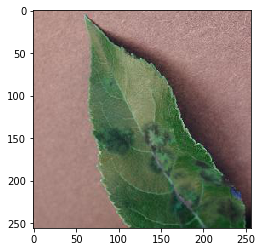

In [10]:
img = cv2.imread("E:\\PycharmProjects\\Chameleon\\data\\test_set\\t1.JPG")
img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.show()
img = img.transpose((-1, 0, 1))
X_test = [img, img]

In [176]:
y_test = trained_model.predict_classes(np.array(X_test))
print(y_test)

[37 37]


In [151]:
im = []
for i in range(3, 4):
    for filename in os.listdir(base + str(i)):
        img1 = cv2.imread(base + str(i) + "\\" + filename)
        img1 = cv2.resize(img1, (256, 256), interpolation=cv2.INTER_CUBIC)
        if img1 is not None:
            labels.append(i)
            im.append(img1)
im = np.reshape(im, (np.shape(im)[0], 3, 256, 256))
y_test = model.predict_classes(im)
count = len(im)
for i in range(len(y_test)):
    if y_test[i] == 3:
        count = count - 1
print(count)
print(len(y_test))


713
713


36


In [ ]:
import requests

p = np.random.permutation(38)
print(names[p[0]])
url = "https://nagarro.herokuapp.com/" + names[p[0]]
response = requests.post(url, headers={"Content-Type": "application/json"})
about = response.json()['value']['about']
print("About")
print(about)
cure = response.json()['value']['cure']
print("Treatment")
print(cure)


Corn Northern Leaf Blight


About
Northern corn leaf blight is a foliar disease of corn caused by Exserohilum turcicum, the anamorph of the ascomycete Setosphaeria turcica. With its characteristic cigar-shaped lesions, this disease can cause significant yield loss in susceptible corn hybrids.
Treatment
Growers can manage NLB by selecting resistant hybrids, reducing previous corn residue, timely planting, and in high-risk fields with recent NLB outbreaks, application of fungicides. To determine level of risk, growers are encouraged to routinely scout fields for presence of NLB and other leaf diseases. Scouting is also important to identify any stalk quality problems that often result from leaf diseases.
